In [1]:
import os, shutil

original_dataset_dir = '/home/steve/PycharmProjects/AI_Learning/Python深度学习/data/cat_vs_dog/train'

base_dir = '/home/steve/PycharmProjects/AI_Learning/Python深度学习/data/cat_vs_dog/base_dir'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [3]:
print('total training cat images:', len(os.listdir(train_dogs_dir)))

total training cat images: 1000


In [4]:
print('total training cat images:', len(os.listdir(validation_cats_dir)))

total training cat images: 500


In [5]:
print('total training cat images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 500


In [6]:
print('total training cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 500


In [7]:
print('total training cat images:', len(os.listdir(test_dogs_dir)))

total training cat images: 500


In [10]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)             0         
__________

In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break


data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/30


  1/100 [..............................] - ETA: 6:13 - loss: 0.6839 - acc: 0.7000

  2/100 [..............................] - ETA: 3:58 - loss: 0.9425 - acc: 0.7000

  3/100 [..............................] - ETA: 3:08 - loss: 0.9024 - acc: 0.5667

  4/100 [>.............................] - ETA: 2:43 - loss: 0.9202 - acc: 0.5500

  5/100 [>.............................] - ETA: 2:27 - loss: 0.8786 - acc: 0.5300

  6/100 [>.............................] - ETA: 2:16 - loss: 0.8474 - acc: 0.5333

  7/100 [=>............................] - ETA: 2:08 - loss: 0.8282 - acc: 0.5071

  8/100 [=>............................] - ETA: 2:02 - loss: 0.8135 - acc: 0.5125

  9/100 [=>............................] - ETA: 1:57 - loss: 0.8009 - acc: 0.5111

 10/100 [==>...........................] - ETA: 1:53 - loss: 0.7900 - acc: 0.5050

 11/100 [==>...........................] - ETA: 1:50 - loss: 0.7792 - acc: 0.5273

 12/100 [==>...........................] - ETA: 1:47 - loss: 0.7740 - acc: 0.5250

 13/100 [==>...........................] - ETA: 1:44 - loss: 0.7669 - acc: 0.5346

 14/100 [===>..........................] - ETA: 1:42 - loss: 0.7620 - acc: 0.5286

 15/100 [===>..........................] - ETA: 1:39 - loss: 0.7569 - acc: 0.5400

 16/100 [===>..........................] - ETA: 1:37 - loss: 0.7592 - acc: 0.5375

 17/100 [====>.........................] - ETA: 1:35 - loss: 0.7551 - acc: 0.5382

 18/100 [====>.........................] - ETA: 1:33 - loss: 0.7513 - acc: 0.5389

 19/100 [====>.........................] - ETA: 1:31 - loss: 0.7461 - acc: 0.5447

 20/100 [=====>........................] - ETA: 1:29 - loss: 0.7451 - acc: 0.5450

 21/100 [=====>........................] - ETA: 1:28 - loss: 0.7429 - acc: 0.5452

 22/100 [=====>........................] - ETA: 1:26 - loss: 0.7427 - acc: 0.5341

 23/100 [=====>........................] - ETA: 1:25 - loss: 0.7353 - acc: 0.5413

 24/100 [======>.......................] - ETA: 1:23 - loss: 0.7475 - acc: 0.5250

 25/100 [======>.......................] - ETA: 1:22 - loss: 0.7451 - acc: 0.5260

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.7437 - acc: 0.5212

 27/100 [=======>......................] - ETA: 1:19 - loss: 0.7434 - acc: 0.5130

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.7418 - acc: 0.5125

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.7397 - acc: 0.5155

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.7383 - acc: 0.5150

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.7366 - acc: 0.5194

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.7352 - acc: 0.5219

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.7337 - acc: 0.5227

 34/100 [=========>....................] - ETA: 1:09 - loss: 0.7320 - acc: 0.5235

 35/100 [=========>....................] - ETA: 1:08 - loss: 0.7305 - acc: 0.5271

 36/100 [=========>....................] - ETA: 1:07 - loss: 0.7290 - acc: 0.5292

 37/100 [==========>...................] - ETA: 1:06 - loss: 0.7287 - acc: 0.5270

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.7275 - acc: 0.5289

 39/100 [==========>...................] - ETA: 1:03 - loss: 0.7270 - acc: 0.5256

 40/100 [===========>..................] - ETA: 1:02 - loss: 0.7266 - acc: 0.5250

 41/100 [===========>..................] - ETA: 1:01 - loss: 0.7257 - acc: 0.5232

 42/100 [===========>..................] - ETA: 1:00 - loss: 0.7234 - acc: 0.5298

 43/100 [===========>..................] - ETA: 59s - loss: 0.7203 - acc: 0.5337 

 44/100 [============>.................] - ETA: 58s - loss: 0.7221 - acc: 0.5307

 45/100 [============>.................] - ETA: 57s - loss: 0.7219 - acc: 0.5300

 46/100 [============>.................] - ETA: 55s - loss: 0.7208 - acc: 0.5304

 47/100 [=============>................] - ETA: 54s - loss: 0.7203 - acc: 0.5287

 48/100 [=============>................] - ETA: 53s - loss: 0.7196 - acc: 0.5271

 49/100 [=============>................] - ETA: 52s - loss: 0.7188 - acc: 0.5296

 50/100 [==============>...............] - ETA: 51s - loss: 0.7186 - acc: 0.5290

 51/100 [==============>...............] - ETA: 50s - loss: 0.7180 - acc: 0.5294

 52/100 [==============>...............] - ETA: 49s - loss: 0.7171 - acc: 0.5298

 53/100 [==============>...............] - ETA: 48s - loss: 0.7166 - acc: 0.5283

 54/100 [===============>..............] - ETA: 47s - loss: 0.7162 - acc: 0.5287

 55/100 [===============>..............] - ETA: 46s - loss: 0.7148 - acc: 0.5300

 56/100 [===============>..............] - ETA: 45s - loss: 0.7153 - acc: 0.5268

 57/100 [================>.............] - ETA: 44s - loss: 0.7142 - acc: 0.5281

 58/100 [================>.............] - ETA: 42s - loss: 0.7135 - acc: 0.5284

 59/100 [================>.............] - ETA: 41s - loss: 0.7131 - acc: 0.5280

 60/100 [=================>............] - ETA: 40s - loss: 0.7124 - acc: 0.5317

 61/100 [=================>............] - ETA: 39s - loss: 0.7116 - acc: 0.5320

 62/100 [=================>............] - ETA: 38s - loss: 0.7111 - acc: 0.5323

 63/100 [=================>............] - ETA: 37s - loss: 0.7102 - acc: 0.5333

 64/100 [==================>...........] - ETA: 36s - loss: 0.7092 - acc: 0.5344

 65/100 [==================>...........] - ETA: 35s - loss: 0.7083 - acc: 0.5346

 66/100 [==================>...........] - ETA: 34s - loss: 0.7077 - acc: 0.5341

 67/100 [===================>..........] - ETA: 34s - loss: 0.7073 - acc: 0.5336

 68/100 [===================>..........] - ETA: 33s - loss: 0.7072 - acc: 0.5324

 69/100 [===================>..........] - ETA: 32s - loss: 0.7071 - acc: 0.5319

 70/100 [====================>.........] - ETA: 31s - loss: 0.7060 - acc: 0.5350

 71/100 [====================>.........] - ETA: 30s - loss: 0.7065 - acc: 0.5345

 72/100 [====================>.........] - ETA: 29s - loss: 0.7071 - acc: 0.5319

 73/100 [====================>.........] - ETA: 28s - loss: 0.7064 - acc: 0.5342

 74/100 [=====================>........] - ETA: 27s - loss: 0.7058 - acc: 0.5351

 75/100 [=====================>........] - ETA: 26s - loss: 0.7049 - acc: 0.5373

 76/100 [=====================>........] - ETA: 25s - loss: 0.7043 - acc: 0.5375

 77/100 [======================>.......] - ETA: 24s - loss: 0.7038 - acc: 0.5377

 78/100 [======================>.......] - ETA: 23s - loss: 0.7036 - acc: 0.5378

 79/100 [======================>.......] - ETA: 22s - loss: 0.7038 - acc: 0.5367

 80/100 [=======================>......] - ETA: 21s - loss: 0.7034 - acc: 0.5394

 81/100 [=======================>......] - ETA: 20s - loss: 0.7030 - acc: 0.5401

 82/100 [=======================>......] - ETA: 19s - loss: 0.7023 - acc: 0.5402

 83/100 [=======================>......] - ETA: 18s - loss: 0.7016 - acc: 0.5422

 84/100 [========================>.....] - ETA: 16s - loss: 0.7011 - acc: 0.5446

 85/100 [========================>.....] - ETA: 15s - loss: 0.7007 - acc: 0.5453

 86/100 [========================>.....] - ETA: 14s - loss: 0.7004 - acc: 0.5459

 87/100 [=========================>....] - ETA: 13s - loss: 0.7004 - acc: 0.5460

 88/100 [=========================>....] - ETA: 12s - loss: 0.7007 - acc: 0.5460

 89/100 [=========================>....] - ETA: 11s - loss: 0.7003 - acc: 0.5461

 90/100 [==========================>...] - ETA: 10s - loss: 0.6998 - acc: 0.5467

 91/100 [==========================>...] - ETA: 9s - loss: 0.6997 - acc: 0.5462 

 92/100 [==========================>...] - ETA: 8s - loss: 0.6993 - acc: 0.5467

 93/100 [==========================>...] - ETA: 7s - loss: 0.6989 - acc: 0.5473

 94/100 [===========================>..] - ETA: 6s - loss: 0.6993 - acc: 0.5457

 95/100 [===========================>..] - ETA: 5s - loss: 0.6988 - acc: 0.5463

 96/100 [===========================>..] - ETA: 4s - loss: 0.6984 - acc: 0.5484

 97/100 [============================>.] - ETA: 3s - loss: 0.6982 - acc: 0.5500

 98/100 [============================>.] - ETA: 2s - loss: 0.6977 - acc: 0.5515

 99/100 [============================>.] - ETA: 1s - loss: 0.6973 - acc: 0.5525

100/100 [==============================] - 118s 1s/step - loss: 0.6966 - acc: 0.5525 - val_loss: 0.6607 - val_acc: 0.5930


Epoch 2/30


  1/100 [..............................] - ETA: 1:29 - loss: 0.6502 - acc: 0.6500

  2/100 [..............................] - ETA: 1:27 - loss: 0.6350 - acc: 0.7000

  3/100 [..............................] - ETA: 1:26 - loss: 0.6508 - acc: 0.6333

  4/100 [>.............................] - ETA: 1:25 - loss: 0.6530 - acc: 0.6375

  5/100 [>.............................] - ETA: 1:24 - loss: 0.6462 - acc: 0.6700

  6/100 [>.............................] - ETA: 1:23 - loss: 0.6397 - acc: 0.6750

  7/100 [=>............................] - ETA: 1:22 - loss: 0.6412 - acc: 0.6571

  8/100 [=>............................] - ETA: 1:21 - loss: 0.6656 - acc: 0.6250

  9/100 [=>............................] - ETA: 1:20 - loss: 0.6616 - acc: 0.6278

 10/100 [==>...........................] - ETA: 1:20 - loss: 0.6593 - acc: 0.6400

 11/100 [==>...........................] - ETA: 1:19 - loss: 0.6560 - acc: 0.6500

 12/100 [==>...........................] - ETA: 1:18 - loss: 0.6574 - acc: 0.6417

 13/100 [==>...........................] - ETA: 1:17 - loss: 0.6583 - acc: 0.6308

 14/100 [===>..........................] - ETA: 1:16 - loss: 0.6552 - acc: 0.6393

 15/100 [===>..........................] - ETA: 1:15 - loss: 0.6530 - acc: 0.6367

 16/100 [===>..........................] - ETA: 1:14 - loss: 0.6536 - acc: 0.6406

 17/100 [====>.........................] - ETA: 1:13 - loss: 0.6559 - acc: 0.6412

 18/100 [====>.........................] - ETA: 1:13 - loss: 0.6547 - acc: 0.6417

 19/100 [====>.........................] - ETA: 1:12 - loss: 0.6518 - acc: 0.6447

 20/100 [=====>........................] - ETA: 1:11 - loss: 0.6498 - acc: 0.6500

 21/100 [=====>........................] - ETA: 1:10 - loss: 0.6474 - acc: 0.6476

 22/100 [=====>........................] - ETA: 1:09 - loss: 0.6448 - acc: 0.6523

 23/100 [=====>........................] - ETA: 1:08 - loss: 0.6440 - acc: 0.6500

 24/100 [======>.......................] - ETA: 1:07 - loss: 0.6470 - acc: 0.6437

 25/100 [======>.......................] - ETA: 1:07 - loss: 0.6463 - acc: 0.6460

 26/100 [======>.......................] - ETA: 1:06 - loss: 0.6502 - acc: 0.6385

 27/100 [=======>......................] - ETA: 1:05 - loss: 0.6576 - acc: 0.6259

 28/100 [=======>......................] - ETA: 1:04 - loss: 0.6565 - acc: 0.6286

 29/100 [=======>......................] - ETA: 1:03 - loss: 0.6546 - acc: 0.6345

 30/100 [========>.....................] - ETA: 1:02 - loss: 0.6527 - acc: 0.6383

 31/100 [========>.....................] - ETA: 1:01 - loss: 0.6488 - acc: 0.6403

 32/100 [========>.....................] - ETA: 1:01 - loss: 0.6479 - acc: 0.6391

 33/100 [========>.....................] - ETA: 1:00 - loss: 0.6463 - acc: 0.6409

 34/100 [=========>....................] - ETA: 59s - loss: 0.6441 - acc: 0.6471 

 35/100 [=========>....................] - ETA: 58s - loss: 0.6431 - acc: 0.6486

 36/100 [=========>....................] - ETA: 57s - loss: 0.6449 - acc: 0.6444

 37/100 [==========>...................] - ETA: 56s - loss: 0.6434 - acc: 0.6446

 38/100 [==========>...................] - ETA: 55s - loss: 0.6421 - acc: 0.6474

 39/100 [==========>...................] - ETA: 54s - loss: 0.6395 - acc: 0.6487

 40/100 [===========>..................] - ETA: 53s - loss: 0.6470 - acc: 0.6425

 41/100 [===========>..................] - ETA: 52s - loss: 0.6465 - acc: 0.6427

 42/100 [===========>..................] - ETA: 52s - loss: 0.6471 - acc: 0.6393

 43/100 [===========>..................] - ETA: 51s - loss: 0.6469 - acc: 0.6360

 44/100 [============>.................] - ETA: 50s - loss: 0.6457 - acc: 0.6398

 45/100 [============>.................] - ETA: 49s - loss: 0.6438 - acc: 0.6456

 46/100 [============>.................] - ETA: 48s - loss: 0.6417 - acc: 0.6522

 47/100 [=============>................] - ETA: 47s - loss: 0.6410 - acc: 0.6521

 48/100 [=============>................] - ETA: 46s - loss: 0.6429 - acc: 0.6490

 49/100 [=============>................] - ETA: 45s - loss: 0.6413 - acc: 0.6490

 50/100 [==============>...............] - ETA: 44s - loss: 0.6431 - acc: 0.6460

 51/100 [==============>...............] - ETA: 43s - loss: 0.6419 - acc: 0.6480

 52/100 [==============>...............] - ETA: 43s - loss: 0.6419 - acc: 0.6452

 53/100 [==============>...............] - ETA: 42s - loss: 0.6424 - acc: 0.6453

 54/100 [===============>..............] - ETA: 41s - loss: 0.6409 - acc: 0.6472

 55/100 [===============>..............] - ETA: 40s - loss: 0.6420 - acc: 0.6473

 56/100 [===============>..............] - ETA: 39s - loss: 0.6422 - acc: 0.6473

 57/100 [================>.............] - ETA: 38s - loss: 0.6415 - acc: 0.6482

 58/100 [================>.............] - ETA: 37s - loss: 0.6418 - acc: 0.6466

 59/100 [================>.............] - ETA: 36s - loss: 0.6421 - acc: 0.6458

 60/100 [=================>............] - ETA: 35s - loss: 0.6421 - acc: 0.6450

 61/100 [=================>............] - ETA: 34s - loss: 0.6424 - acc: 0.6434

 62/100 [=================>............] - ETA: 34s - loss: 0.6420 - acc: 0.6435

 63/100 [=================>............] - ETA: 33s - loss: 0.6422 - acc: 0.6421

 64/100 [==================>...........] - ETA: 32s - loss: 0.6423 - acc: 0.6414

 65/100 [==================>...........] - ETA: 31s - loss: 0.6421 - acc: 0.6415

 66/100 [==================>...........] - ETA: 30s - loss: 0.6407 - acc: 0.6424

 67/100 [===================>..........] - ETA: 29s - loss: 0.6400 - acc: 0.6433

 68/100 [===================>..........] - ETA: 28s - loss: 0.6416 - acc: 0.6412

 69/100 [===================>..........] - ETA: 27s - loss: 0.6428 - acc: 0.6377

 70/100 [====================>.........] - ETA: 26s - loss: 0.6430 - acc: 0.6371

 71/100 [====================>.........] - ETA: 25s - loss: 0.6425 - acc: 0.6373

 72/100 [====================>.........] - ETA: 25s - loss: 0.6425 - acc: 0.6389

 73/100 [====================>.........] - ETA: 24s - loss: 0.6412 - acc: 0.6404

 74/100 [=====================>........] - ETA: 23s - loss: 0.6400 - acc: 0.6432

 75/100 [=====================>........] - ETA: 22s - loss: 0.6371 - acc: 0.6467

 76/100 [=====================>........] - ETA: 21s - loss: 0.6375 - acc: 0.6441

 77/100 [======================>.......] - ETA: 20s - loss: 0.6392 - acc: 0.6416

 78/100 [======================>.......] - ETA: 19s - loss: 0.6386 - acc: 0.6404

 79/100 [======================>.......] - ETA: 18s - loss: 0.6379 - acc: 0.6405

 80/100 [=======================>......] - ETA: 17s - loss: 0.6397 - acc: 0.6375

 81/100 [=======================>......] - ETA: 16s - loss: 0.6400 - acc: 0.6377

 82/100 [=======================>......] - ETA: 16s - loss: 0.6404 - acc: 0.6360

 83/100 [=======================>......] - ETA: 15s - loss: 0.6400 - acc: 0.6373

 84/100 [========================>.....] - ETA: 14s - loss: 0.6398 - acc: 0.6375

 85/100 [========================>.....] - ETA: 13s - loss: 0.6396 - acc: 0.6376

 86/100 [========================>.....] - ETA: 12s - loss: 0.6384 - acc: 0.6390

 87/100 [=========================>....] - ETA: 11s - loss: 0.6382 - acc: 0.6402

 88/100 [=========================>....] - ETA: 10s - loss: 0.6372 - acc: 0.6415

 89/100 [=========================>....] - ETA: 9s - loss: 0.6379 - acc: 0.6410 

 90/100 [==========================>...] - ETA: 8s - loss: 0.6371 - acc: 0.6417

 91/100 [==========================>...] - ETA: 8s - loss: 0.6369 - acc: 0.6418

 92/100 [==========================>...] - ETA: 7s - loss: 0.6360 - acc: 0.6413

 93/100 [==========================>...] - ETA: 6s - loss: 0.6359 - acc: 0.6425

 94/100 [===========================>..] - ETA: 5s - loss: 0.6351 - acc: 0.6426

 95/100 [===========================>..] - ETA: 4s - loss: 0.6354 - acc: 0.6426

 96/100 [===========================>..] - ETA: 3s - loss: 0.6346 - acc: 0.6432

 97/100 [============================>.] - ETA: 2s - loss: 0.6345 - acc: 0.6433

 98/100 [============================>.] - ETA: 1s - loss: 0.6326 - acc: 0.6464

 99/100 [============================>.] - ETA: 0s - loss: 0.6332 - acc: 0.6460

100/100 [==============================] - 103s 1s/step - loss: 0.6324 - acc: 0.6465 - val_loss: 0.6071 - val_acc: 0.6680


Epoch 3/30


  1/100 [..............................] - ETA: 1:37 - loss: 0.5287 - acc: 0.8000

  2/100 [..............................] - ETA: 1:34 - loss: 0.6049 - acc: 0.6750

  3/100 [..............................] - ETA: 1:33 - loss: 0.6573 - acc: 0.5833

  4/100 [>.............................] - ETA: 1:32 - loss: 0.6363 - acc: 0.6250

  5/100 [>.............................] - ETA: 1:31 - loss: 0.6216 - acc: 0.6700

  6/100 [>.............................] - ETA: 1:30 - loss: 0.6111 - acc: 0.6917

  7/100 [=>............................] - ETA: 1:29 - loss: 0.5792 - acc: 0.7071

  8/100 [=>............................] - ETA: 1:29 - loss: 0.5990 - acc: 0.6625

  9/100 [=>............................] - ETA: 1:28 - loss: 0.5978 - acc: 0.6611

 10/100 [==>...........................] - ETA: 1:27 - loss: 0.5999 - acc: 0.6600

 11/100 [==>...........................] - ETA: 1:26 - loss: 0.6104 - acc: 0.6545

 12/100 [==>...........................] - ETA: 1:25 - loss: 0.6049 - acc: 0.6708

 13/100 [==>...........................] - ETA: 1:24 - loss: 0.5952 - acc: 0.6923

 14/100 [===>..........................] - ETA: 1:23 - loss: 0.6029 - acc: 0.6821

 15/100 [===>..........................] - ETA: 1:22 - loss: 0.5987 - acc: 0.6867

 16/100 [===>..........................] - ETA: 1:21 - loss: 0.5973 - acc: 0.6844

 17/100 [====>.........................] - ETA: 1:20 - loss: 0.5957 - acc: 0.6853

 18/100 [====>.........................] - ETA: 1:19 - loss: 0.5934 - acc: 0.6944

 19/100 [====>.........................] - ETA: 1:18 - loss: 0.5921 - acc: 0.6947

 20/100 [=====>........................] - ETA: 1:17 - loss: 0.5860 - acc: 0.6975

 21/100 [=====>........................] - ETA: 1:16 - loss: 0.5853 - acc: 0.7024

 22/100 [=====>........................] - ETA: 1:15 - loss: 0.5940 - acc: 0.6932

 23/100 [=====>........................] - ETA: 1:14 - loss: 0.5978 - acc: 0.6891

 24/100 [======>.......................] - ETA: 1:13 - loss: 0.5959 - acc: 0.6896

 25/100 [======>.......................] - ETA: 1:12 - loss: 0.5928 - acc: 0.6980

 26/100 [======>.......................] - ETA: 1:12 - loss: 0.5914 - acc: 0.7019

 27/100 [=======>......................] - ETA: 1:11 - loss: 0.5894 - acc: 0.7000

 28/100 [=======>......................] - ETA: 1:10 - loss: 0.5908 - acc: 0.7000

 29/100 [=======>......................] - ETA: 1:09 - loss: 0.5913 - acc: 0.6966

 30/100 [========>.....................] - ETA: 1:08 - loss: 0.5981 - acc: 0.6900

 31/100 [========>.....................] - ETA: 1:07 - loss: 0.5948 - acc: 0.6935

 32/100 [========>.....................] - ETA: 1:06 - loss: 0.5921 - acc: 0.6953

 33/100 [========>.....................] - ETA: 1:05 - loss: 0.5892 - acc: 0.6955

 34/100 [=========>....................] - ETA: 1:04 - loss: 0.5912 - acc: 0.6941

 35/100 [=========>....................] - ETA: 1:03 - loss: 0.5900 - acc: 0.6971

 36/100 [=========>....................] - ETA: 1:02 - loss: 0.5898 - acc: 0.6944

 37/100 [==========>...................] - ETA: 1:02 - loss: 0.5897 - acc: 0.6959

 38/100 [==========>...................] - ETA: 1:01 - loss: 0.5889 - acc: 0.6974

 39/100 [==========>...................] - ETA: 1:00 - loss: 0.5861 - acc: 0.6987

 40/100 [===========>..................] - ETA: 59s - loss: 0.5836 - acc: 0.6988 

 41/100 [===========>..................] - ETA: 58s - loss: 0.5818 - acc: 0.6988

 42/100 [===========>..................] - ETA: 57s - loss: 0.5796 - acc: 0.7036

 43/100 [===========>..................] - ETA: 56s - loss: 0.5772 - acc: 0.7058

 44/100 [============>.................] - ETA: 55s - loss: 0.5781 - acc: 0.7034

 45/100 [============>.................] - ETA: 54s - loss: 0.5751 - acc: 0.7067

 46/100 [============>.................] - ETA: 53s - loss: 0.5740 - acc: 0.7087

 47/100 [=============>................] - ETA: 52s - loss: 0.5741 - acc: 0.7074

 48/100 [=============>................] - ETA: 52s - loss: 0.5716 - acc: 0.7104

 49/100 [=============>................] - ETA: 52s - loss: 0.5702 - acc: 0.7092

 50/100 [==============>...............] - ETA: 51s - loss: 0.5690 - acc: 0.7080

 51/100 [==============>...............] - ETA: 50s - loss: 0.5692 - acc: 0.7059

 52/100 [==============>...............] - ETA: 49s - loss: 0.5691 - acc: 0.7067

 53/100 [==============>...............] - ETA: 49s - loss: 0.5669 - acc: 0.7085

 54/100 [===============>..............] - ETA: 48s - loss: 0.5707 - acc: 0.7019

 55/100 [===============>..............] - ETA: 47s - loss: 0.5745 - acc: 0.6991

 56/100 [===============>..............] - ETA: 46s - loss: 0.5736 - acc: 0.6991

 57/100 [================>.............] - ETA: 45s - loss: 0.5733 - acc: 0.7000

 58/100 [================>.............] - ETA: 44s - loss: 0.5722 - acc: 0.7009

 59/100 [================>.............] - ETA: 43s - loss: 0.5706 - acc: 0.7025

 60/100 [=================>............] - ETA: 42s - loss: 0.5711 - acc: 0.7025

 61/100 [=================>............] - ETA: 41s - loss: 0.5744 - acc: 0.6984

 62/100 [=================>............] - ETA: 40s - loss: 0.5748 - acc: 0.6976

 63/100 [=================>............] - ETA: 39s - loss: 0.5723 - acc: 0.7008

 64/100 [==================>...........] - ETA: 37s - loss: 0.5711 - acc: 0.7000

 65/100 [==================>...........] - ETA: 36s - loss: 0.5718 - acc: 0.7000

 66/100 [==================>...........] - ETA: 35s - loss: 0.5702 - acc: 0.7030

 67/100 [===================>..........] - ETA: 34s - loss: 0.5686 - acc: 0.7052

 68/100 [===================>..........] - ETA: 33s - loss: 0.5691 - acc: 0.7051

 69/100 [===================>..........] - ETA: 32s - loss: 0.5687 - acc: 0.7043

 70/100 [====================>.........] - ETA: 31s - loss: 0.5657 - acc: 0.7079

 71/100 [====================>.........] - ETA: 30s - loss: 0.5712 - acc: 0.7014

 72/100 [====================>.........] - ETA: 29s - loss: 0.5705 - acc: 0.7035

 73/100 [====================>.........] - ETA: 28s - loss: 0.5735 - acc: 0.7014

 74/100 [=====================>........] - ETA: 27s - loss: 0.5739 - acc: 0.7014

 75/100 [=====================>........] - ETA: 26s - loss: 0.5744 - acc: 0.7000

 76/100 [=====================>........] - ETA: 25s - loss: 0.5736 - acc: 0.7020

 77/100 [======================>.......] - ETA: 25s - loss: 0.5728 - acc: 0.7032

 78/100 [======================>.......] - ETA: 24s - loss: 0.5740 - acc: 0.7026

 79/100 [======================>.......] - ETA: 22s - loss: 0.5749 - acc: 0.7019

 80/100 [=======================>......] - ETA: 21s - loss: 0.5740 - acc: 0.7044

 81/100 [=======================>......] - ETA: 20s - loss: 0.5712 - acc: 0.7080

 82/100 [=======================>......] - ETA: 19s - loss: 0.5699 - acc: 0.7098

 83/100 [=======================>......] - ETA: 18s - loss: 0.5707 - acc: 0.7072

 84/100 [========================>.....] - ETA: 17s - loss: 0.5702 - acc: 0.7077

 85/100 [========================>.....] - ETA: 16s - loss: 0.5688 - acc: 0.7088

 86/100 [========================>.....] - ETA: 15s - loss: 0.5671 - acc: 0.7110

 87/100 [=========================>....] - ETA: 14s - loss: 0.5695 - acc: 0.7092

 88/100 [=========================>....] - ETA: 12s - loss: 0.5699 - acc: 0.7091

 89/100 [=========================>....] - ETA: 11s - loss: 0.5695 - acc: 0.7084

 90/100 [==========================>...] - ETA: 10s - loss: 0.5692 - acc: 0.7089

 91/100 [==========================>...] - ETA: 9s - loss: 0.5690 - acc: 0.7082 

 92/100 [==========================>...] - ETA: 8s - loss: 0.5683 - acc: 0.7092

 93/100 [==========================>...] - ETA: 7s - loss: 0.5676 - acc: 0.7097

 94/100 [===========================>..] - ETA: 6s - loss: 0.5667 - acc: 0.7117

 95/100 [===========================>..] - ETA: 5s - loss: 0.5665 - acc: 0.7116

 96/100 [===========================>..] - ETA: 4s - loss: 0.5687 - acc: 0.7094

 97/100 [============================>.] - ETA: 3s - loss: 0.5690 - acc: 0.7093

 98/100 [============================>.] - ETA: 2s - loss: 0.5687 - acc: 0.7087

 99/100 [============================>.] - ETA: 1s - loss: 0.5684 - acc: 0.7081

100/100 [==============================] - 127s 1s/step - loss: 0.5681 - acc: 0.7075 - val_loss: 0.5855 - val_acc: 0.6820


Epoch 4/30


  1/100 [..............................] - ETA: 2:03 - loss: 0.4017 - acc: 0.8500

  2/100 [..............................] - ETA: 1:50 - loss: 0.3724 - acc: 0.8750

  3/100 [..............................] - ETA: 1:48 - loss: 0.4796 - acc: 0.7667

  4/100 [>.............................] - ETA: 1:48 - loss: 0.4876 - acc: 0.7750

  5/100 [>.............................] - ETA: 1:44 - loss: 0.5036 - acc: 0.7500

  6/100 [>.............................] - ETA: 1:41 - loss: 0.4982 - acc: 0.7583

  7/100 [=>............................] - ETA: 1:39 - loss: 0.4906 - acc: 0.7643

  8/100 [=>............................] - ETA: 1:37 - loss: 0.4915 - acc: 0.7688

  9/100 [=>............................] - ETA: 1:35 - loss: 0.4938 - acc: 0.7667

 10/100 [==>...........................] - ETA: 1:34 - loss: 0.4973 - acc: 0.7650

 11/100 [==>...........................] - ETA: 1:32 - loss: 0.5055 - acc: 0.7500

 12/100 [==>...........................] - ETA: 1:31 - loss: 0.5178 - acc: 0.7458

 13/100 [==>...........................] - ETA: 1:29 - loss: 0.5216 - acc: 0.7423

 14/100 [===>..........................] - ETA: 1:28 - loss: 0.5205 - acc: 0.7429

 15/100 [===>..........................] - ETA: 1:26 - loss: 0.5146 - acc: 0.7500

 16/100 [===>..........................] - ETA: 1:25 - loss: 0.5079 - acc: 0.7531

 17/100 [====>.........................] - ETA: 1:24 - loss: 0.5019 - acc: 0.7559

 18/100 [====>.........................] - ETA: 1:22 - loss: 0.5007 - acc: 0.7556

 19/100 [====>.........................] - ETA: 1:21 - loss: 0.5022 - acc: 0.7579

 20/100 [=====>........................] - ETA: 1:20 - loss: 0.5049 - acc: 0.7575

 21/100 [=====>........................] - ETA: 1:19 - loss: 0.5045 - acc: 0.7571

 22/100 [=====>........................] - ETA: 1:18 - loss: 0.4967 - acc: 0.7591

 23/100 [=====>........................] - ETA: 1:17 - loss: 0.4923 - acc: 0.7630

 24/100 [======>.......................] - ETA: 1:16 - loss: 0.4919 - acc: 0.7625

 25/100 [======>.......................] - ETA: 1:15 - loss: 0.4887 - acc: 0.7660

 26/100 [======>.......................] - ETA: 1:14 - loss: 0.4898 - acc: 0.7654

 27/100 [=======>......................] - ETA: 1:13 - loss: 0.4907 - acc: 0.7648

 28/100 [=======>......................] - ETA: 1:12 - loss: 0.4963 - acc: 0.7607

 29/100 [=======>......................] - ETA: 1:11 - loss: 0.5003 - acc: 0.7534

 30/100 [========>.....................] - ETA: 1:10 - loss: 0.4992 - acc: 0.7567

 31/100 [========>.....................] - ETA: 1:09 - loss: 0.5077 - acc: 0.7532

 32/100 [========>.....................] - ETA: 1:08 - loss: 0.5071 - acc: 0.7516

 33/100 [========>.....................] - ETA: 1:07 - loss: 0.5075 - acc: 0.7515

 34/100 [=========>....................] - ETA: 1:06 - loss: 0.5081 - acc: 0.7485

 35/100 [=========>....................] - ETA: 1:05 - loss: 0.5062 - acc: 0.7486

 36/100 [=========>....................] - ETA: 1:04 - loss: 0.5040 - acc: 0.7514

 37/100 [==========>...................] - ETA: 1:03 - loss: 0.5063 - acc: 0.7514

 38/100 [==========>...................] - ETA: 1:02 - loss: 0.5085 - acc: 0.7474

 39/100 [==========>...................] - ETA: 1:02 - loss: 0.5096 - acc: 0.7462

 40/100 [===========>..................] - ETA: 1:02 - loss: 0.5075 - acc: 0.7463

 41/100 [===========>..................] - ETA: 1:01 - loss: 0.5077 - acc: 0.7427

 42/100 [===========>..................] - ETA: 1:00 - loss: 0.5122 - acc: 0.7381

 43/100 [===========>..................] - ETA: 59s - loss: 0.5140 - acc: 0.7360 

 44/100 [============>.................] - ETA: 58s - loss: 0.5115 - acc: 0.7398

 45/100 [============>.................] - ETA: 57s - loss: 0.5116 - acc: 0.7400

 46/100 [============>.................] - ETA: 56s - loss: 0.5102 - acc: 0.7413

 47/100 [=============>................] - ETA: 55s - loss: 0.5136 - acc: 0.7404

 48/100 [=============>................] - ETA: 54s - loss: 0.5162 - acc: 0.7385

 49/100 [=============>................] - ETA: 53s - loss: 0.5166 - acc: 0.7408

 50/100 [==============>...............] - ETA: 52s - loss: 0.5150 - acc: 0.7430

 51/100 [==============>...............] - ETA: 51s - loss: 0.5170 - acc: 0.7431

 52/100 [==============>...............] - ETA: 50s - loss: 0.5191 - acc: 0.7404

 53/100 [==============>...............] - ETA: 49s - loss: 0.5195 - acc: 0.7406

 54/100 [===============>..............] - ETA: 48s - loss: 0.5182 - acc: 0.7417

 55/100 [===============>..............] - ETA: 47s - loss: 0.5175 - acc: 0.7427

 56/100 [===============>..............] - ETA: 46s - loss: 0.5175 - acc: 0.7438

 57/100 [================>.............] - ETA: 45s - loss: 0.5163 - acc: 0.7474

 58/100 [================>.............] - ETA: 44s - loss: 0.5160 - acc: 0.7457

 59/100 [================>.............] - ETA: 42s - loss: 0.5143 - acc: 0.7466

 60/100 [=================>............] - ETA: 41s - loss: 0.5176 - acc: 0.7425

 61/100 [=================>............] - ETA: 40s - loss: 0.5173 - acc: 0.7434

 62/100 [=================>............] - ETA: 39s - loss: 0.5178 - acc: 0.7427

 63/100 [=================>............] - ETA: 38s - loss: 0.5160 - acc: 0.7429

 64/100 [==================>...........] - ETA: 37s - loss: 0.5162 - acc: 0.7422

 65/100 [==================>...........] - ETA: 36s - loss: 0.5164 - acc: 0.7423

 66/100 [==================>...........] - ETA: 35s - loss: 0.5167 - acc: 0.7402

 67/100 [===================>..........] - ETA: 34s - loss: 0.5177 - acc: 0.7403

 68/100 [===================>..........] - ETA: 33s - loss: 0.5161 - acc: 0.7426

 69/100 [===================>..........] - ETA: 32s - loss: 0.5153 - acc: 0.7428

 70/100 [====================>.........] - ETA: 31s - loss: 0.5130 - acc: 0.7457

 71/100 [====================>.........] - ETA: 30s - loss: 0.5120 - acc: 0.7465

 72/100 [====================>.........] - ETA: 29s - loss: 0.5086 - acc: 0.7486

 73/100 [====================>.........] - ETA: 28s - loss: 0.5089 - acc: 0.7493

 74/100 [=====================>........] - ETA: 26s - loss: 0.5074 - acc: 0.7514

 75/100 [=====================>........] - ETA: 25s - loss: 0.5110 - acc: 0.7493

 76/100 [=====================>........] - ETA: 24s - loss: 0.5089 - acc: 0.7513

 77/100 [======================>.......] - ETA: 23s - loss: 0.5093 - acc: 0.7519

 78/100 [======================>.......] - ETA: 22s - loss: 0.5118 - acc: 0.7513

 79/100 [======================>.......] - ETA: 21s - loss: 0.5136 - acc: 0.7500

 80/100 [=======================>......] - ETA: 20s - loss: 0.5153 - acc: 0.7475

 81/100 [=======================>......] - ETA: 20s - loss: 0.5153 - acc: 0.7463

 82/100 [=======================>......] - ETA: 19s - loss: 0.5155 - acc: 0.7463

 83/100 [=======================>......] - ETA: 17s - loss: 0.5151 - acc: 0.7470

 84/100 [========================>.....] - ETA: 16s - loss: 0.5159 - acc: 0.7452

 85/100 [========================>.....] - ETA: 15s - loss: 0.5167 - acc: 0.7435

 86/100 [========================>.....] - ETA: 14s - loss: 0.5182 - acc: 0.7419

 87/100 [=========================>....] - ETA: 13s - loss: 0.5174 - acc: 0.7425

 88/100 [=========================>....] - ETA: 12s - loss: 0.5159 - acc: 0.7443

 89/100 [=========================>....] - ETA: 11s - loss: 0.5152 - acc: 0.7455

 90/100 [==========================>...] - ETA: 10s - loss: 0.5141 - acc: 0.7461

 91/100 [==========================>...] - ETA: 9s - loss: 0.5148 - acc: 0.7462 

 92/100 [==========================>...] - ETA: 8s - loss: 0.5137 - acc: 0.7473

 93/100 [==========================>...] - ETA: 7s - loss: 0.5133 - acc: 0.7473

 94/100 [===========================>..] - ETA: 6s - loss: 0.5136 - acc: 0.7463

 95/100 [===========================>..] - ETA: 5s - loss: 0.5126 - acc: 0.7463

 96/100 [===========================>..] - ETA: 4s - loss: 0.5129 - acc: 0.7458

 97/100 [============================>.] - ETA: 3s - loss: 0.5119 - acc: 0.7469

 98/100 [============================>.] - ETA: 2s - loss: 0.5113 - acc: 0.7480

 99/100 [============================>.] - ETA: 1s - loss: 0.5130 - acc: 0.7465

100/100 [==============================] - 123s 1s/step - loss: 0.5128 - acc: 0.7475 - val_loss: 0.5972 - val_acc: 0.6910


Epoch 5/30


  1/100 [..............................] - ETA: 1:40 - loss: 0.4839 - acc: 0.6500

  2/100 [..............................] - ETA: 1:42 - loss: 0.3776 - acc: 0.7750

  3/100 [..............................] - ETA: 1:43 - loss: 0.4712 - acc: 0.7333

  4/100 [>.............................] - ETA: 1:47 - loss: 0.4884 - acc: 0.7500

  5/100 [>.............................] - ETA: 1:46 - loss: 0.5054 - acc: 0.7500

  6/100 [>.............................] - ETA: 1:46 - loss: 0.5004 - acc: 0.7500

  7/100 [=>............................] - ETA: 1:46 - loss: 0.5040 - acc: 0.7571

  8/100 [=>............................] - ETA: 1:46 - loss: 0.5319 - acc: 0.7375

  9/100 [=>............................] - ETA: 1:45 - loss: 0.5265 - acc: 0.7333

 10/100 [==>...........................] - ETA: 1:43 - loss: 0.5192 - acc: 0.7300

 11/100 [==>...........................] - ETA: 1:42 - loss: 0.5101 - acc: 0.7409

 12/100 [==>...........................] - ETA: 1:42 - loss: 0.5021 - acc: 0.7500

 13/100 [==>...........................] - ETA: 1:40 - loss: 0.5040 - acc: 0.7385

 14/100 [===>..........................] - ETA: 1:39 - loss: 0.5022 - acc: 0.7393

 15/100 [===>..........................] - ETA: 1:37 - loss: 0.4959 - acc: 0.7467

 16/100 [===>..........................] - ETA: 1:35 - loss: 0.4985 - acc: 0.7469

 17/100 [====>.........................] - ETA: 1:34 - loss: 0.5033 - acc: 0.7412

 18/100 [====>.........................] - ETA: 1:32 - loss: 0.5035 - acc: 0.7472

 19/100 [====>.........................] - ETA: 1:30 - loss: 0.5040 - acc: 0.7421

 20/100 [=====>........................] - ETA: 1:28 - loss: 0.5059 - acc: 0.7400

 21/100 [=====>........................] - ETA: 1:27 - loss: 0.5069 - acc: 0.7357

 22/100 [=====>........................] - ETA: 1:25 - loss: 0.5056 - acc: 0.7364

 23/100 [=====>........................] - ETA: 1:24 - loss: 0.5081 - acc: 0.7348

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.5089 - acc: 0.7333

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.5070 - acc: 0.7340

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.5038 - acc: 0.7385

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.5010 - acc: 0.7426

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.5058 - acc: 0.7375

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.5008 - acc: 0.7379

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.4994 - acc: 0.7417

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.5026 - acc: 0.7355

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.4998 - acc: 0.7375

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.4978 - acc: 0.7424

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.4919 - acc: 0.7485

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.4899 - acc: 0.7500

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.4870 - acc: 0.7528

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.4882 - acc: 0.7527

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.4907 - acc: 0.7487

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.4867 - acc: 0.7538

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.4854 - acc: 0.7563

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.4922 - acc: 0.7500

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.4930 - acc: 0.7488

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.4940 - acc: 0.7512

 44/100 [============>.................] - ETA: 1:01 - loss: 0.4915 - acc: 0.7534

 45/100 [============>.................] - ETA: 59s - loss: 0.4907 - acc: 0.7544 

 46/100 [============>.................] - ETA: 58s - loss: 0.4891 - acc: 0.7576

 47/100 [=============>................] - ETA: 57s - loss: 0.4886 - acc: 0.7585

 48/100 [=============>................] - ETA: 56s - loss: 0.4873 - acc: 0.7573

 49/100 [=============>................] - ETA: 55s - loss: 0.4864 - acc: 0.7561

 50/100 [==============>...............] - ETA: 54s - loss: 0.4850 - acc: 0.7580

 51/100 [==============>...............] - ETA: 53s - loss: 0.4840 - acc: 0.7588

 52/100 [==============>...............] - ETA: 52s - loss: 0.4862 - acc: 0.7577

 53/100 [==============>...............] - ETA: 51s - loss: 0.4855 - acc: 0.7575

 54/100 [===============>..............] - ETA: 50s - loss: 0.4841 - acc: 0.7593

 55/100 [===============>..............] - ETA: 49s - loss: 0.4850 - acc: 0.7591

 56/100 [===============>..............] - ETA: 48s - loss: 0.4882 - acc: 0.7545

 57/100 [================>.............] - ETA: 47s - loss: 0.4870 - acc: 0.7570

 58/100 [================>.............] - ETA: 45s - loss: 0.4876 - acc: 0.7569

 59/100 [================>.............] - ETA: 44s - loss: 0.4873 - acc: 0.7576

 60/100 [=================>............] - ETA: 43s - loss: 0.4842 - acc: 0.7600

 61/100 [=================>............] - ETA: 42s - loss: 0.4861 - acc: 0.7598

 62/100 [=================>............] - ETA: 41s - loss: 0.4856 - acc: 0.7597

 63/100 [=================>............] - ETA: 40s - loss: 0.4850 - acc: 0.7611

 64/100 [==================>...........] - ETA: 39s - loss: 0.4842 - acc: 0.7609

 65/100 [==================>...........] - ETA: 38s - loss: 0.4858 - acc: 0.7585

 66/100 [==================>...........] - ETA: 37s - loss: 0.4853 - acc: 0.7583

 67/100 [===================>..........] - ETA: 36s - loss: 0.4829 - acc: 0.7604

 68/100 [===================>..........] - ETA: 35s - loss: 0.4843 - acc: 0.7581

 69/100 [===================>..........] - ETA: 34s - loss: 0.4867 - acc: 0.7565

 70/100 [====================>.........] - ETA: 33s - loss: 0.4872 - acc: 0.7571

 71/100 [====================>.........] - ETA: 31s - loss: 0.4875 - acc: 0.7556

 72/100 [====================>.........] - ETA: 30s - loss: 0.4864 - acc: 0.7576

 73/100 [====================>.........] - ETA: 29s - loss: 0.4853 - acc: 0.7589

 74/100 [=====================>........] - ETA: 28s - loss: 0.4863 - acc: 0.7595

 75/100 [=====================>........] - ETA: 27s - loss: 0.4844 - acc: 0.7620

 76/100 [=====================>........] - ETA: 26s - loss: 0.4835 - acc: 0.7632

 77/100 [======================>.......] - ETA: 25s - loss: 0.4817 - acc: 0.7649

 78/100 [======================>.......] - ETA: 24s - loss: 0.4800 - acc: 0.7667

 79/100 [======================>.......] - ETA: 23s - loss: 0.4818 - acc: 0.7658

 80/100 [=======================>......] - ETA: 21s - loss: 0.4800 - acc: 0.7669

 81/100 [=======================>......] - ETA: 20s - loss: 0.4800 - acc: 0.7660

 82/100 [=======================>......] - ETA: 19s - loss: 0.4784 - acc: 0.7677

 83/100 [=======================>......] - ETA: 18s - loss: 0.4771 - acc: 0.7687

 84/100 [========================>.....] - ETA: 17s - loss: 0.4758 - acc: 0.7696

 85/100 [========================>.....] - ETA: 16s - loss: 0.4751 - acc: 0.7706

 86/100 [========================>.....] - ETA: 15s - loss: 0.4739 - acc: 0.7721

 87/100 [=========================>....] - ETA: 14s - loss: 0.4735 - acc: 0.7724

 88/100 [=========================>....] - ETA: 13s - loss: 0.4753 - acc: 0.7710

 89/100 [=========================>....] - ETA: 12s - loss: 0.4733 - acc: 0.7719

 90/100 [==========================>...] - ETA: 10s - loss: 0.4717 - acc: 0.7733

 91/100 [==========================>...] - ETA: 9s - loss: 0.4695 - acc: 0.7753 

 92/100 [==========================>...] - ETA: 8s - loss: 0.4692 - acc: 0.7750

 93/100 [==========================>...] - ETA: 7s - loss: 0.4726 - acc: 0.7720

 94/100 [===========================>..] - ETA: 6s - loss: 0.4723 - acc: 0.7718

 95/100 [===========================>..] - ETA: 5s - loss: 0.4727 - acc: 0.7726

 96/100 [===========================>..] - ETA: 4s - loss: 0.4709 - acc: 0.7740

 97/100 [============================>.] - ETA: 3s - loss: 0.4721 - acc: 0.7732

 98/100 [============================>.] - ETA: 2s - loss: 0.4730 - acc: 0.7724

 99/100 [============================>.] - ETA: 1s - loss: 0.4733 - acc: 0.7722

100/100 [==============================] - 126s 1s/step - loss: 0.4726 - acc: 0.7725 - val_loss: 0.5758 - val_acc: 0.6960


Epoch 6/30


  1/100 [..............................] - ETA: 2:00 - loss: 0.4257 - acc: 0.7500

  2/100 [..............................] - ETA: 1:59 - loss: 0.3939 - acc: 0.8000

  3/100 [..............................] - ETA: 2:03 - loss: 0.3899 - acc: 0.8000

  4/100 [>.............................] - ETA: 2:00 - loss: 0.4086 - acc: 0.7750

  5/100 [>.............................] - ETA: 2:00 - loss: 0.3882 - acc: 0.8000

  6/100 [>.............................] - ETA: 1:56 - loss: 0.4133 - acc: 0.8000

  7/100 [=>............................] - ETA: 1:51 - loss: 0.4254 - acc: 0.7857

  8/100 [=>............................] - ETA: 1:49 - loss: 0.4324 - acc: 0.7812

  9/100 [=>............................] - ETA: 1:47 - loss: 0.4424 - acc: 0.7833

 10/100 [==>...........................] - ETA: 1:45 - loss: 0.4590 - acc: 0.7750

 11/100 [==>...........................] - ETA: 1:44 - loss: 0.4820 - acc: 0.7500

 12/100 [==>...........................] - ETA: 1:42 - loss: 0.4872 - acc: 0.7542

 13/100 [==>...........................] - ETA: 1:40 - loss: 0.4817 - acc: 0.7615

 14/100 [===>..........................] - ETA: 1:38 - loss: 0.4830 - acc: 0.7571

 15/100 [===>..........................] - ETA: 1:36 - loss: 0.4832 - acc: 0.7600

 16/100 [===>..........................] - ETA: 1:35 - loss: 0.4771 - acc: 0.7688

 17/100 [====>.........................] - ETA: 1:34 - loss: 0.4733 - acc: 0.7706

 18/100 [====>.........................] - ETA: 1:33 - loss: 0.4699 - acc: 0.7722

 19/100 [====>.........................] - ETA: 1:32 - loss: 0.4635 - acc: 0.7763

 20/100 [=====>........................] - ETA: 1:31 - loss: 0.4666 - acc: 0.7750

 21/100 [=====>........................] - ETA: 1:29 - loss: 0.4701 - acc: 0.7690

 22/100 [=====>........................] - ETA: 1:28 - loss: 0.4683 - acc: 0.7682

 23/100 [=====>........................] - ETA: 1:26 - loss: 0.4694 - acc: 0.7652

 24/100 [======>.......................] - ETA: 1:26 - loss: 0.4715 - acc: 0.7667

 25/100 [======>.......................] - ETA: 1:24 - loss: 0.4661 - acc: 0.7720

 26/100 [======>.......................] - ETA: 1:23 - loss: 0.4637 - acc: 0.7750

 27/100 [=======>......................] - ETA: 1:22 - loss: 0.4648 - acc: 0.7759

 28/100 [=======>......................] - ETA: 1:20 - loss: 0.4665 - acc: 0.7732

 29/100 [=======>......................] - ETA: 1:19 - loss: 0.4666 - acc: 0.7741

 30/100 [========>.....................] - ETA: 1:18 - loss: 0.4635 - acc: 0.7750

 31/100 [========>.....................] - ETA: 1:17 - loss: 0.4614 - acc: 0.7758

 32/100 [========>.....................] - ETA: 1:16 - loss: 0.4578 - acc: 0.7797

 33/100 [========>.....................] - ETA: 1:15 - loss: 0.4569 - acc: 0.7803

 34/100 [=========>....................] - ETA: 1:14 - loss: 0.4572 - acc: 0.7809

 35/100 [=========>....................] - ETA: 1:13 - loss: 0.4533 - acc: 0.7843

 36/100 [=========>....................] - ETA: 1:12 - loss: 0.4512 - acc: 0.7861

 37/100 [==========>...................] - ETA: 1:12 - loss: 0.4541 - acc: 0.7824

 38/100 [==========>...................] - ETA: 1:11 - loss: 0.4543 - acc: 0.7829

 39/100 [==========>...................] - ETA: 1:10 - loss: 0.4514 - acc: 0.7846

 40/100 [===========>..................] - ETA: 1:09 - loss: 0.4533 - acc: 0.7850

 41/100 [===========>..................] - ETA: 1:08 - loss: 0.4511 - acc: 0.7866

 42/100 [===========>..................] - ETA: 1:07 - loss: 0.4481 - acc: 0.7905

 43/100 [===========>..................] - ETA: 1:05 - loss: 0.4466 - acc: 0.7907

 44/100 [============>.................] - ETA: 1:04 - loss: 0.4438 - acc: 0.7920

 45/100 [============>.................] - ETA: 1:03 - loss: 0.4423 - acc: 0.7922

 46/100 [============>.................] - ETA: 1:02 - loss: 0.4435 - acc: 0.7913

 47/100 [=============>................] - ETA: 1:01 - loss: 0.4447 - acc: 0.7894

 48/100 [=============>................] - ETA: 59s - loss: 0.4489 - acc: 0.7875 

 49/100 [=============>................] - ETA: 58s - loss: 0.4488 - acc: 0.7878

 50/100 [==============>...............] - ETA: 57s - loss: 0.4471 - acc: 0.7870

 51/100 [==============>...............] - ETA: 56s - loss: 0.4460 - acc: 0.7892

 52/100 [==============>...............] - ETA: 55s - loss: 0.4441 - acc: 0.7904

 53/100 [==============>...............] - ETA: 54s - loss: 0.4406 - acc: 0.7943

 54/100 [===============>..............] - ETA: 52s - loss: 0.4387 - acc: 0.7954

 55/100 [===============>..............] - ETA: 51s - loss: 0.4390 - acc: 0.7945

 56/100 [===============>..............] - ETA: 50s - loss: 0.4377 - acc: 0.7955

 57/100 [================>.............] - ETA: 49s - loss: 0.4383 - acc: 0.7947

 58/100 [================>.............] - ETA: 48s - loss: 0.4390 - acc: 0.7948

 59/100 [================>.............] - ETA: 47s - loss: 0.4423 - acc: 0.7932

 60/100 [=================>............] - ETA: 45s - loss: 0.4435 - acc: 0.7917

 61/100 [=================>............] - ETA: 44s - loss: 0.4423 - acc: 0.7926

 62/100 [=================>............] - ETA: 43s - loss: 0.4424 - acc: 0.7927

 63/100 [=================>............] - ETA: 42s - loss: 0.4413 - acc: 0.7929

 64/100 [==================>...........] - ETA: 41s - loss: 0.4406 - acc: 0.7930

 65/100 [==================>...........] - ETA: 39s - loss: 0.4428 - acc: 0.7915

 66/100 [==================>...........] - ETA: 38s - loss: 0.4419 - acc: 0.7924

 67/100 [===================>..........] - ETA: 37s - loss: 0.4412 - acc: 0.7940

 68/100 [===================>..........] - ETA: 36s - loss: 0.4399 - acc: 0.7949

 69/100 [===================>..........] - ETA: 35s - loss: 0.4453 - acc: 0.7920

 70/100 [====================>.........] - ETA: 34s - loss: 0.4474 - acc: 0.7900

 71/100 [====================>.........] - ETA: 32s - loss: 0.4466 - acc: 0.7915

 72/100 [====================>.........] - ETA: 31s - loss: 0.4474 - acc: 0.7910

 73/100 [====================>.........] - ETA: 30s - loss: 0.4472 - acc: 0.7918

 74/100 [=====================>........] - ETA: 29s - loss: 0.4464 - acc: 0.7932

 75/100 [=====================>........] - ETA: 28s - loss: 0.4450 - acc: 0.7947

 76/100 [=====================>........] - ETA: 27s - loss: 0.4442 - acc: 0.7954

 77/100 [======================>.......] - ETA: 26s - loss: 0.4444 - acc: 0.7935

 78/100 [======================>.......] - ETA: 24s - loss: 0.4455 - acc: 0.7929

 79/100 [======================>.......] - ETA: 23s - loss: 0.4444 - acc: 0.7930

 80/100 [=======================>......] - ETA: 22s - loss: 0.4452 - acc: 0.7931

 81/100 [=======================>......] - ETA: 21s - loss: 0.4431 - acc: 0.7944

 82/100 [=======================>......] - ETA: 20s - loss: 0.4421 - acc: 0.7951

 83/100 [=======================>......] - ETA: 19s - loss: 0.4421 - acc: 0.7952

 84/100 [========================>.....] - ETA: 18s - loss: 0.4412 - acc: 0.7946

 85/100 [========================>.....] - ETA: 17s - loss: 0.4412 - acc: 0.7941

 86/100 [========================>.....] - ETA: 15s - loss: 0.4400 - acc: 0.7942

 87/100 [=========================>....] - ETA: 14s - loss: 0.4391 - acc: 0.7948

 88/100 [=========================>....] - ETA: 13s - loss: 0.4373 - acc: 0.7966

 89/100 [=========================>....] - ETA: 12s - loss: 0.4385 - acc: 0.7955

 90/100 [==========================>...] - ETA: 11s - loss: 0.4397 - acc: 0.7950

 91/100 [==========================>...] - ETA: 10s - loss: 0.4411 - acc: 0.7940

 92/100 [==========================>...] - ETA: 9s - loss: 0.4413 - acc: 0.7940 

 93/100 [==========================>...] - ETA: 7s - loss: 0.4414 - acc: 0.7946

 94/100 [===========================>..] - ETA: 6s - loss: 0.4411 - acc: 0.7952

 95/100 [===========================>..] - ETA: 5s - loss: 0.4409 - acc: 0.7953

 96/100 [===========================>..] - ETA: 4s - loss: 0.4405 - acc: 0.7953

 97/100 [============================>.] - ETA: 3s - loss: 0.4398 - acc: 0.7959

 98/100 [============================>.] - ETA: 2s - loss: 0.4393 - acc: 0.7959

 99/100 [============================>.] - ETA: 1s - loss: 0.4400 - acc: 0.7949

100/100 [==============================] - 129s 1s/step - loss: 0.4387 - acc: 0.7960 - val_loss: 0.5799 - val_acc: 0.6880


Epoch 7/30


  1/100 [..............................] - ETA: 1:45 - loss: 0.3306 - acc: 0.9000

  2/100 [..............................] - ETA: 1:44 - loss: 0.3978 - acc: 0.8000

  3/100 [..............................] - ETA: 1:44 - loss: 0.4479 - acc: 0.7833

  4/100 [>.............................] - ETA: 1:42 - loss: 0.4644 - acc: 0.7875

  5/100 [>.............................] - ETA: 1:40 - loss: 0.4361 - acc: 0.8000

  6/100 [>.............................] - ETA: 1:38 - loss: 0.4217 - acc: 0.8250

  7/100 [=>............................] - ETA: 1:36 - loss: 0.4396 - acc: 0.8286

  8/100 [=>............................] - ETA: 1:34 - loss: 0.4741 - acc: 0.8062

  9/100 [=>............................] - ETA: 1:32 - loss: 0.4958 - acc: 0.7833

 10/100 [==>...........................] - ETA: 1:31 - loss: 0.5020 - acc: 0.7800

 11/100 [==>...........................] - ETA: 1:30 - loss: 0.4904 - acc: 0.7818

 12/100 [==>...........................] - ETA: 1:28 - loss: 0.4748 - acc: 0.7958

 13/100 [==>...........................] - ETA: 1:27 - loss: 0.4825 - acc: 0.7923

 14/100 [===>..........................] - ETA: 1:26 - loss: 0.4779 - acc: 0.8000

 15/100 [===>..........................] - ETA: 1:24 - loss: 0.4771 - acc: 0.7967

 16/100 [===>..........................] - ETA: 1:23 - loss: 0.4680 - acc: 0.7969

 17/100 [====>.........................] - ETA: 1:22 - loss: 0.4618 - acc: 0.8000

 18/100 [====>.........................] - ETA: 1:21 - loss: 0.4526 - acc: 0.8056

 19/100 [====>.........................] - ETA: 1:20 - loss: 0.4527 - acc: 0.8026

 20/100 [=====>........................] - ETA: 1:19 - loss: 0.4432 - acc: 0.8075

 21/100 [=====>........................] - ETA: 1:18 - loss: 0.4357 - acc: 0.8119

 22/100 [=====>........................] - ETA: 1:17 - loss: 0.4310 - acc: 0.8114

 23/100 [=====>........................] - ETA: 1:16 - loss: 0.4302 - acc: 0.8109

 24/100 [======>.......................] - ETA: 1:15 - loss: 0.4220 - acc: 0.8167

 25/100 [======>.......................] - ETA: 1:14 - loss: 0.4169 - acc: 0.8180

 26/100 [======>.......................] - ETA: 1:13 - loss: 0.4163 - acc: 0.8135

 27/100 [=======>......................] - ETA: 1:12 - loss: 0.4105 - acc: 0.8185

 28/100 [=======>......................] - ETA: 1:11 - loss: 0.4113 - acc: 0.8179

 29/100 [=======>......................] - ETA: 1:11 - loss: 0.4067 - acc: 0.8207

 30/100 [========>.....................] - ETA: 1:10 - loss: 0.4040 - acc: 0.8250

 31/100 [========>.....................] - ETA: 1:09 - loss: 0.4067 - acc: 0.8226

 32/100 [========>.....................] - ETA: 1:08 - loss: 0.4087 - acc: 0.8219

 33/100 [========>.....................] - ETA: 1:07 - loss: 0.4048 - acc: 0.8242

 34/100 [=========>....................] - ETA: 1:06 - loss: 0.4053 - acc: 0.8221

 35/100 [=========>....................] - ETA: 1:05 - loss: 0.4033 - acc: 0.8243

 36/100 [=========>....................] - ETA: 1:05 - loss: 0.3980 - acc: 0.8264

 37/100 [==========>...................] - ETA: 1:05 - loss: 0.3941 - acc: 0.8284

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.3942 - acc: 0.8289

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.3946 - acc: 0.8269

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.3954 - acc: 0.8262

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.3942 - acc: 0.8256

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.3905 - acc: 0.8286

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.3923 - acc: 0.8291

 44/100 [============>.................] - ETA: 59s - loss: 0.3929 - acc: 0.8307 

 45/100 [============>.................] - ETA: 58s - loss: 0.3968 - acc: 0.8278

 46/100 [============>.................] - ETA: 57s - loss: 0.3997 - acc: 0.8250

 47/100 [=============>................] - ETA: 56s - loss: 0.4025 - acc: 0.8223

 48/100 [=============>................] - ETA: 54s - loss: 0.4026 - acc: 0.8219

 49/100 [=============>................] - ETA: 53s - loss: 0.4010 - acc: 0.8235

 50/100 [==============>...............] - ETA: 52s - loss: 0.4021 - acc: 0.8230

 51/100 [==============>...............] - ETA: 51s - loss: 0.3971 - acc: 0.8265

 52/100 [==============>...............] - ETA: 50s - loss: 0.4055 - acc: 0.8212

 53/100 [==============>...............] - ETA: 49s - loss: 0.4067 - acc: 0.8198

 54/100 [===============>..............] - ETA: 48s - loss: 0.4066 - acc: 0.8194

 55/100 [===============>..............] - ETA: 47s - loss: 0.4042 - acc: 0.8200

 56/100 [===============>..............] - ETA: 46s - loss: 0.4042 - acc: 0.8196

 57/100 [================>.............] - ETA: 45s - loss: 0.4038 - acc: 0.8202

 58/100 [================>.............] - ETA: 44s - loss: 0.4029 - acc: 0.8198

 59/100 [================>.............] - ETA: 43s - loss: 0.4010 - acc: 0.8220

 60/100 [=================>............] - ETA: 42s - loss: 0.4020 - acc: 0.8208

 61/100 [=================>............] - ETA: 41s - loss: 0.4036 - acc: 0.8189

 62/100 [=================>............] - ETA: 40s - loss: 0.4044 - acc: 0.8185

 63/100 [=================>............] - ETA: 39s - loss: 0.4030 - acc: 0.8183

 64/100 [==================>...........] - ETA: 37s - loss: 0.4017 - acc: 0.8203

 65/100 [==================>...........] - ETA: 36s - loss: 0.4039 - acc: 0.8177

 66/100 [==================>...........] - ETA: 35s - loss: 0.4051 - acc: 0.8167

 67/100 [===================>..........] - ETA: 34s - loss: 0.4046 - acc: 0.8172

 68/100 [===================>..........] - ETA: 33s - loss: 0.4037 - acc: 0.8184

 69/100 [===================>..........] - ETA: 32s - loss: 0.4036 - acc: 0.8181

 70/100 [====================>.........] - ETA: 31s - loss: 0.4039 - acc: 0.8179

 71/100 [====================>.........] - ETA: 30s - loss: 0.4026 - acc: 0.8197

 72/100 [====================>.........] - ETA: 29s - loss: 0.4030 - acc: 0.8194

 73/100 [====================>.........] - ETA: 28s - loss: 0.4025 - acc: 0.8199

 74/100 [=====================>........] - ETA: 27s - loss: 0.4005 - acc: 0.8209

 75/100 [=====================>........] - ETA: 26s - loss: 0.3994 - acc: 0.8213

 76/100 [=====================>........] - ETA: 25s - loss: 0.4008 - acc: 0.8217

 77/100 [======================>.......] - ETA: 24s - loss: 0.4017 - acc: 0.8208

 78/100 [======================>.......] - ETA: 23s - loss: 0.4007 - acc: 0.8212

 79/100 [======================>.......] - ETA: 22s - loss: 0.3987 - acc: 0.8222

 80/100 [=======================>......] - ETA: 21s - loss: 0.3980 - acc: 0.8225

 81/100 [=======================>......] - ETA: 20s - loss: 0.4011 - acc: 0.8198

 82/100 [=======================>......] - ETA: 18s - loss: 0.4046 - acc: 0.8171

 83/100 [=======================>......] - ETA: 17s - loss: 0.4052 - acc: 0.8163

 84/100 [========================>.....] - ETA: 16s - loss: 0.4051 - acc: 0.8173

 85/100 [========================>.....] - ETA: 15s - loss: 0.4057 - acc: 0.8153

 86/100 [========================>.....] - ETA: 14s - loss: 0.4048 - acc: 0.8163

 87/100 [=========================>....] - ETA: 13s - loss: 0.4045 - acc: 0.8172

 88/100 [=========================>....] - ETA: 12s - loss: 0.4049 - acc: 0.8165

 89/100 [=========================>....] - ETA: 11s - loss: 0.4047 - acc: 0.8169

 90/100 [==========================>...] - ETA: 10s - loss: 0.4042 - acc: 0.8161

 91/100 [==========================>...] - ETA: 9s - loss: 0.4070 - acc: 0.8148 

 92/100 [==========================>...] - ETA: 8s - loss: 0.4062 - acc: 0.8152

 93/100 [==========================>...] - ETA: 7s - loss: 0.4062 - acc: 0.8145

 94/100 [===========================>..] - ETA: 6s - loss: 0.4086 - acc: 0.8138

 95/100 [===========================>..] - ETA: 5s - loss: 0.4067 - acc: 0.8158

 96/100 [===========================>..] - ETA: 4s - loss: 0.4063 - acc: 0.8161

 97/100 [============================>.] - ETA: 3s - loss: 0.4070 - acc: 0.8160

 98/100 [============================>.] - ETA: 2s - loss: 0.4074 - acc: 0.8158

 99/100 [============================>.] - ETA: 1s - loss: 0.4070 - acc: 0.8157

100/100 [==============================] - 123s 1s/step - loss: 0.4073 - acc: 0.8155 - val_loss: 0.5728 - val_acc: 0.6970


Epoch 8/30


  1/100 [..............................] - ETA: 2:14 - loss: 0.3271 - acc: 0.8000

  2/100 [..............................] - ETA: 2:00 - loss: 0.3387 - acc: 0.8250

  3/100 [..............................] - ETA: 1:53 - loss: 0.3356 - acc: 0.8167

  4/100 [>.............................] - ETA: 1:47 - loss: 0.3599 - acc: 0.8000

  5/100 [>.............................] - ETA: 1:46 - loss: 0.3839 - acc: 0.7700

  6/100 [>.............................] - ETA: 1:45 - loss: 0.3726 - acc: 0.8000

  7/100 [=>............................] - ETA: 1:43 - loss: 0.3809 - acc: 0.7929

  8/100 [=>............................] - ETA: 1:44 - loss: 0.3585 - acc: 0.8125

  9/100 [=>............................] - ETA: 1:43 - loss: 0.3523 - acc: 0.8278

 10/100 [==>...........................] - ETA: 1:41 - loss: 0.3546 - acc: 0.8300

 11/100 [==>...........................] - ETA: 1:39 - loss: 0.3673 - acc: 0.8227

 12/100 [==>...........................] - ETA: 1:38 - loss: 0.3617 - acc: 0.8250

 13/100 [==>...........................] - ETA: 1:37 - loss: 0.3631 - acc: 0.8269

 14/100 [===>..........................] - ETA: 1:36 - loss: 0.3555 - acc: 0.8393

 15/100 [===>..........................] - ETA: 1:34 - loss: 0.3577 - acc: 0.8400

 16/100 [===>..........................] - ETA: 1:33 - loss: 0.3689 - acc: 0.8344

 17/100 [====>.........................] - ETA: 1:31 - loss: 0.3702 - acc: 0.8353

 18/100 [====>.........................] - ETA: 1:30 - loss: 0.3682 - acc: 0.8361

 19/100 [====>.........................] - ETA: 1:29 - loss: 0.3593 - acc: 0.8421

 20/100 [=====>........................] - ETA: 1:27 - loss: 0.3654 - acc: 0.8425

 21/100 [=====>........................] - ETA: 1:26 - loss: 0.3578 - acc: 0.8476

 22/100 [=====>........................] - ETA: 1:25 - loss: 0.3563 - acc: 0.8477

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.3494 - acc: 0.8500

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.3585 - acc: 0.8438

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.3561 - acc: 0.8460

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.3523 - acc: 0.8481

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.3523 - acc: 0.8500

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.3511 - acc: 0.8536

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.3509 - acc: 0.8552

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.3538 - acc: 0.8533

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.3637 - acc: 0.8468

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.3650 - acc: 0.8453

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.3659 - acc: 0.8439

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.3665 - acc: 0.8441

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.3641 - acc: 0.8486

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.3668 - acc: 0.8486

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.3676 - acc: 0.8486

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.3694 - acc: 0.8474

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.3673 - acc: 0.8487

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.3659 - acc: 0.8500

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.3678 - acc: 0.8488

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.3709 - acc: 0.8464

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.3693 - acc: 0.8477

 44/100 [============>.................] - ETA: 59s - loss: 0.3650 - acc: 0.8500 

 45/100 [============>.................] - ETA: 58s - loss: 0.3664 - acc: 0.8489

 46/100 [============>.................] - ETA: 57s - loss: 0.3675 - acc: 0.8467

 47/100 [=============>................] - ETA: 56s - loss: 0.3653 - acc: 0.8489

 48/100 [=============>................] - ETA: 55s - loss: 0.3675 - acc: 0.8490

 49/100 [=============>................] - ETA: 54s - loss: 0.3673 - acc: 0.8500

 50/100 [==============>...............] - ETA: 53s - loss: 0.3672 - acc: 0.8490

 51/100 [==============>...............] - ETA: 52s - loss: 0.3682 - acc: 0.8480

 52/100 [==============>...............] - ETA: 51s - loss: 0.3686 - acc: 0.8462

 53/100 [==============>...............] - ETA: 50s - loss: 0.3696 - acc: 0.8443

 54/100 [===============>..............] - ETA: 49s - loss: 0.3688 - acc: 0.8444

 55/100 [===============>..............] - ETA: 47s - loss: 0.3683 - acc: 0.8436

 56/100 [===============>..............] - ETA: 46s - loss: 0.3682 - acc: 0.8420

 57/100 [================>.............] - ETA: 45s - loss: 0.3688 - acc: 0.8421

 58/100 [================>.............] - ETA: 44s - loss: 0.3695 - acc: 0.8414

 59/100 [================>.............] - ETA: 43s - loss: 0.3677 - acc: 0.8424

 60/100 [=================>............] - ETA: 42s - loss: 0.3674 - acc: 0.8442

 61/100 [=================>............] - ETA: 41s - loss: 0.3687 - acc: 0.8434

 62/100 [=================>............] - ETA: 40s - loss: 0.3670 - acc: 0.8452

 63/100 [=================>............] - ETA: 39s - loss: 0.3656 - acc: 0.8468

 64/100 [==================>...........] - ETA: 38s - loss: 0.3647 - acc: 0.8477

 65/100 [==================>...........] - ETA: 37s - loss: 0.3669 - acc: 0.8462

 66/100 [==================>...........] - ETA: 36s - loss: 0.3700 - acc: 0.8447

 67/100 [===================>..........] - ETA: 35s - loss: 0.3719 - acc: 0.8425

 68/100 [===================>..........] - ETA: 34s - loss: 0.3703 - acc: 0.8434

 69/100 [===================>..........] - ETA: 33s - loss: 0.3721 - acc: 0.8435

 70/100 [====================>.........] - ETA: 32s - loss: 0.3713 - acc: 0.8443

 71/100 [====================>.........] - ETA: 31s - loss: 0.3695 - acc: 0.8465

 72/100 [====================>.........] - ETA: 30s - loss: 0.3701 - acc: 0.8472

 73/100 [====================>.........] - ETA: 29s - loss: 0.3698 - acc: 0.8486

 74/100 [=====================>........] - ETA: 28s - loss: 0.3698 - acc: 0.8480

 75/100 [=====================>........] - ETA: 27s - loss: 0.3715 - acc: 0.8467

 76/100 [=====================>........] - ETA: 26s - loss: 0.3718 - acc: 0.8461

 77/100 [======================>.......] - ETA: 24s - loss: 0.3714 - acc: 0.8461

 78/100 [======================>.......] - ETA: 23s - loss: 0.3700 - acc: 0.8481

 79/100 [======================>.......] - ETA: 22s - loss: 0.3691 - acc: 0.8481

 80/100 [=======================>......] - ETA: 21s - loss: 0.3704 - acc: 0.8494

 81/100 [=======================>......] - ETA: 20s - loss: 0.3689 - acc: 0.8506

 82/100 [=======================>......] - ETA: 19s - loss: 0.3705 - acc: 0.8494

 83/100 [=======================>......] - ETA: 18s - loss: 0.3697 - acc: 0.8500

 84/100 [========================>.....] - ETA: 17s - loss: 0.3712 - acc: 0.8494

 85/100 [========================>.....] - ETA: 16s - loss: 0.3735 - acc: 0.8476

 86/100 [========================>.....] - ETA: 15s - loss: 0.3738 - acc: 0.8465

 87/100 [=========================>....] - ETA: 14s - loss: 0.3735 - acc: 0.8471

 88/100 [=========================>....] - ETA: 13s - loss: 0.3730 - acc: 0.8466

 89/100 [=========================>....] - ETA: 11s - loss: 0.3759 - acc: 0.8433

 90/100 [==========================>...] - ETA: 10s - loss: 0.3761 - acc: 0.8433

 91/100 [==========================>...] - ETA: 9s - loss: 0.3754 - acc: 0.8440 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3753 - acc: 0.8429

 93/100 [==========================>...] - ETA: 7s - loss: 0.3747 - acc: 0.8430

 94/100 [===========================>..] - ETA: 6s - loss: 0.3731 - acc: 0.8436

 95/100 [===========================>..] - ETA: 5s - loss: 0.3744 - acc: 0.8426

 96/100 [===========================>..] - ETA: 4s - loss: 0.3737 - acc: 0.8422

 97/100 [============================>.] - ETA: 3s - loss: 0.3733 - acc: 0.8428

 98/100 [============================>.] - ETA: 2s - loss: 0.3730 - acc: 0.8429

 99/100 [============================>.] - ETA: 1s - loss: 0.3728 - acc: 0.8424

100/100 [==============================] - 126s 1s/step - loss: 0.3741 - acc: 0.8410 - val_loss: 0.6019 - val_acc: 0.7120


Epoch 9/30


  1/100 [..............................] - ETA: 2:01 - loss: 0.2931 - acc: 0.9000

  2/100 [..............................] - ETA: 2:03 - loss: 0.2933 - acc: 0.8750

  3/100 [..............................] - ETA: 1:58 - loss: 0.3333 - acc: 0.8333

  4/100 [>.............................] - ETA: 1:52 - loss: 0.3136 - acc: 0.8500

  5/100 [>.............................] - ETA: 1:49 - loss: 0.3113 - acc: 0.8700

  6/100 [>.............................] - ETA: 1:46 - loss: 0.3053 - acc: 0.8833

  7/100 [=>............................] - ETA: 1:44 - loss: 0.3031 - acc: 0.8857

  8/100 [=>............................] - ETA: 1:42 - loss: 0.3050 - acc: 0.8875

  9/100 [=>............................] - ETA: 1:41 - loss: 0.3022 - acc: 0.8833

 10/100 [==>...........................] - ETA: 1:39 - loss: 0.2921 - acc: 0.8900

 11/100 [==>...........................] - ETA: 1:38 - loss: 0.2970 - acc: 0.8818

 12/100 [==>...........................] - ETA: 1:36 - loss: 0.2946 - acc: 0.8833

 13/100 [==>...........................] - ETA: 1:35 - loss: 0.2937 - acc: 0.8808

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.2915 - acc: 0.8821

 15/100 [===>..........................] - ETA: 1:32 - loss: 0.2903 - acc: 0.8867

 16/100 [===>..........................] - ETA: 1:31 - loss: 0.2924 - acc: 0.8906

 17/100 [====>.........................] - ETA: 1:30 - loss: 0.2998 - acc: 0.8853

 18/100 [====>.........................] - ETA: 1:29 - loss: 0.2958 - acc: 0.8889

 19/100 [====>.........................] - ETA: 1:28 - loss: 0.2915 - acc: 0.8895

 20/100 [=====>........................] - ETA: 1:27 - loss: 0.2940 - acc: 0.8900

 21/100 [=====>........................] - ETA: 1:26 - loss: 0.2947 - acc: 0.8905

 22/100 [=====>........................] - ETA: 1:25 - loss: 0.2940 - acc: 0.8909

 23/100 [=====>........................] - ETA: 1:24 - loss: 0.3040 - acc: 0.8870

 24/100 [======>.......................] - ETA: 1:23 - loss: 0.3067 - acc: 0.8833

 25/100 [======>.......................] - ETA: 1:22 - loss: 0.3021 - acc: 0.8860

 26/100 [======>.......................] - ETA: 1:21 - loss: 0.2972 - acc: 0.8885

 27/100 [=======>......................] - ETA: 1:20 - loss: 0.3091 - acc: 0.8833

 28/100 [=======>......................] - ETA: 1:18 - loss: 0.3132 - acc: 0.8804

 29/100 [=======>......................] - ETA: 1:17 - loss: 0.3113 - acc: 0.8828

 30/100 [========>.....................] - ETA: 1:16 - loss: 0.3089 - acc: 0.8850

 31/100 [========>.....................] - ETA: 1:15 - loss: 0.3139 - acc: 0.8790

 32/100 [========>.....................] - ETA: 1:14 - loss: 0.3183 - acc: 0.8781

 33/100 [========>.....................] - ETA: 1:13 - loss: 0.3159 - acc: 0.8788

 34/100 [=========>....................] - ETA: 1:12 - loss: 0.3185 - acc: 0.8750

 35/100 [=========>....................] - ETA: 1:11 - loss: 0.3177 - acc: 0.8757

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.3148 - acc: 0.8764

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.3135 - acc: 0.8784

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.3117 - acc: 0.8789

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.3121 - acc: 0.8782

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.3140 - acc: 0.8775

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.3109 - acc: 0.8793

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.3101 - acc: 0.8798

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.3081 - acc: 0.8802

 44/100 [============>.................] - ETA: 1:01 - loss: 0.3113 - acc: 0.8773

 45/100 [============>.................] - ETA: 1:00 - loss: 0.3121 - acc: 0.8767

 46/100 [============>.................] - ETA: 59s - loss: 0.3106 - acc: 0.8783 

 47/100 [=============>................] - ETA: 58s - loss: 0.3106 - acc: 0.8777

 48/100 [=============>................] - ETA: 56s - loss: 0.3092 - acc: 0.8792

 49/100 [=============>................] - ETA: 55s - loss: 0.3112 - acc: 0.8765

 50/100 [==============>...............] - ETA: 54s - loss: 0.3098 - acc: 0.8780

 51/100 [==============>...............] - ETA: 53s - loss: 0.3096 - acc: 0.8784

 52/100 [==============>...............] - ETA: 52s - loss: 0.3115 - acc: 0.8760

 53/100 [==============>...............] - ETA: 51s - loss: 0.3093 - acc: 0.8783

 54/100 [===============>..............] - ETA: 50s - loss: 0.3087 - acc: 0.8796

 55/100 [===============>..............] - ETA: 49s - loss: 0.3073 - acc: 0.8800

 56/100 [===============>..............] - ETA: 47s - loss: 0.3072 - acc: 0.8795

 57/100 [================>.............] - ETA: 46s - loss: 0.3088 - acc: 0.8781

 58/100 [================>.............] - ETA: 45s - loss: 0.3075 - acc: 0.8793

 59/100 [================>.............] - ETA: 44s - loss: 0.3095 - acc: 0.8788

 60/100 [=================>............] - ETA: 43s - loss: 0.3137 - acc: 0.8767

 61/100 [=================>............] - ETA: 42s - loss: 0.3129 - acc: 0.8762

 62/100 [=================>............] - ETA: 41s - loss: 0.3148 - acc: 0.8742

 63/100 [=================>............] - ETA: 40s - loss: 0.3148 - acc: 0.8738

 64/100 [==================>...........] - ETA: 39s - loss: 0.3181 - acc: 0.8727

 65/100 [==================>...........] - ETA: 38s - loss: 0.3171 - acc: 0.8738

 66/100 [==================>...........] - ETA: 37s - loss: 0.3190 - acc: 0.8720

 67/100 [===================>..........] - ETA: 35s - loss: 0.3197 - acc: 0.8709

 68/100 [===================>..........] - ETA: 34s - loss: 0.3194 - acc: 0.8721

 69/100 [===================>..........] - ETA: 33s - loss: 0.3186 - acc: 0.8717

 70/100 [====================>.........] - ETA: 32s - loss: 0.3184 - acc: 0.8721

 71/100 [====================>.........] - ETA: 31s - loss: 0.3183 - acc: 0.8725

 72/100 [====================>.........] - ETA: 30s - loss: 0.3195 - acc: 0.8729

 73/100 [====================>.........] - ETA: 29s - loss: 0.3210 - acc: 0.8712

 74/100 [=====================>........] - ETA: 28s - loss: 0.3227 - acc: 0.8709

 75/100 [=====================>........] - ETA: 27s - loss: 0.3222 - acc: 0.8707

 76/100 [=====================>........] - ETA: 26s - loss: 0.3228 - acc: 0.8711

 77/100 [======================>.......] - ETA: 25s - loss: 0.3245 - acc: 0.8708

 78/100 [======================>.......] - ETA: 23s - loss: 0.3234 - acc: 0.8712

 79/100 [======================>.......] - ETA: 22s - loss: 0.3241 - acc: 0.8703

 80/100 [=======================>......] - ETA: 21s - loss: 0.3281 - acc: 0.8675

 81/100 [=======================>......] - ETA: 20s - loss: 0.3288 - acc: 0.8673

 82/100 [=======================>......] - ETA: 19s - loss: 0.3285 - acc: 0.8671

 83/100 [=======================>......] - ETA: 18s - loss: 0.3287 - acc: 0.8663

 84/100 [========================>.....] - ETA: 17s - loss: 0.3302 - acc: 0.8661

 85/100 [========================>.....] - ETA: 16s - loss: 0.3318 - acc: 0.8647

 86/100 [========================>.....] - ETA: 15s - loss: 0.3318 - acc: 0.8645

 87/100 [=========================>....] - ETA: 14s - loss: 0.3324 - acc: 0.8644

 88/100 [=========================>....] - ETA: 13s - loss: 0.3322 - acc: 0.8642

 89/100 [=========================>....] - ETA: 11s - loss: 0.3329 - acc: 0.8635

 90/100 [==========================>...] - ETA: 10s - loss: 0.3335 - acc: 0.8628

 91/100 [==========================>...] - ETA: 9s - loss: 0.3329 - acc: 0.8637 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3330 - acc: 0.8636

 93/100 [==========================>...] - ETA: 7s - loss: 0.3323 - acc: 0.8645

 94/100 [===========================>..] - ETA: 6s - loss: 0.3314 - acc: 0.8649

 95/100 [===========================>..] - ETA: 5s - loss: 0.3296 - acc: 0.8658

 96/100 [===========================>..] - ETA: 4s - loss: 0.3294 - acc: 0.8661

 97/100 [============================>.] - ETA: 3s - loss: 0.3296 - acc: 0.8655

 98/100 [============================>.] - ETA: 2s - loss: 0.3300 - acc: 0.8653

 99/100 [============================>.] - ETA: 1s - loss: 0.3305 - acc: 0.8636

100/100 [==============================] - 125s 1s/step - loss: 0.3308 - acc: 0.8640 - val_loss: 0.5983 - val_acc: 0.6970


Epoch 10/30


  1/100 [..............................] - ETA: 1:38 - loss: 0.2771 - acc: 0.8500

  2/100 [..............................] - ETA: 1:44 - loss: 0.3000 - acc: 0.8500

  3/100 [..............................] - ETA: 1:42 - loss: 0.2874 - acc: 0.8667

  4/100 [>.............................] - ETA: 1:41 - loss: 0.3044 - acc: 0.8500

  5/100 [>.............................] - ETA: 1:39 - loss: 0.3030 - acc: 0.8500

  6/100 [>.............................] - ETA: 1:38 - loss: 0.2982 - acc: 0.8583

  7/100 [=>............................] - ETA: 1:36 - loss: 0.3101 - acc: 0.8643

  8/100 [=>............................] - ETA: 1:35 - loss: 0.3283 - acc: 0.8500

  9/100 [=>............................] - ETA: 1:33 - loss: 0.3377 - acc: 0.8500

 10/100 [==>...........................] - ETA: 1:38 - loss: 0.3316 - acc: 0.8550

 11/100 [==>...........................] - ETA: 2:28 - loss: 0.3323 - acc: 0.8545

 12/100 [==>...........................] - ETA: 3:01 - loss: 0.3231 - acc: 0.8625

 13/100 [==>...........................] - ETA: 2:52 - loss: 0.3124 - acc: 0.8692

 14/100 [===>..........................] - ETA: 2:43 - loss: 0.3049 - acc: 0.8786

 15/100 [===>..........................] - ETA: 2:36 - loss: 0.3015 - acc: 0.8833

 16/100 [===>..........................] - ETA: 2:30 - loss: 0.3007 - acc: 0.8813

 17/100 [====>.........................] - ETA: 2:24 - loss: 0.2993 - acc: 0.8794

 18/100 [====>.........................] - ETA: 2:19 - loss: 0.2938 - acc: 0.8861

 19/100 [====>.........................] - ETA: 2:14 - loss: 0.2938 - acc: 0.8816

 20/100 [=====>........................] - ETA: 2:10 - loss: 0.2883 - acc: 0.8850

 21/100 [=====>........................] - ETA: 2:05 - loss: 0.2930 - acc: 0.8833

 22/100 [=====>........................] - ETA: 2:02 - loss: 0.2947 - acc: 0.8818

 23/100 [=====>........................] - ETA: 1:58 - loss: 0.2913 - acc: 0.8826

 24/100 [======>.......................] - ETA: 1:55 - loss: 0.2881 - acc: 0.8833

 25/100 [======>.......................] - ETA: 1:52 - loss: 0.2857 - acc: 0.8880

 26/100 [======>.......................] - ETA: 1:49 - loss: 0.2841 - acc: 0.8885

 27/100 [=======>......................] - ETA: 1:46 - loss: 0.2958 - acc: 0.8852

 28/100 [=======>......................] - ETA: 1:43 - loss: 0.2922 - acc: 0.8875

 29/100 [=======>......................] - ETA: 1:40 - loss: 0.2897 - acc: 0.8897

 30/100 [========>.....................] - ETA: 1:38 - loss: 0.2839 - acc: 0.8933

 31/100 [========>.....................] - ETA: 1:35 - loss: 0.2822 - acc: 0.8935

 32/100 [========>.....................] - ETA: 1:33 - loss: 0.2837 - acc: 0.8906

 33/100 [========>.....................] - ETA: 1:31 - loss: 0.2873 - acc: 0.8879

 34/100 [=========>....................] - ETA: 1:29 - loss: 0.2878 - acc: 0.8882

 35/100 [=========>....................] - ETA: 1:27 - loss: 0.2874 - acc: 0.8871

 36/100 [=========>....................] - ETA: 1:25 - loss: 0.2859 - acc: 0.8903

 37/100 [==========>...................] - ETA: 1:23 - loss: 0.2838 - acc: 0.8919

 38/100 [==========>...................] - ETA: 1:21 - loss: 0.2904 - acc: 0.8868

 39/100 [==========>...................] - ETA: 1:19 - loss: 0.2896 - acc: 0.8885

 40/100 [===========>..................] - ETA: 1:17 - loss: 0.2983 - acc: 0.8837

 41/100 [===========>..................] - ETA: 1:15 - loss: 0.3025 - acc: 0.8805

 42/100 [===========>..................] - ETA: 1:14 - loss: 0.3034 - acc: 0.8798

 43/100 [===========>..................] - ETA: 1:12 - loss: 0.3005 - acc: 0.8826

 44/100 [============>.................] - ETA: 1:10 - loss: 0.3004 - acc: 0.8830

 45/100 [============>.................] - ETA: 1:09 - loss: 0.2976 - acc: 0.8856

 46/100 [============>.................] - ETA: 1:07 - loss: 0.3041 - acc: 0.8815

 47/100 [=============>................] - ETA: 1:05 - loss: 0.3050 - acc: 0.8798

 48/100 [=============>................] - ETA: 1:04 - loss: 0.3022 - acc: 0.8823

 49/100 [=============>................] - ETA: 1:02 - loss: 0.2985 - acc: 0.8847

 50/100 [==============>...............] - ETA: 1:01 - loss: 0.2968 - acc: 0.8860

 51/100 [==============>...............] - ETA: 59s - loss: 0.2967 - acc: 0.8863 

 52/100 [==============>...............] - ETA: 58s - loss: 0.2975 - acc: 0.8856

 53/100 [==============>...............] - ETA: 57s - loss: 0.2953 - acc: 0.8877

 54/100 [===============>..............] - ETA: 55s - loss: 0.2940 - acc: 0.8898

 55/100 [===============>..............] - ETA: 54s - loss: 0.2923 - acc: 0.8909

 56/100 [===============>..............] - ETA: 52s - loss: 0.2932 - acc: 0.8884

 57/100 [================>.............] - ETA: 51s - loss: 0.2963 - acc: 0.8860

 58/100 [================>.............] - ETA: 49s - loss: 0.2975 - acc: 0.8862

 59/100 [================>.............] - ETA: 48s - loss: 0.2960 - acc: 0.8881

 60/100 [=================>............] - ETA: 47s - loss: 0.2961 - acc: 0.8867

 61/100 [=================>............] - ETA: 46s - loss: 0.2945 - acc: 0.8877

 62/100 [=================>............] - ETA: 44s - loss: 0.2955 - acc: 0.8855

 63/100 [=================>............] - ETA: 43s - loss: 0.2985 - acc: 0.8833

 64/100 [==================>...........] - ETA: 42s - loss: 0.2986 - acc: 0.8820

 65/100 [==================>...........] - ETA: 40s - loss: 0.3018 - acc: 0.8800

 66/100 [==================>...........] - ETA: 39s - loss: 0.3015 - acc: 0.8803

 67/100 [===================>..........] - ETA: 38s - loss: 0.3002 - acc: 0.8821

 68/100 [===================>..........] - ETA: 37s - loss: 0.3000 - acc: 0.8816

 69/100 [===================>..........] - ETA: 35s - loss: 0.3018 - acc: 0.8797

 70/100 [====================>.........] - ETA: 34s - loss: 0.3010 - acc: 0.8807

 71/100 [====================>.........] - ETA: 33s - loss: 0.2989 - acc: 0.8824

 72/100 [====================>.........] - ETA: 32s - loss: 0.2978 - acc: 0.8826

 73/100 [====================>.........] - ETA: 31s - loss: 0.2996 - acc: 0.8808

 74/100 [=====================>........] - ETA: 29s - loss: 0.2982 - acc: 0.8818

 75/100 [=====================>........] - ETA: 28s - loss: 0.2965 - acc: 0.8833

 76/100 [=====================>........] - ETA: 27s - loss: 0.2953 - acc: 0.8842

 77/100 [======================>.......] - ETA: 26s - loss: 0.2949 - acc: 0.8851

 78/100 [======================>.......] - ETA: 25s - loss: 0.2933 - acc: 0.8853

 79/100 [======================>.......] - ETA: 23s - loss: 0.2958 - acc: 0.8842

 80/100 [=======================>......] - ETA: 22s - loss: 0.2970 - acc: 0.8819

 81/100 [=======================>......] - ETA: 21s - loss: 0.2967 - acc: 0.8821

 82/100 [=======================>......] - ETA: 20s - loss: 0.2997 - acc: 0.8799

 83/100 [=======================>......] - ETA: 19s - loss: 0.3017 - acc: 0.8783

 84/100 [========================>.....] - ETA: 18s - loss: 0.3019 - acc: 0.8774

 85/100 [========================>.....] - ETA: 17s - loss: 0.3021 - acc: 0.8776

 86/100 [========================>.....] - ETA: 16s - loss: 0.3011 - acc: 0.8785

 87/100 [=========================>....] - ETA: 14s - loss: 0.3002 - acc: 0.8793

 88/100 [=========================>....] - ETA: 13s - loss: 0.2991 - acc: 0.8801

 89/100 [=========================>....] - ETA: 12s - loss: 0.2997 - acc: 0.8798

 90/100 [==========================>...] - ETA: 11s - loss: 0.3010 - acc: 0.8789

 91/100 [==========================>...] - ETA: 10s - loss: 0.2998 - acc: 0.8797

 92/100 [==========================>...] - ETA: 9s - loss: 0.3002 - acc: 0.8788 

 93/100 [==========================>...] - ETA: 8s - loss: 0.2987 - acc: 0.8796

 94/100 [===========================>..] - ETA: 6s - loss: 0.2985 - acc: 0.8798

 95/100 [===========================>..] - ETA: 5s - loss: 0.2974 - acc: 0.8805

 96/100 [===========================>..] - ETA: 4s - loss: 0.2978 - acc: 0.8807

 97/100 [============================>.] - ETA: 3s - loss: 0.2980 - acc: 0.8804

 98/100 [============================>.] - ETA: 2s - loss: 0.2974 - acc: 0.8801

 99/100 [============================>.] - ETA: 1s - loss: 0.2965 - acc: 0.8808

100/100 [==============================] - 134s 1s/step - loss: 0.2963 - acc: 0.8815 - val_loss: 0.6862 - val_acc: 0.6750


Epoch 11/30


  1/100 [..............................] - ETA: 2:15 - loss: 0.2114 - acc: 0.9000

  2/100 [..............................] - ETA: 2:03 - loss: 0.2401 - acc: 0.9000

  3/100 [..............................] - ETA: 2:05 - loss: 0.2218 - acc: 0.9333

  4/100 [>.............................] - ETA: 2:03 - loss: 0.2432 - acc: 0.9125

  5/100 [>.............................] - ETA: 2:01 - loss: 0.2335 - acc: 0.9300

  6/100 [>.............................] - ETA: 2:01 - loss: 0.2403 - acc: 0.9083

  7/100 [=>............................] - ETA: 1:58 - loss: 0.2315 - acc: 0.9143

  8/100 [=>............................] - ETA: 1:56 - loss: 0.2383 - acc: 0.9125

  9/100 [=>............................] - ETA: 1:55 - loss: 0.2389 - acc: 0.9167

 10/100 [==>...........................] - ETA: 1:54 - loss: 0.2371 - acc: 0.9200

 11/100 [==>...........................] - ETA: 1:53 - loss: 0.2506 - acc: 0.9091

 12/100 [==>...........................] - ETA: 1:53 - loss: 0.2718 - acc: 0.8958

 13/100 [==>...........................] - ETA: 1:52 - loss: 0.2594 - acc: 0.9038

 14/100 [===>..........................] - ETA: 1:51 - loss: 0.2573 - acc: 0.9036

 15/100 [===>..........................] - ETA: 1:49 - loss: 0.2479 - acc: 0.9100

 16/100 [===>..........................] - ETA: 1:48 - loss: 0.2478 - acc: 0.9094

 17/100 [====>.........................] - ETA: 1:45 - loss: 0.2476 - acc: 0.9059

 18/100 [====>.........................] - ETA: 1:43 - loss: 0.2525 - acc: 0.9028

 19/100 [====>.........................] - ETA: 1:41 - loss: 0.2549 - acc: 0.9000

 20/100 [=====>........................] - ETA: 1:40 - loss: 0.2533 - acc: 0.9050

 21/100 [=====>........................] - ETA: 1:39 - loss: 0.2491 - acc: 0.9071

 22/100 [=====>........................] - ETA: 1:38 - loss: 0.2524 - acc: 0.9045

 23/100 [=====>........................] - ETA: 1:36 - loss: 0.2613 - acc: 0.9000

 24/100 [======>.......................] - ETA: 1:35 - loss: 0.2735 - acc: 0.8979

 25/100 [======>.......................] - ETA: 1:33 - loss: 0.2680 - acc: 0.9000

 26/100 [======>.......................] - ETA: 1:31 - loss: 0.2638 - acc: 0.9019

 27/100 [=======>......................] - ETA: 1:29 - loss: 0.2614 - acc: 0.9037

 28/100 [=======>......................] - ETA: 1:28 - loss: 0.2646 - acc: 0.9018

 29/100 [=======>......................] - ETA: 1:26 - loss: 0.2655 - acc: 0.8983

 30/100 [========>.....................] - ETA: 1:25 - loss: 0.2615 - acc: 0.9017

 31/100 [========>.....................] - ETA: 1:23 - loss: 0.2622 - acc: 0.8984

 32/100 [========>.....................] - ETA: 1:22 - loss: 0.2609 - acc: 0.8984

 33/100 [========>.....................] - ETA: 1:21 - loss: 0.2636 - acc: 0.8955

 34/100 [=========>....................] - ETA: 1:19 - loss: 0.2612 - acc: 0.8971

 35/100 [=========>....................] - ETA: 1:18 - loss: 0.2651 - acc: 0.8943

 36/100 [=========>....................] - ETA: 1:17 - loss: 0.2718 - acc: 0.8903

 37/100 [==========>...................] - ETA: 1:16 - loss: 0.2737 - acc: 0.8878

 38/100 [==========>...................] - ETA: 1:14 - loss: 0.2739 - acc: 0.8868

 39/100 [==========>...................] - ETA: 1:13 - loss: 0.2741 - acc: 0.8885

 40/100 [===========>..................] - ETA: 1:11 - loss: 0.2735 - acc: 0.8875

 41/100 [===========>..................] - ETA: 1:10 - loss: 0.2740 - acc: 0.8866

 42/100 [===========>..................] - ETA: 1:08 - loss: 0.2768 - acc: 0.8857

 43/100 [===========>..................] - ETA: 1:07 - loss: 0.2771 - acc: 0.8837

 44/100 [============>.................] - ETA: 1:05 - loss: 0.2786 - acc: 0.8830

 45/100 [============>.................] - ETA: 1:04 - loss: 0.2786 - acc: 0.8833

 46/100 [============>.................] - ETA: 1:02 - loss: 0.2779 - acc: 0.8837

 47/100 [=============>................] - ETA: 1:01 - loss: 0.2797 - acc: 0.8819

 48/100 [=============>................] - ETA: 1:00 - loss: 0.2802 - acc: 0.8823

 49/100 [=============>................] - ETA: 58s - loss: 0.2841 - acc: 0.8827 

 50/100 [==============>...............] - ETA: 57s - loss: 0.2828 - acc: 0.8840

 51/100 [==============>...............] - ETA: 56s - loss: 0.2802 - acc: 0.8863

 52/100 [==============>...............] - ETA: 55s - loss: 0.2796 - acc: 0.8865

 53/100 [==============>...............] - ETA: 53s - loss: 0.2839 - acc: 0.8840

 54/100 [===============>..............] - ETA: 52s - loss: 0.2847 - acc: 0.8843

 55/100 [===============>..............] - ETA: 51s - loss: 0.2848 - acc: 0.8836

 56/100 [===============>..............] - ETA: 49s - loss: 0.2840 - acc: 0.8848

 57/100 [================>.............] - ETA: 48s - loss: 0.2831 - acc: 0.8851

 58/100 [================>.............] - ETA: 47s - loss: 0.2822 - acc: 0.8853

 59/100 [================>.............] - ETA: 46s - loss: 0.2796 - acc: 0.8873

 60/100 [=================>............] - ETA: 44s - loss: 0.2790 - acc: 0.8883

 61/100 [=================>............] - ETA: 43s - loss: 0.2796 - acc: 0.8877

 62/100 [=================>............] - ETA: 42s - loss: 0.2783 - acc: 0.8887

 63/100 [=================>............] - ETA: 41s - loss: 0.2770 - acc: 0.8897

 64/100 [==================>...........] - ETA: 40s - loss: 0.2789 - acc: 0.8891

 65/100 [==================>...........] - ETA: 39s - loss: 0.2779 - acc: 0.8900

 66/100 [==================>...........] - ETA: 38s - loss: 0.2773 - acc: 0.8909

 67/100 [===================>..........] - ETA: 37s - loss: 0.2761 - acc: 0.8925

 68/100 [===================>..........] - ETA: 36s - loss: 0.2745 - acc: 0.8934

 69/100 [===================>..........] - ETA: 35s - loss: 0.2744 - acc: 0.8942

 70/100 [====================>.........] - ETA: 34s - loss: 0.2767 - acc: 0.8921

 71/100 [====================>.........] - ETA: 32s - loss: 0.2774 - acc: 0.8915

 72/100 [====================>.........] - ETA: 31s - loss: 0.2767 - acc: 0.8917

 73/100 [====================>.........] - ETA: 30s - loss: 0.2755 - acc: 0.8932

 74/100 [=====================>........] - ETA: 29s - loss: 0.2754 - acc: 0.8932

 75/100 [=====================>........] - ETA: 28s - loss: 0.2745 - acc: 0.8933

 76/100 [=====================>........] - ETA: 27s - loss: 0.2740 - acc: 0.8934

 77/100 [======================>.......] - ETA: 26s - loss: 0.2726 - acc: 0.8942

 78/100 [======================>.......] - ETA: 25s - loss: 0.2723 - acc: 0.8949

 79/100 [======================>.......] - ETA: 24s - loss: 0.2719 - acc: 0.8956

 80/100 [=======================>......] - ETA: 23s - loss: 0.2735 - acc: 0.8944

 81/100 [=======================>......] - ETA: 21s - loss: 0.2752 - acc: 0.8926

 82/100 [=======================>......] - ETA: 20s - loss: 0.2753 - acc: 0.8921

 83/100 [=======================>......] - ETA: 19s - loss: 0.2750 - acc: 0.8916

 84/100 [========================>.....] - ETA: 18s - loss: 0.2742 - acc: 0.8923

 85/100 [========================>.....] - ETA: 17s - loss: 0.2746 - acc: 0.8912

 86/100 [========================>.....] - ETA: 16s - loss: 0.2735 - acc: 0.8919

 87/100 [=========================>....] - ETA: 15s - loss: 0.2732 - acc: 0.8920

 88/100 [=========================>....] - ETA: 13s - loss: 0.2733 - acc: 0.8920

 89/100 [=========================>....] - ETA: 12s - loss: 0.2743 - acc: 0.8910

 90/100 [==========================>...] - ETA: 11s - loss: 0.2739 - acc: 0.8906

 91/100 [==========================>...] - ETA: 10s - loss: 0.2739 - acc: 0.8907

 92/100 [==========================>...] - ETA: 9s - loss: 0.2718 - acc: 0.8918 

 93/100 [==========================>...] - ETA: 8s - loss: 0.2713 - acc: 0.8919

 94/100 [===========================>..] - ETA: 6s - loss: 0.2695 - acc: 0.8931

 95/100 [===========================>..] - ETA: 5s - loss: 0.2687 - acc: 0.8937

 96/100 [===========================>..] - ETA: 4s - loss: 0.2689 - acc: 0.8937

 97/100 [============================>.] - ETA: 3s - loss: 0.2684 - acc: 0.8943

 98/100 [============================>.] - ETA: 2s - loss: 0.2689 - acc: 0.8939

 99/100 [============================>.] - ETA: 1s - loss: 0.2691 - acc: 0.8939

100/100 [==============================] - 142s 1s/step - loss: 0.2682 - acc: 0.8950 - val_loss: 0.7119 - val_acc: 0.6890


Epoch 12/30


  1/100 [..............................] - ETA: 2:19 - loss: 0.2256 - acc: 0.8500

  2/100 [..............................] - ETA: 2:20 - loss: 0.2273 - acc: 0.9000

  3/100 [..............................] - ETA: 2:03 - loss: 0.2535 - acc: 0.9167

  4/100 [>.............................] - ETA: 1:54 - loss: 0.2478 - acc: 0.9250

  5/100 [>.............................] - ETA: 1:49 - loss: 0.2482 - acc: 0.9100

  6/100 [>.............................] - ETA: 1:46 - loss: 0.2730 - acc: 0.8833

  7/100 [=>............................] - ETA: 1:44 - loss: 0.2604 - acc: 0.8929

  8/100 [=>............................] - ETA: 1:41 - loss: 0.2570 - acc: 0.9000

  9/100 [=>............................] - ETA: 1:39 - loss: 0.2484 - acc: 0.9056

 10/100 [==>...........................] - ETA: 1:38 - loss: 0.2466 - acc: 0.9100

 11/100 [==>...........................] - ETA: 1:37 - loss: 0.2417 - acc: 0.9136

 12/100 [==>...........................] - ETA: 1:36 - loss: 0.2404 - acc: 0.9167

 13/100 [==>...........................] - ETA: 1:35 - loss: 0.2344 - acc: 0.9231

 14/100 [===>..........................] - ETA: 1:34 - loss: 0.2363 - acc: 0.9250

 15/100 [===>..........................] - ETA: 1:33 - loss: 0.2386 - acc: 0.9267

 16/100 [===>..........................] - ETA: 1:32 - loss: 0.2345 - acc: 0.9312

 17/100 [====>.........................] - ETA: 1:31 - loss: 0.2362 - acc: 0.9294

 18/100 [====>.........................] - ETA: 1:31 - loss: 0.2501 - acc: 0.9167

 19/100 [====>.........................] - ETA: 1:30 - loss: 0.2482 - acc: 0.9132

 20/100 [=====>........................] - ETA: 1:29 - loss: 0.2494 - acc: 0.9125

 21/100 [=====>........................] - ETA: 1:29 - loss: 0.2457 - acc: 0.9167

 22/100 [=====>........................] - ETA: 1:28 - loss: 0.2446 - acc: 0.9182

 23/100 [=====>........................] - ETA: 1:27 - loss: 0.2431 - acc: 0.9174

 24/100 [======>.......................] - ETA: 1:26 - loss: 0.2484 - acc: 0.9167

 25/100 [======>.......................] - ETA: 1:25 - loss: 0.2489 - acc: 0.9140

 26/100 [======>.......................] - ETA: 1:24 - loss: 0.2524 - acc: 0.9135

 27/100 [=======>......................] - ETA: 1:23 - loss: 0.2514 - acc: 0.9130

 28/100 [=======>......................] - ETA: 1:22 - loss: 0.2491 - acc: 0.9143

 29/100 [=======>......................] - ETA: 1:21 - loss: 0.2467 - acc: 0.9138

 30/100 [========>.....................] - ETA: 1:20 - loss: 0.2452 - acc: 0.9150

 31/100 [========>.....................] - ETA: 1:19 - loss: 0.2462 - acc: 0.9145

 32/100 [========>.....................] - ETA: 1:19 - loss: 0.2455 - acc: 0.9141

 33/100 [========>.....................] - ETA: 1:17 - loss: 0.2412 - acc: 0.9167

 34/100 [=========>....................] - ETA: 1:17 - loss: 0.2419 - acc: 0.9162

 35/100 [=========>....................] - ETA: 1:15 - loss: 0.2390 - acc: 0.9171

 36/100 [=========>....................] - ETA: 1:14 - loss: 0.2379 - acc: 0.9181

 37/100 [==========>...................] - ETA: 1:13 - loss: 0.2353 - acc: 0.9189

 38/100 [==========>...................] - ETA: 1:12 - loss: 0.2346 - acc: 0.9184

 39/100 [==========>...................] - ETA: 1:11 - loss: 0.2339 - acc: 0.9167

 40/100 [===========>..................] - ETA: 1:10 - loss: 0.2366 - acc: 0.9150

 41/100 [===========>..................] - ETA: 1:09 - loss: 0.2377 - acc: 0.9134

 42/100 [===========>..................] - ETA: 1:08 - loss: 0.2369 - acc: 0.9119

 43/100 [===========>..................] - ETA: 1:07 - loss: 0.2384 - acc: 0.9116

 44/100 [============>.................] - ETA: 1:06 - loss: 0.2400 - acc: 0.9102

 45/100 [============>.................] - ETA: 1:05 - loss: 0.2396 - acc: 0.9100

 46/100 [============>.................] - ETA: 1:03 - loss: 0.2384 - acc: 0.9109

 47/100 [=============>................] - ETA: 1:02 - loss: 0.2381 - acc: 0.9117

 48/100 [=============>................] - ETA: 1:01 - loss: 0.2405 - acc: 0.9104

 49/100 [=============>................] - ETA: 1:00 - loss: 0.2462 - acc: 0.9061

 50/100 [==============>...............] - ETA: 59s - loss: 0.2448 - acc: 0.9070 

 51/100 [==============>...............] - ETA: 57s - loss: 0.2484 - acc: 0.9049

 52/100 [==============>...............] - ETA: 56s - loss: 0.2477 - acc: 0.9048

 53/100 [==============>...............] - ETA: 55s - loss: 0.2453 - acc: 0.9066

 54/100 [===============>..............] - ETA: 54s - loss: 0.2441 - acc: 0.9074

 55/100 [===============>..............] - ETA: 52s - loss: 0.2414 - acc: 0.9091

 56/100 [===============>..............] - ETA: 51s - loss: 0.2408 - acc: 0.9098

 57/100 [================>.............] - ETA: 50s - loss: 0.2426 - acc: 0.9105

 58/100 [================>.............] - ETA: 49s - loss: 0.2403 - acc: 0.9121

 59/100 [================>.............] - ETA: 48s - loss: 0.2387 - acc: 0.9136

 60/100 [=================>............] - ETA: 46s - loss: 0.2373 - acc: 0.9142

 61/100 [=================>............] - ETA: 45s - loss: 0.2383 - acc: 0.9123

 62/100 [=================>............] - ETA: 44s - loss: 0.2397 - acc: 0.9105

 63/100 [=================>............] - ETA: 43s - loss: 0.2425 - acc: 0.9087

 64/100 [==================>...........] - ETA: 42s - loss: 0.2414 - acc: 0.9094

 65/100 [==================>...........] - ETA: 40s - loss: 0.2410 - acc: 0.9100

 66/100 [==================>...........] - ETA: 39s - loss: 0.2387 - acc: 0.9114

 67/100 [===================>..........] - ETA: 38s - loss: 0.2391 - acc: 0.9112

 68/100 [===================>..........] - ETA: 37s - loss: 0.2379 - acc: 0.9118

 69/100 [===================>..........] - ETA: 36s - loss: 0.2404 - acc: 0.9094

 70/100 [====================>.........] - ETA: 34s - loss: 0.2419 - acc: 0.9086

 71/100 [====================>.........] - ETA: 33s - loss: 0.2429 - acc: 0.9077

 72/100 [====================>.........] - ETA: 32s - loss: 0.2414 - acc: 0.9090

 73/100 [====================>.........] - ETA: 31s - loss: 0.2415 - acc: 0.9089

 74/100 [=====================>........] - ETA: 30s - loss: 0.2416 - acc: 0.9088

 75/100 [=====================>........] - ETA: 29s - loss: 0.2420 - acc: 0.9073

 76/100 [=====================>........] - ETA: 27s - loss: 0.2425 - acc: 0.9066

 77/100 [======================>.......] - ETA: 26s - loss: 0.2422 - acc: 0.9071

 78/100 [======================>.......] - ETA: 25s - loss: 0.2415 - acc: 0.9077

 79/100 [======================>.......] - ETA: 24s - loss: 0.2405 - acc: 0.9082

 80/100 [=======================>......] - ETA: 23s - loss: 0.2388 - acc: 0.9094

 81/100 [=======================>......] - ETA: 21s - loss: 0.2374 - acc: 0.9099

 82/100 [=======================>......] - ETA: 20s - loss: 0.2363 - acc: 0.9110

 83/100 [=======================>......] - ETA: 19s - loss: 0.2344 - acc: 0.9120

 84/100 [========================>.....] - ETA: 18s - loss: 0.2330 - acc: 0.9125

 85/100 [========================>.....] - ETA: 17s - loss: 0.2335 - acc: 0.9124

 86/100 [========================>.....] - ETA: 16s - loss: 0.2342 - acc: 0.9122

 87/100 [=========================>....] - ETA: 14s - loss: 0.2348 - acc: 0.9126

 88/100 [=========================>....] - ETA: 13s - loss: 0.2340 - acc: 0.9131

 89/100 [=========================>....] - ETA: 12s - loss: 0.2330 - acc: 0.9135

 90/100 [==========================>...] - ETA: 11s - loss: 0.2323 - acc: 0.9139

 91/100 [==========================>...] - ETA: 10s - loss: 0.2335 - acc: 0.9126

 92/100 [==========================>...] - ETA: 9s - loss: 0.2401 - acc: 0.9098 

 93/100 [==========================>...] - ETA: 7s - loss: 0.2409 - acc: 0.9097

 94/100 [===========================>..] - ETA: 6s - loss: 0.2398 - acc: 0.9101

 95/100 [===========================>..] - ETA: 5s - loss: 0.2386 - acc: 0.9105

 96/100 [===========================>..] - ETA: 4s - loss: 0.2380 - acc: 0.9104

 97/100 [============================>.] - ETA: 3s - loss: 0.2382 - acc: 0.9098

 98/100 [============================>.] - ETA: 2s - loss: 0.2376 - acc: 0.9102

 99/100 [============================>.] - ETA: 1s - loss: 0.2372 - acc: 0.9106

100/100 [==============================] - 129s 1s/step - loss: 0.2385 - acc: 0.9100 - val_loss: 0.6382 - val_acc: 0.7060


Epoch 13/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.2244 - acc: 0.9500

  2/100 [..............................] - ETA: 1:45 - loss: 0.1665 - acc: 0.9750

  3/100 [..............................] - ETA: 1:44 - loss: 0.1460 - acc: 0.9833

  4/100 [>.............................] - ETA: 1:42 - loss: 0.1506 - acc: 0.9875

  5/100 [>.............................] - ETA: 1:41 - loss: 0.1637 - acc: 0.9800

  6/100 [>.............................] - ETA: 1:40 - loss: 0.1562 - acc: 0.9833

  7/100 [=>............................] - ETA: 1:39 - loss: 0.1583 - acc: 0.9857

  8/100 [=>............................] - ETA: 1:38 - loss: 0.1528 - acc: 0.9875

  9/100 [=>............................] - ETA: 1:36 - loss: 0.1481 - acc: 0.9889

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.1533 - acc: 0.9850

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.1577 - acc: 0.9773

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.1582 - acc: 0.9708

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.1603 - acc: 0.9692

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.1695 - acc: 0.9607

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.1682 - acc: 0.9567

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.1720 - acc: 0.9531

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.1892 - acc: 0.9382

 18/100 [====>.........................] - ETA: 1:26 - loss: 0.1945 - acc: 0.9361

 19/100 [====>.........................] - ETA: 1:25 - loss: 0.1906 - acc: 0.9395

 20/100 [=====>........................] - ETA: 1:24 - loss: 0.1899 - acc: 0.9400

 21/100 [=====>........................] - ETA: 1:23 - loss: 0.1890 - acc: 0.9381

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.1905 - acc: 0.9341

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.1902 - acc: 0.9326

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.1867 - acc: 0.9354

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.1851 - acc: 0.9360

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.1851 - acc: 0.9365

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.1833 - acc: 0.9389

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.1808 - acc: 0.9411

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.1800 - acc: 0.9431

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.1829 - acc: 0.9417

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.1846 - acc: 0.9403

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.1838 - acc: 0.9406

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.1848 - acc: 0.9394

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.1849 - acc: 0.9412

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1866 - acc: 0.9400

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1882 - acc: 0.9389

 37/100 [==========>...................] - ETA: 1:06 - loss: 0.1886 - acc: 0.9405

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.1885 - acc: 0.9408

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.1870 - acc: 0.9423

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.1865 - acc: 0.9425

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.1915 - acc: 0.9366

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.2018 - acc: 0.9298

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.2039 - acc: 0.9302

 44/100 [============>.................] - ETA: 59s - loss: 0.2037 - acc: 0.9307 

 45/100 [============>.................] - ETA: 58s - loss: 0.2069 - acc: 0.9278

 46/100 [============>.................] - ETA: 57s - loss: 0.2085 - acc: 0.9272

 47/100 [=============>................] - ETA: 56s - loss: 0.2064 - acc: 0.9287

 48/100 [=============>................] - ETA: 55s - loss: 0.2049 - acc: 0.9292

 49/100 [=============>................] - ETA: 54s - loss: 0.2062 - acc: 0.9286

 50/100 [==============>...............] - ETA: 53s - loss: 0.2051 - acc: 0.9300

 51/100 [==============>...............] - ETA: 52s - loss: 0.2042 - acc: 0.9304

 52/100 [==============>...............] - ETA: 51s - loss: 0.2049 - acc: 0.9298

 53/100 [==============>...............] - ETA: 50s - loss: 0.2069 - acc: 0.9274

 54/100 [===============>..............] - ETA: 48s - loss: 0.2049 - acc: 0.9287

 55/100 [===============>..............] - ETA: 47s - loss: 0.2043 - acc: 0.9300

 56/100 [===============>..............] - ETA: 46s - loss: 0.2028 - acc: 0.9304

 57/100 [================>.............] - ETA: 45s - loss: 0.2004 - acc: 0.9316

 58/100 [================>.............] - ETA: 44s - loss: 0.1994 - acc: 0.9319

 59/100 [================>.............] - ETA: 43s - loss: 0.1997 - acc: 0.9305

 60/100 [=================>............] - ETA: 42s - loss: 0.1999 - acc: 0.9300

 61/100 [=================>............] - ETA: 41s - loss: 0.1983 - acc: 0.9311

 62/100 [=================>............] - ETA: 40s - loss: 0.1973 - acc: 0.9315

 63/100 [=================>............] - ETA: 39s - loss: 0.1960 - acc: 0.9325

 64/100 [==================>...........] - ETA: 38s - loss: 0.1946 - acc: 0.9336

 65/100 [==================>...........] - ETA: 37s - loss: 0.1928 - acc: 0.9346

 66/100 [==================>...........] - ETA: 36s - loss: 0.1929 - acc: 0.9348

 67/100 [===================>..........] - ETA: 35s - loss: 0.1928 - acc: 0.9351

 68/100 [===================>..........] - ETA: 34s - loss: 0.1931 - acc: 0.9353

 69/100 [===================>..........] - ETA: 33s - loss: 0.1932 - acc: 0.9348

 70/100 [====================>.........] - ETA: 31s - loss: 0.1964 - acc: 0.9329

 71/100 [====================>.........] - ETA: 30s - loss: 0.1959 - acc: 0.9331

 72/100 [====================>.........] - ETA: 29s - loss: 0.1959 - acc: 0.9326

 73/100 [====================>.........] - ETA: 28s - loss: 0.1952 - acc: 0.9336

 74/100 [=====================>........] - ETA: 27s - loss: 0.1942 - acc: 0.9338

 75/100 [=====================>........] - ETA: 26s - loss: 0.1941 - acc: 0.9333

 76/100 [=====================>........] - ETA: 25s - loss: 0.1940 - acc: 0.9329

 77/100 [======================>.......] - ETA: 24s - loss: 0.1945 - acc: 0.9325

 78/100 [======================>.......] - ETA: 23s - loss: 0.1981 - acc: 0.9308

 79/100 [======================>.......] - ETA: 22s - loss: 0.1981 - acc: 0.9304

 80/100 [=======================>......] - ETA: 21s - loss: 0.1987 - acc: 0.9300

 81/100 [=======================>......] - ETA: 20s - loss: 0.1976 - acc: 0.9309

 82/100 [=======================>......] - ETA: 19s - loss: 0.1989 - acc: 0.9299

 83/100 [=======================>......] - ETA: 18s - loss: 0.1983 - acc: 0.9301

 84/100 [========================>.....] - ETA: 17s - loss: 0.1973 - acc: 0.9310

 85/100 [========================>.....] - ETA: 15s - loss: 0.1978 - acc: 0.9306

 86/100 [========================>.....] - ETA: 14s - loss: 0.1991 - acc: 0.9285

 87/100 [=========================>....] - ETA: 13s - loss: 0.2003 - acc: 0.9270

 88/100 [=========================>....] - ETA: 12s - loss: 0.2010 - acc: 0.9261

 89/100 [=========================>....] - ETA: 11s - loss: 0.2018 - acc: 0.9253

 90/100 [==========================>...] - ETA: 10s - loss: 0.2029 - acc: 0.9244

 91/100 [==========================>...] - ETA: 9s - loss: 0.2045 - acc: 0.9236 

 92/100 [==========================>...] - ETA: 8s - loss: 0.2054 - acc: 0.9234

 93/100 [==========================>...] - ETA: 7s - loss: 0.2052 - acc: 0.9231

 94/100 [===========================>..] - ETA: 6s - loss: 0.2055 - acc: 0.9234

 95/100 [===========================>..] - ETA: 5s - loss: 0.2070 - acc: 0.9221

 96/100 [===========================>..] - ETA: 4s - loss: 0.2069 - acc: 0.9224

 97/100 [============================>.] - ETA: 3s - loss: 0.2073 - acc: 0.9222

 98/100 [============================>.] - ETA: 2s - loss: 0.2081 - acc: 0.9219

 99/100 [============================>.] - ETA: 1s - loss: 0.2077 - acc: 0.9222

100/100 [==============================] - 122s 1s/step - loss: 0.2069 - acc: 0.9225 - val_loss: 0.6449 - val_acc: 0.7040


Epoch 14/30


  1/100 [..............................] - ETA: 1:48 - loss: 0.1545 - acc: 1.0000

  2/100 [..............................] - ETA: 1:46 - loss: 0.1444 - acc: 1.0000

  3/100 [..............................] - ETA: 1:44 - loss: 0.1450 - acc: 0.9833

  4/100 [>.............................] - ETA: 1:43 - loss: 0.1383 - acc: 0.9875

  5/100 [>.............................] - ETA: 1:41 - loss: 0.1399 - acc: 0.9900

  6/100 [>.............................] - ETA: 1:40 - loss: 0.1388 - acc: 0.9917

  7/100 [=>............................] - ETA: 1:39 - loss: 0.1328 - acc: 0.9929

  8/100 [=>............................] - ETA: 1:37 - loss: 0.1278 - acc: 0.9937

  9/100 [=>............................] - ETA: 1:36 - loss: 0.1268 - acc: 0.9944

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.1236 - acc: 0.9950

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.1226 - acc: 0.9955

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.1248 - acc: 0.9917

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.1321 - acc: 0.9846

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.1360 - acc: 0.9786

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.1346 - acc: 0.9767

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.1383 - acc: 0.9719

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.1343 - acc: 0.9735

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.1398 - acc: 0.9694

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.1383 - acc: 0.9684

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.1377 - acc: 0.9675

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.1409 - acc: 0.9667

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.1470 - acc: 0.9659

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.1456 - acc: 0.9652

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.1423 - acc: 0.9667

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.1398 - acc: 0.9680

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.1401 - acc: 0.9692

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.1400 - acc: 0.9704

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.1375 - acc: 0.9714

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1453 - acc: 0.9672

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1462 - acc: 0.9667

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1445 - acc: 0.9677

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.1428 - acc: 0.9687

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.1425 - acc: 0.9697

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.1494 - acc: 0.9618

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.1471 - acc: 0.9629

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1485 - acc: 0.9625

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1484 - acc: 0.9635

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1535 - acc: 0.9605

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1588 - acc: 0.9577

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1584 - acc: 0.9575

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1581 - acc: 0.9573

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1559 - acc: 0.9583

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1556 - acc: 0.9581

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1574 - acc: 0.9557

 45/100 [============>.................] - ETA: 59s - loss: 0.1602 - acc: 0.9533 

 46/100 [============>.................] - ETA: 58s - loss: 0.1622 - acc: 0.9522

 47/100 [=============>................] - ETA: 56s - loss: 0.1609 - acc: 0.9532

 48/100 [=============>................] - ETA: 55s - loss: 0.1629 - acc: 0.9521

 49/100 [=============>................] - ETA: 54s - loss: 0.1620 - acc: 0.9520

 50/100 [==============>...............] - ETA: 53s - loss: 0.1624 - acc: 0.9520

 51/100 [==============>...............] - ETA: 52s - loss: 0.1620 - acc: 0.9529

 52/100 [==============>...............] - ETA: 51s - loss: 0.1621 - acc: 0.9519

 53/100 [==============>...............] - ETA: 50s - loss: 0.1626 - acc: 0.9519

 54/100 [===============>..............] - ETA: 49s - loss: 0.1622 - acc: 0.9519

 55/100 [===============>..............] - ETA: 48s - loss: 0.1627 - acc: 0.9518

 56/100 [===============>..............] - ETA: 47s - loss: 0.1662 - acc: 0.9500

 57/100 [================>.............] - ETA: 46s - loss: 0.1734 - acc: 0.9456

 58/100 [================>.............] - ETA: 45s - loss: 0.1732 - acc: 0.9448

 59/100 [================>.............] - ETA: 43s - loss: 0.1727 - acc: 0.9449

 60/100 [=================>............] - ETA: 42s - loss: 0.1710 - acc: 0.9458

 61/100 [=================>............] - ETA: 41s - loss: 0.1730 - acc: 0.9451

 62/100 [=================>............] - ETA: 40s - loss: 0.1723 - acc: 0.9460

 63/100 [=================>............] - ETA: 39s - loss: 0.1718 - acc: 0.9460

 64/100 [==================>...........] - ETA: 38s - loss: 0.1709 - acc: 0.9469

 65/100 [==================>...........] - ETA: 37s - loss: 0.1700 - acc: 0.9469

 66/100 [==================>...........] - ETA: 36s - loss: 0.1684 - acc: 0.9477

 67/100 [===================>..........] - ETA: 35s - loss: 0.1671 - acc: 0.9485

 68/100 [===================>..........] - ETA: 34s - loss: 0.1682 - acc: 0.9471

 69/100 [===================>..........] - ETA: 33s - loss: 0.1701 - acc: 0.9449

 70/100 [====================>.........] - ETA: 32s - loss: 0.1719 - acc: 0.9436

 71/100 [====================>.........] - ETA: 31s - loss: 0.1713 - acc: 0.9437

 72/100 [====================>.........] - ETA: 30s - loss: 0.1716 - acc: 0.9444

 73/100 [====================>.........] - ETA: 28s - loss: 0.1715 - acc: 0.9445

 74/100 [=====================>........] - ETA: 27s - loss: 0.1725 - acc: 0.9432

 75/100 [=====================>........] - ETA: 26s - loss: 0.1719 - acc: 0.9427

 76/100 [=====================>........] - ETA: 25s - loss: 0.1730 - acc: 0.9428

 77/100 [======================>.......] - ETA: 24s - loss: 0.1730 - acc: 0.9429

 78/100 [======================>.......] - ETA: 23s - loss: 0.1740 - acc: 0.9423

 79/100 [======================>.......] - ETA: 22s - loss: 0.1756 - acc: 0.9405

 80/100 [=======================>......] - ETA: 21s - loss: 0.1761 - acc: 0.9400

 81/100 [=======================>......] - ETA: 20s - loss: 0.1760 - acc: 0.9401

 82/100 [=======================>......] - ETA: 19s - loss: 0.1760 - acc: 0.9402

 83/100 [=======================>......] - ETA: 18s - loss: 0.1760 - acc: 0.9398

 84/100 [========================>.....] - ETA: 17s - loss: 0.1787 - acc: 0.9375

 85/100 [========================>.....] - ETA: 16s - loss: 0.1788 - acc: 0.9376

 86/100 [========================>.....] - ETA: 14s - loss: 0.1810 - acc: 0.9360

 87/100 [=========================>....] - ETA: 13s - loss: 0.1809 - acc: 0.9368

 88/100 [=========================>....] - ETA: 12s - loss: 0.1807 - acc: 0.9375

 89/100 [=========================>....] - ETA: 11s - loss: 0.1821 - acc: 0.9371

 90/100 [==========================>...] - ETA: 10s - loss: 0.1818 - acc: 0.9372

 91/100 [==========================>...] - ETA: 9s - loss: 0.1817 - acc: 0.9368 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1816 - acc: 0.9364

 93/100 [==========================>...] - ETA: 7s - loss: 0.1815 - acc: 0.9366

 94/100 [===========================>..] - ETA: 6s - loss: 0.1818 - acc: 0.9362

 95/100 [===========================>..] - ETA: 5s - loss: 0.1811 - acc: 0.9368

 96/100 [===========================>..] - ETA: 4s - loss: 0.1816 - acc: 0.9365

 97/100 [============================>.] - ETA: 3s - loss: 0.1846 - acc: 0.9345

 98/100 [============================>.] - ETA: 2s - loss: 0.1858 - acc: 0.9337

 99/100 [============================>.] - ETA: 1s - loss: 0.1872 - acc: 0.9328

100/100 [==============================] - 123s 1s/step - loss: 0.1874 - acc: 0.9325 - val_loss: 0.6848 - val_acc: 0.7020


Epoch 15/30


  1/100 [..............................] - ETA: 1:48 - loss: 0.2330 - acc: 0.9000

  2/100 [..............................] - ETA: 1:45 - loss: 0.1622 - acc: 0.9500

  3/100 [..............................] - ETA: 1:43 - loss: 0.1545 - acc: 0.9667

  4/100 [>.............................] - ETA: 1:42 - loss: 0.1489 - acc: 0.9625

  5/100 [>.............................] - ETA: 1:41 - loss: 0.1851 - acc: 0.9400

  6/100 [>.............................] - ETA: 1:40 - loss: 0.1818 - acc: 0.9417

  7/100 [=>............................] - ETA: 1:38 - loss: 0.1623 - acc: 0.9500

  8/100 [=>............................] - ETA: 1:37 - loss: 0.1687 - acc: 0.9437

  9/100 [=>............................] - ETA: 1:36 - loss: 0.1608 - acc: 0.9500

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.1627 - acc: 0.9500

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.1559 - acc: 0.9545

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.1501 - acc: 0.9583

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.1448 - acc: 0.9615

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.1433 - acc: 0.9643

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.1404 - acc: 0.9667

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.1402 - acc: 0.9687

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.1377 - acc: 0.9706

 18/100 [====>.........................] - ETA: 1:26 - loss: 0.1392 - acc: 0.9722

 19/100 [====>.........................] - ETA: 1:25 - loss: 0.1371 - acc: 0.9711

 20/100 [=====>........................] - ETA: 1:24 - loss: 0.1335 - acc: 0.9725

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.1320 - acc: 0.9738

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.1348 - acc: 0.9727

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.1420 - acc: 0.9652

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.1458 - acc: 0.9625

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.1469 - acc: 0.9620

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.1472 - acc: 0.9596

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.1471 - acc: 0.9593

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.1488 - acc: 0.9589

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.1535 - acc: 0.9552

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.1560 - acc: 0.9533

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.1561 - acc: 0.9532

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.1555 - acc: 0.9531

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.1519 - acc: 0.9545

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.1503 - acc: 0.9559

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1482 - acc: 0.9571

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1471 - acc: 0.9569

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1457 - acc: 0.9581

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.1440 - acc: 0.9592

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.1432 - acc: 0.9603

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.1412 - acc: 0.9612

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.1402 - acc: 0.9622

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.1384 - acc: 0.9631

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.1377 - acc: 0.9628

 44/100 [============>.................] - ETA: 59s - loss: 0.1368 - acc: 0.9636 

 45/100 [============>.................] - ETA: 58s - loss: 0.1364 - acc: 0.9644

 46/100 [============>.................] - ETA: 57s - loss: 0.1367 - acc: 0.9630

 47/100 [=============>................] - ETA: 56s - loss: 0.1356 - acc: 0.9638

 48/100 [=============>................] - ETA: 55s - loss: 0.1355 - acc: 0.9646

 49/100 [=============>................] - ETA: 54s - loss: 0.1353 - acc: 0.9653

 50/100 [==============>...............] - ETA: 53s - loss: 0.1367 - acc: 0.9640

 51/100 [==============>...............] - ETA: 52s - loss: 0.1362 - acc: 0.9637

 52/100 [==============>...............] - ETA: 51s - loss: 0.1358 - acc: 0.9635

 53/100 [==============>...............] - ETA: 49s - loss: 0.1360 - acc: 0.9623

 54/100 [===============>..............] - ETA: 48s - loss: 0.1423 - acc: 0.9593

 55/100 [===============>..............] - ETA: 47s - loss: 0.1507 - acc: 0.9536

 56/100 [===============>..............] - ETA: 46s - loss: 0.1504 - acc: 0.9545

 57/100 [================>.............] - ETA: 45s - loss: 0.1491 - acc: 0.9553

 58/100 [================>.............] - ETA: 44s - loss: 0.1483 - acc: 0.9560

 59/100 [================>.............] - ETA: 43s - loss: 0.1492 - acc: 0.9551

 60/100 [=================>............] - ETA: 42s - loss: 0.1482 - acc: 0.9558

 61/100 [=================>............] - ETA: 41s - loss: 0.1477 - acc: 0.9557

 62/100 [=================>............] - ETA: 40s - loss: 0.1470 - acc: 0.9565

 63/100 [=================>............] - ETA: 39s - loss: 0.1477 - acc: 0.9563

 64/100 [==================>...........] - ETA: 38s - loss: 0.1491 - acc: 0.9555

 65/100 [==================>...........] - ETA: 37s - loss: 0.1482 - acc: 0.9554

 66/100 [==================>...........] - ETA: 36s - loss: 0.1472 - acc: 0.9553

 67/100 [===================>..........] - ETA: 35s - loss: 0.1461 - acc: 0.9560

 68/100 [===================>..........] - ETA: 34s - loss: 0.1466 - acc: 0.9559

 69/100 [===================>..........] - ETA: 32s - loss: 0.1465 - acc: 0.9551

 70/100 [====================>.........] - ETA: 31s - loss: 0.1455 - acc: 0.9557

 71/100 [====================>.........] - ETA: 30s - loss: 0.1455 - acc: 0.9563

 72/100 [====================>.........] - ETA: 29s - loss: 0.1440 - acc: 0.9569

 73/100 [====================>.........] - ETA: 28s - loss: 0.1432 - acc: 0.9575

 74/100 [=====================>........] - ETA: 27s - loss: 0.1426 - acc: 0.9581

 75/100 [=====================>........] - ETA: 26s - loss: 0.1413 - acc: 0.9587

 76/100 [=====================>........] - ETA: 25s - loss: 0.1410 - acc: 0.9592

 77/100 [======================>.......] - ETA: 24s - loss: 0.1412 - acc: 0.9591

 78/100 [======================>.......] - ETA: 23s - loss: 0.1404 - acc: 0.9596

 79/100 [======================>.......] - ETA: 22s - loss: 0.1429 - acc: 0.9576

 80/100 [=======================>......] - ETA: 21s - loss: 0.1450 - acc: 0.9569

 81/100 [=======================>......] - ETA: 20s - loss: 0.1479 - acc: 0.9543

 82/100 [=======================>......] - ETA: 19s - loss: 0.1474 - acc: 0.9549

 83/100 [=======================>......] - ETA: 18s - loss: 0.1475 - acc: 0.9542

 84/100 [========================>.....] - ETA: 17s - loss: 0.1481 - acc: 0.9530

 85/100 [========================>.....] - ETA: 15s - loss: 0.1488 - acc: 0.9529

 86/100 [========================>.....] - ETA: 14s - loss: 0.1484 - acc: 0.9529

 87/100 [=========================>....] - ETA: 13s - loss: 0.1481 - acc: 0.9529

 88/100 [=========================>....] - ETA: 12s - loss: 0.1488 - acc: 0.9523

 89/100 [=========================>....] - ETA: 11s - loss: 0.1489 - acc: 0.9522

 90/100 [==========================>...] - ETA: 10s - loss: 0.1490 - acc: 0.9517

 91/100 [==========================>...] - ETA: 9s - loss: 0.1493 - acc: 0.9516 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1490 - acc: 0.9522

 93/100 [==========================>...] - ETA: 7s - loss: 0.1484 - acc: 0.9527

 94/100 [===========================>..] - ETA: 6s - loss: 0.1474 - acc: 0.9532

 95/100 [===========================>..] - ETA: 5s - loss: 0.1469 - acc: 0.9532

 96/100 [===========================>..] - ETA: 4s - loss: 0.1469 - acc: 0.9531

 97/100 [============================>.] - ETA: 3s - loss: 0.1472 - acc: 0.9531

 98/100 [============================>.] - ETA: 2s - loss: 0.1481 - acc: 0.9520

 99/100 [============================>.] - ETA: 1s - loss: 0.1477 - acc: 0.9525

100/100 [==============================] - 123s 1s/step - loss: 0.1471 - acc: 0.9530 - val_loss: 0.7297 - val_acc: 0.7100


Epoch 16/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.0724 - acc: 1.0000

  2/100 [..............................] - ETA: 1:44 - loss: 0.1034 - acc: 0.9500

  3/100 [..............................] - ETA: 1:42 - loss: 0.0965 - acc: 0.9500

  4/100 [>.............................] - ETA: 1:41 - loss: 0.1131 - acc: 0.9500

  5/100 [>.............................] - ETA: 1:40 - loss: 0.0996 - acc: 0.9600

  6/100 [>.............................] - ETA: 1:39 - loss: 0.1248 - acc: 0.9500

  7/100 [=>............................] - ETA: 1:38 - loss: 0.1360 - acc: 0.9500

  8/100 [=>............................] - ETA: 1:37 - loss: 0.1333 - acc: 0.9500

  9/100 [=>............................] - ETA: 1:36 - loss: 0.1401 - acc: 0.9500

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.1368 - acc: 0.9500

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.1400 - acc: 0.9455

 12/100 [==>...........................] - ETA: 1:32 - loss: 0.1326 - acc: 0.9500

 13/100 [==>...........................] - ETA: 1:31 - loss: 0.1475 - acc: 0.9462

 14/100 [===>..........................] - ETA: 1:30 - loss: 0.1574 - acc: 0.9393

 15/100 [===>..........................] - ETA: 1:29 - loss: 0.1622 - acc: 0.9367

 16/100 [===>..........................] - ETA: 1:28 - loss: 0.1560 - acc: 0.9375

 17/100 [====>.........................] - ETA: 1:27 - loss: 0.1508 - acc: 0.9412

 18/100 [====>.........................] - ETA: 1:26 - loss: 0.1472 - acc: 0.9444

 19/100 [====>.........................] - ETA: 1:25 - loss: 0.1468 - acc: 0.9474

 20/100 [=====>........................] - ETA: 1:24 - loss: 0.1430 - acc: 0.9500

 21/100 [=====>........................] - ETA: 1:23 - loss: 0.1414 - acc: 0.9500

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.1397 - acc: 0.9523

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.1461 - acc: 0.9500

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.1427 - acc: 0.9521

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.1396 - acc: 0.9540

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.1365 - acc: 0.9558

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.1351 - acc: 0.9574

 28/100 [=======>......................] - ETA: 1:15 - loss: 0.1343 - acc: 0.9589

 29/100 [=======>......................] - ETA: 1:14 - loss: 0.1333 - acc: 0.9603

 30/100 [========>.....................] - ETA: 1:13 - loss: 0.1326 - acc: 0.9583

 31/100 [========>.....................] - ETA: 1:12 - loss: 0.1341 - acc: 0.9581

 32/100 [========>.....................] - ETA: 1:11 - loss: 0.1317 - acc: 0.9594

 33/100 [========>.....................] - ETA: 1:10 - loss: 0.1294 - acc: 0.9606

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.1286 - acc: 0.9618

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1286 - acc: 0.9629

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1301 - acc: 0.9639

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1300 - acc: 0.9635

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1313 - acc: 0.9645

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1294 - acc: 0.9654

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1289 - acc: 0.9662

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1280 - acc: 0.9671

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1272 - acc: 0.9667

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.1268 - acc: 0.9674

 44/100 [============>.................] - ETA: 59s - loss: 0.1265 - acc: 0.9670 

 45/100 [============>.................] - ETA: 58s - loss: 0.1258 - acc: 0.9667

 46/100 [============>.................] - ETA: 57s - loss: 0.1299 - acc: 0.9630

 47/100 [=============>................] - ETA: 57s - loss: 0.1283 - acc: 0.9638

 48/100 [=============>................] - ETA: 55s - loss: 0.1270 - acc: 0.9646

 49/100 [=============>................] - ETA: 54s - loss: 0.1272 - acc: 0.9643

 50/100 [==============>...............] - ETA: 53s - loss: 0.1261 - acc: 0.9650

 51/100 [==============>...............] - ETA: 52s - loss: 0.1274 - acc: 0.9637

 52/100 [==============>...............] - ETA: 51s - loss: 0.1257 - acc: 0.9644

 53/100 [==============>...............] - ETA: 50s - loss: 0.1251 - acc: 0.9651

 54/100 [===============>..............] - ETA: 49s - loss: 0.1251 - acc: 0.9657

 55/100 [===============>..............] - ETA: 48s - loss: 0.1255 - acc: 0.9664

 56/100 [===============>..............] - ETA: 47s - loss: 0.1352 - acc: 0.9607

 57/100 [================>.............] - ETA: 46s - loss: 0.1382 - acc: 0.9588

 58/100 [================>.............] - ETA: 45s - loss: 0.1374 - acc: 0.9595

 59/100 [================>.............] - ETA: 43s - loss: 0.1364 - acc: 0.9602

 60/100 [=================>............] - ETA: 42s - loss: 0.1352 - acc: 0.9608

 61/100 [=================>............] - ETA: 41s - loss: 0.1347 - acc: 0.9615

 62/100 [=================>............] - ETA: 40s - loss: 0.1348 - acc: 0.9613

 63/100 [=================>............] - ETA: 39s - loss: 0.1335 - acc: 0.9619

 64/100 [==================>...........] - ETA: 38s - loss: 0.1329 - acc: 0.9625

 65/100 [==================>...........] - ETA: 37s - loss: 0.1329 - acc: 0.9623

 66/100 [==================>...........] - ETA: 36s - loss: 0.1327 - acc: 0.9621

 67/100 [===================>..........] - ETA: 35s - loss: 0.1351 - acc: 0.9612

 68/100 [===================>..........] - ETA: 34s - loss: 0.1338 - acc: 0.9618

 69/100 [===================>..........] - ETA: 33s - loss: 0.1328 - acc: 0.9623

 70/100 [====================>.........] - ETA: 32s - loss: 0.1322 - acc: 0.9629

 71/100 [====================>.........] - ETA: 31s - loss: 0.1316 - acc: 0.9634

 72/100 [====================>.........] - ETA: 29s - loss: 0.1314 - acc: 0.9639

 73/100 [====================>.........] - ETA: 28s - loss: 0.1301 - acc: 0.9644

 74/100 [=====================>........] - ETA: 27s - loss: 0.1302 - acc: 0.9635

 75/100 [=====================>........] - ETA: 26s - loss: 0.1306 - acc: 0.9627

 76/100 [=====================>........] - ETA: 25s - loss: 0.1307 - acc: 0.9625

 77/100 [======================>.......] - ETA: 24s - loss: 0.1304 - acc: 0.9623

 78/100 [======================>.......] - ETA: 23s - loss: 0.1306 - acc: 0.9622

 79/100 [======================>.......] - ETA: 22s - loss: 0.1297 - acc: 0.9627

 80/100 [=======================>......] - ETA: 21s - loss: 0.1292 - acc: 0.9631

 81/100 [=======================>......] - ETA: 20s - loss: 0.1292 - acc: 0.9636

 82/100 [=======================>......] - ETA: 19s - loss: 0.1301 - acc: 0.9622

 83/100 [=======================>......] - ETA: 18s - loss: 0.1310 - acc: 0.9614

 84/100 [========================>.....] - ETA: 17s - loss: 0.1322 - acc: 0.9607

 85/100 [========================>.....] - ETA: 16s - loss: 0.1356 - acc: 0.9588

 86/100 [========================>.....] - ETA: 14s - loss: 0.1352 - acc: 0.9593

 87/100 [=========================>....] - ETA: 13s - loss: 0.1357 - acc: 0.9586

 88/100 [=========================>....] - ETA: 12s - loss: 0.1351 - acc: 0.9591

 89/100 [=========================>....] - ETA: 11s - loss: 0.1348 - acc: 0.9590

 90/100 [==========================>...] - ETA: 10s - loss: 0.1352 - acc: 0.9589

 91/100 [==========================>...] - ETA: 9s - loss: 0.1348 - acc: 0.9593 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1353 - acc: 0.9592

 93/100 [==========================>...] - ETA: 7s - loss: 0.1348 - acc: 0.9597

 94/100 [===========================>..] - ETA: 6s - loss: 0.1344 - acc: 0.9596

 95/100 [===========================>..] - ETA: 5s - loss: 0.1339 - acc: 0.9600

 96/100 [===========================>..] - ETA: 4s - loss: 0.1331 - acc: 0.9604

 97/100 [============================>.] - ETA: 3s - loss: 0.1329 - acc: 0.9608

 98/100 [============================>.] - ETA: 2s - loss: 0.1322 - acc: 0.9612

 99/100 [============================>.] - ETA: 1s - loss: 0.1321 - acc: 0.9616

100/100 [==============================] - 123s 1s/step - loss: 0.1320 - acc: 0.9615 - val_loss: 0.8413 - val_acc: 0.7000


Epoch 17/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.1647 - acc: 0.9000

  2/100 [..............................] - ETA: 1:44 - loss: 0.1458 - acc: 0.9250

  3/100 [..............................] - ETA: 1:43 - loss: 0.1258 - acc: 0.9500

  4/100 [>.............................] - ETA: 1:42 - loss: 0.1144 - acc: 0.9625

  5/100 [>.............................] - ETA: 1:40 - loss: 0.1108 - acc: 0.9700

  6/100 [>.............................] - ETA: 1:39 - loss: 0.1052 - acc: 0.9750

  7/100 [=>............................] - ETA: 1:38 - loss: 0.0930 - acc: 0.9786

  8/100 [=>............................] - ETA: 1:37 - loss: 0.0925 - acc: 0.9812

  9/100 [=>............................] - ETA: 1:36 - loss: 0.0883 - acc: 0.9833

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.0891 - acc: 0.9850

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.0904 - acc: 0.9818

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.0875 - acc: 0.9833

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.0876 - acc: 0.9808

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.0877 - acc: 0.9821

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.0876 - acc: 0.9800

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.0854 - acc: 0.9812

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.0841 - acc: 0.9824

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.0854 - acc: 0.9806

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.0854 - acc: 0.9816

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.0890 - acc: 0.9800

 21/100 [=====>........................] - ETA: 1:23 - loss: 0.0935 - acc: 0.9786

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.0918 - acc: 0.9795

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.0925 - acc: 0.9783

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.1005 - acc: 0.9729

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.1199 - acc: 0.9620

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.1212 - acc: 0.9615

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.1199 - acc: 0.9630

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.1177 - acc: 0.9643

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.1185 - acc: 0.9638

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.1169 - acc: 0.9650

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.1145 - acc: 0.9661

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.1122 - acc: 0.9672

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.1106 - acc: 0.9682

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.1109 - acc: 0.9676

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1118 - acc: 0.9671

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1104 - acc: 0.9681

 37/100 [==========>...................] - ETA: 1:06 - loss: 0.1115 - acc: 0.9676

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.1101 - acc: 0.9684

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.1089 - acc: 0.9692

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.1079 - acc: 0.9700

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.1087 - acc: 0.9695

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.1089 - acc: 0.9690

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.1099 - acc: 0.9686

 44/100 [============>.................] - ETA: 59s - loss: 0.1092 - acc: 0.9693 

 45/100 [============>.................] - ETA: 58s - loss: 0.1085 - acc: 0.9700

 46/100 [============>.................] - ETA: 57s - loss: 0.1081 - acc: 0.9707

 47/100 [=============>................] - ETA: 56s - loss: 0.1069 - acc: 0.9713

 48/100 [=============>................] - ETA: 55s - loss: 0.1057 - acc: 0.9719

 49/100 [=============>................] - ETA: 54s - loss: 0.1049 - acc: 0.9724

 50/100 [==============>...............] - ETA: 53s - loss: 0.1038 - acc: 0.9730

 51/100 [==============>...............] - ETA: 52s - loss: 0.1027 - acc: 0.9735

 52/100 [==============>...............] - ETA: 51s - loss: 0.1024 - acc: 0.9740

 53/100 [==============>...............] - ETA: 49s - loss: 0.1023 - acc: 0.9745

 54/100 [===============>..............] - ETA: 48s - loss: 0.1014 - acc: 0.9750

 55/100 [===============>..............] - ETA: 47s - loss: 0.1013 - acc: 0.9755

 56/100 [===============>..............] - ETA: 46s - loss: 0.1003 - acc: 0.9759

 57/100 [================>.............] - ETA: 45s - loss: 0.0993 - acc: 0.9763

 58/100 [================>.............] - ETA: 44s - loss: 0.0981 - acc: 0.9767

 59/100 [================>.............] - ETA: 43s - loss: 0.0995 - acc: 0.9754

 60/100 [=================>............] - ETA: 42s - loss: 0.1044 - acc: 0.9725

 61/100 [=================>............] - ETA: 41s - loss: 0.1071 - acc: 0.9705

 62/100 [=================>............] - ETA: 40s - loss: 0.1081 - acc: 0.9694

 63/100 [=================>............] - ETA: 39s - loss: 0.1076 - acc: 0.9698

 64/100 [==================>...........] - ETA: 38s - loss: 0.1078 - acc: 0.9703

 65/100 [==================>...........] - ETA: 37s - loss: 0.1073 - acc: 0.9708

 66/100 [==================>...........] - ETA: 36s - loss: 0.1066 - acc: 0.9712

 67/100 [===================>..........] - ETA: 35s - loss: 0.1061 - acc: 0.9716

 68/100 [===================>..........] - ETA: 34s - loss: 0.1061 - acc: 0.9721

 69/100 [===================>..........] - ETA: 32s - loss: 0.1060 - acc: 0.9725

 70/100 [====================>.........] - ETA: 31s - loss: 0.1061 - acc: 0.9721

 71/100 [====================>.........] - ETA: 30s - loss: 0.1060 - acc: 0.9725

 72/100 [====================>.........] - ETA: 29s - loss: 0.1063 - acc: 0.9722

 73/100 [====================>.........] - ETA: 28s - loss: 0.1056 - acc: 0.9726

 74/100 [=====================>........] - ETA: 27s - loss: 0.1054 - acc: 0.9730

 75/100 [=====================>........] - ETA: 26s - loss: 0.1069 - acc: 0.9720

 76/100 [=====================>........] - ETA: 25s - loss: 0.1075 - acc: 0.9724

 77/100 [======================>.......] - ETA: 24s - loss: 0.1072 - acc: 0.9727

 78/100 [======================>.......] - ETA: 23s - loss: 0.1066 - acc: 0.9731

 79/100 [======================>.......] - ETA: 22s - loss: 0.1061 - acc: 0.9734

 80/100 [=======================>......] - ETA: 21s - loss: 0.1057 - acc: 0.9737

 81/100 [=======================>......] - ETA: 20s - loss: 0.1052 - acc: 0.9741

 82/100 [=======================>......] - ETA: 19s - loss: 0.1047 - acc: 0.9744

 83/100 [=======================>......] - ETA: 18s - loss: 0.1040 - acc: 0.9747

 84/100 [========================>.....] - ETA: 17s - loss: 0.1036 - acc: 0.9750

 85/100 [========================>.....] - ETA: 15s - loss: 0.1038 - acc: 0.9747

 86/100 [========================>.....] - ETA: 14s - loss: 0.1036 - acc: 0.9750

 87/100 [=========================>....] - ETA: 13s - loss: 0.1034 - acc: 0.9753

 88/100 [=========================>....] - ETA: 12s - loss: 0.1030 - acc: 0.9756

 89/100 [=========================>....] - ETA: 11s - loss: 0.1025 - acc: 0.9758

 90/100 [==========================>...] - ETA: 10s - loss: 0.1023 - acc: 0.9761

 91/100 [==========================>...] - ETA: 9s - loss: 0.1036 - acc: 0.9753 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1035 - acc: 0.9755

 93/100 [==========================>...] - ETA: 7s - loss: 0.1029 - acc: 0.9758

 94/100 [===========================>..] - ETA: 6s - loss: 0.1028 - acc: 0.9761

 95/100 [===========================>..] - ETA: 5s - loss: 0.1034 - acc: 0.9753

 96/100 [===========================>..] - ETA: 4s - loss: 0.1036 - acc: 0.9750

 97/100 [============================>.] - ETA: 3s - loss: 0.1031 - acc: 0.9753

 98/100 [============================>.] - ETA: 2s - loss: 0.1026 - acc: 0.9755

 99/100 [============================>.] - ETA: 1s - loss: 0.1022 - acc: 0.9758

100/100 [==============================] - 122s 1s/step - loss: 0.1021 - acc: 0.9755 - val_loss: 1.0960 - val_acc: 0.6880


Epoch 18/30


  1/100 [..............................] - ETA: 1:46 - loss: 0.1469 - acc: 0.9500

  2/100 [..............................] - ETA: 1:44 - loss: 0.0958 - acc: 0.9750

  3/100 [..............................] - ETA: 1:43 - loss: 0.0859 - acc: 0.9833

  4/100 [>.............................] - ETA: 1:42 - loss: 0.0980 - acc: 0.9750

  5/100 [>.............................] - ETA: 1:41 - loss: 0.0884 - acc: 0.9800

  6/100 [>.............................] - ETA: 1:40 - loss: 0.0871 - acc: 0.9833

  7/100 [=>............................] - ETA: 1:38 - loss: 0.0818 - acc: 0.9857

  8/100 [=>............................] - ETA: 1:37 - loss: 0.0782 - acc: 0.9875

  9/100 [=>............................] - ETA: 1:36 - loss: 0.0757 - acc: 0.9889

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.0780 - acc: 0.9850

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.0803 - acc: 0.9864

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.0772 - acc: 0.9875

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.0754 - acc: 0.9885

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.0752 - acc: 0.9893

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.0773 - acc: 0.9867

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.0753 - acc: 0.9875

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.0768 - acc: 0.9853

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.0825 - acc: 0.9833

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.0864 - acc: 0.9789

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.0859 - acc: 0.9800

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.0867 - acc: 0.9786

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.0841 - acc: 0.9795

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.0842 - acc: 0.9783

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.0838 - acc: 0.9792

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.0826 - acc: 0.9800

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.0824 - acc: 0.9808

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.0842 - acc: 0.9796

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.0855 - acc: 0.9786

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.0840 - acc: 0.9793

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.0836 - acc: 0.9800

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.0832 - acc: 0.9806

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.0836 - acc: 0.9797

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.0829 - acc: 0.9803

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.0809 - acc: 0.9809

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.0829 - acc: 0.9800

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.0912 - acc: 0.9778

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1002 - acc: 0.9730

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.1002 - acc: 0.9737

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.1013 - acc: 0.9731

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.1002 - acc: 0.9737

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.0983 - acc: 0.9744

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.0972 - acc: 0.9750

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.0956 - acc: 0.9756

 44/100 [============>.................] - ETA: 59s - loss: 0.0953 - acc: 0.9750 

 45/100 [============>.................] - ETA: 58s - loss: 0.0956 - acc: 0.9756

 46/100 [============>.................] - ETA: 57s - loss: 0.0961 - acc: 0.9750

 47/100 [=============>................] - ETA: 56s - loss: 0.0962 - acc: 0.9755

 48/100 [=============>................] - ETA: 55s - loss: 0.0954 - acc: 0.9760

 49/100 [=============>................] - ETA: 54s - loss: 0.0958 - acc: 0.9765

 50/100 [==============>...............] - ETA: 53s - loss: 0.0942 - acc: 0.9770

 51/100 [==============>...............] - ETA: 52s - loss: 0.0939 - acc: 0.9765

 52/100 [==============>...............] - ETA: 51s - loss: 0.0927 - acc: 0.9769

 53/100 [==============>...............] - ETA: 49s - loss: 0.0920 - acc: 0.9774

 54/100 [===============>..............] - ETA: 48s - loss: 0.0917 - acc: 0.9778

 55/100 [===============>..............] - ETA: 47s - loss: 0.0910 - acc: 0.9782

 56/100 [===============>..............] - ETA: 46s - loss: 0.0902 - acc: 0.9786

 57/100 [================>.............] - ETA: 45s - loss: 0.0895 - acc: 0.9789

 58/100 [================>.............] - ETA: 44s - loss: 0.0898 - acc: 0.9784

 59/100 [================>.............] - ETA: 43s - loss: 0.0929 - acc: 0.9763

 60/100 [=================>............] - ETA: 42s - loss: 0.1010 - acc: 0.9717

 61/100 [=================>............] - ETA: 41s - loss: 0.1015 - acc: 0.9705

 62/100 [=================>............] - ETA: 40s - loss: 0.1012 - acc: 0.9710

 63/100 [=================>............] - ETA: 39s - loss: 0.1006 - acc: 0.9714

 64/100 [==================>...........] - ETA: 38s - loss: 0.0999 - acc: 0.9719

 65/100 [==================>...........] - ETA: 37s - loss: 0.0993 - acc: 0.9723

 66/100 [==================>...........] - ETA: 36s - loss: 0.0997 - acc: 0.9727

 67/100 [===================>..........] - ETA: 35s - loss: 0.0994 - acc: 0.9731

 68/100 [===================>..........] - ETA: 34s - loss: 0.0984 - acc: 0.9735

 69/100 [===================>..........] - ETA: 33s - loss: 0.0983 - acc: 0.9732

 70/100 [====================>.........] - ETA: 32s - loss: 0.0989 - acc: 0.9736

 71/100 [====================>.........] - ETA: 31s - loss: 0.0980 - acc: 0.9739

 72/100 [====================>.........] - ETA: 29s - loss: 0.0992 - acc: 0.9736

 73/100 [====================>.........] - ETA: 28s - loss: 0.0987 - acc: 0.9740

 74/100 [=====================>........] - ETA: 27s - loss: 0.0979 - acc: 0.9743

 75/100 [=====================>........] - ETA: 26s - loss: 0.0978 - acc: 0.9747

 76/100 [=====================>........] - ETA: 25s - loss: 0.0988 - acc: 0.9737

 77/100 [======================>.......] - ETA: 24s - loss: 0.0982 - acc: 0.9740

 78/100 [======================>.......] - ETA: 23s - loss: 0.0976 - acc: 0.9744

 79/100 [======================>.......] - ETA: 22s - loss: 0.0970 - acc: 0.9747

 80/100 [=======================>......] - ETA: 21s - loss: 0.0966 - acc: 0.9744

 81/100 [=======================>......] - ETA: 20s - loss: 0.0963 - acc: 0.9747

 82/100 [=======================>......] - ETA: 19s - loss: 0.0958 - acc: 0.9750

 83/100 [=======================>......] - ETA: 18s - loss: 0.0951 - acc: 0.9753

 84/100 [========================>.....] - ETA: 17s - loss: 0.0947 - acc: 0.9756

 85/100 [========================>.....] - ETA: 16s - loss: 0.0940 - acc: 0.9759

 86/100 [========================>.....] - ETA: 14s - loss: 0.0933 - acc: 0.9762

 87/100 [=========================>....] - ETA: 13s - loss: 0.0928 - acc: 0.9764

 88/100 [=========================>....] - ETA: 12s - loss: 0.0923 - acc: 0.9767

 89/100 [=========================>....] - ETA: 11s - loss: 0.0933 - acc: 0.9764

 90/100 [==========================>...] - ETA: 10s - loss: 0.0979 - acc: 0.9739

 91/100 [==========================>...] - ETA: 9s - loss: 0.1008 - acc: 0.9725 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1001 - acc: 0.9728

 93/100 [==========================>...] - ETA: 7s - loss: 0.1005 - acc: 0.9720

 94/100 [===========================>..] - ETA: 6s - loss: 0.1008 - acc: 0.9718

 95/100 [===========================>..] - ETA: 5s - loss: 0.1001 - acc: 0.9721

 96/100 [===========================>..] - ETA: 4s - loss: 0.0995 - acc: 0.9724

 97/100 [============================>.] - ETA: 3s - loss: 0.0991 - acc: 0.9727

 98/100 [============================>.] - ETA: 2s - loss: 0.0987 - acc: 0.9730

 99/100 [============================>.] - ETA: 1s - loss: 0.0981 - acc: 0.9732

100/100 [==============================] - 123s 1s/step - loss: 0.0973 - acc: 0.9735 - val_loss: 0.8969 - val_acc: 0.7000


Epoch 19/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.0452 - acc: 1.0000

  2/100 [..............................] - ETA: 1:44 - loss: 0.0294 - acc: 1.0000

  3/100 [..............................] - ETA: 1:42 - loss: 0.0685 - acc: 0.9833

  4/100 [>.............................] - ETA: 1:41 - loss: 0.0609 - acc: 0.9875

  5/100 [>.............................] - ETA: 1:40 - loss: 0.0570 - acc: 0.9900

  6/100 [>.............................] - ETA: 1:39 - loss: 0.0516 - acc: 0.9917

  7/100 [=>............................] - ETA: 1:38 - loss: 0.0526 - acc: 0.9929

  8/100 [=>............................] - ETA: 1:37 - loss: 0.0525 - acc: 0.9937

  9/100 [=>............................] - ETA: 1:36 - loss: 0.0528 - acc: 0.9944

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.0541 - acc: 0.9950

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.0518 - acc: 0.9955

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.0519 - acc: 0.9958

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.0537 - acc: 0.9923

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.0520 - acc: 0.9929

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.0504 - acc: 0.9933

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.0482 - acc: 0.9937

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.0472 - acc: 0.9941

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.0468 - acc: 0.9944

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.0464 - acc: 0.9947

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.0452 - acc: 0.9950

 21/100 [=====>........................] - ETA: 1:23 - loss: 0.0458 - acc: 0.9952

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.0493 - acc: 0.9932

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.0725 - acc: 0.9848

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.0756 - acc: 0.9833

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.0756 - acc: 0.9840

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.0764 - acc: 0.9846

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.0756 - acc: 0.9852

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.0738 - acc: 0.9857

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.0726 - acc: 0.9862

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.0717 - acc: 0.9867

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.0705 - acc: 0.9871

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.0691 - acc: 0.9875

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.0702 - acc: 0.9879

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.0706 - acc: 0.9868

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.0713 - acc: 0.9857

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.0720 - acc: 0.9847

 37/100 [==========>...................] - ETA: 1:06 - loss: 0.0711 - acc: 0.9851

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.0701 - acc: 0.9855

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.0699 - acc: 0.9859

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.0693 - acc: 0.9862

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.0701 - acc: 0.9854

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.0687 - acc: 0.9857

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.0703 - acc: 0.9849

 44/100 [============>.................] - ETA: 59s - loss: 0.0698 - acc: 0.9852 

 45/100 [============>.................] - ETA: 58s - loss: 0.0702 - acc: 0.9844

 46/100 [============>.................] - ETA: 57s - loss: 0.0709 - acc: 0.9848

 47/100 [=============>................] - ETA: 56s - loss: 0.0719 - acc: 0.9840

 48/100 [=============>................] - ETA: 55s - loss: 0.0713 - acc: 0.9844

 49/100 [=============>................] - ETA: 54s - loss: 0.0713 - acc: 0.9847

 50/100 [==============>...............] - ETA: 53s - loss: 0.0707 - acc: 0.9850

 51/100 [==============>...............] - ETA: 52s - loss: 0.0719 - acc: 0.9843

 52/100 [==============>...............] - ETA: 51s - loss: 0.0719 - acc: 0.9837

 53/100 [==============>...............] - ETA: 49s - loss: 0.0714 - acc: 0.9840

 54/100 [===============>..............] - ETA: 48s - loss: 0.0707 - acc: 0.9843

 55/100 [===============>..............] - ETA: 47s - loss: 0.0703 - acc: 0.9845

 56/100 [===============>..............] - ETA: 46s - loss: 0.0710 - acc: 0.9839

 57/100 [================>.............] - ETA: 45s - loss: 0.0707 - acc: 0.9842

 58/100 [================>.............] - ETA: 44s - loss: 0.0713 - acc: 0.9836

 59/100 [================>.............] - ETA: 43s - loss: 0.0706 - acc: 0.9839

 60/100 [=================>............] - ETA: 42s - loss: 0.0705 - acc: 0.9842

 61/100 [=================>............] - ETA: 41s - loss: 0.0695 - acc: 0.9844

 62/100 [=================>............] - ETA: 40s - loss: 0.0696 - acc: 0.9847

 63/100 [=================>............] - ETA: 39s - loss: 0.0705 - acc: 0.9841

 64/100 [==================>...........] - ETA: 38s - loss: 0.0713 - acc: 0.9844

 65/100 [==================>...........] - ETA: 37s - loss: 0.0715 - acc: 0.9838

 66/100 [==================>...........] - ETA: 36s - loss: 0.0715 - acc: 0.9841

 67/100 [===================>..........] - ETA: 35s - loss: 0.0716 - acc: 0.9843

 68/100 [===================>..........] - ETA: 34s - loss: 0.0717 - acc: 0.9838

 69/100 [===================>..........] - ETA: 32s - loss: 0.0710 - acc: 0.9841

 70/100 [====================>.........] - ETA: 31s - loss: 0.0706 - acc: 0.9843

 71/100 [====================>.........] - ETA: 30s - loss: 0.0705 - acc: 0.9845

 72/100 [====================>.........] - ETA: 29s - loss: 0.0705 - acc: 0.9840

 73/100 [====================>.........] - ETA: 28s - loss: 0.0705 - acc: 0.9842

 74/100 [=====================>........] - ETA: 27s - loss: 0.0706 - acc: 0.9838

 75/100 [=====================>........] - ETA: 26s - loss: 0.0700 - acc: 0.9840

 76/100 [=====================>........] - ETA: 25s - loss: 0.0695 - acc: 0.9842

 77/100 [======================>.......] - ETA: 24s - loss: 0.0694 - acc: 0.9844

 78/100 [======================>.......] - ETA: 23s - loss: 0.0693 - acc: 0.9846

 79/100 [======================>.......] - ETA: 22s - loss: 0.0692 - acc: 0.9848

 80/100 [=======================>......] - ETA: 21s - loss: 0.0693 - acc: 0.9844

 81/100 [=======================>......] - ETA: 20s - loss: 0.0689 - acc: 0.9846

 82/100 [=======================>......] - ETA: 19s - loss: 0.0692 - acc: 0.9848

 83/100 [=======================>......] - ETA: 18s - loss: 0.0701 - acc: 0.9843

 84/100 [========================>.....] - ETA: 17s - loss: 0.0701 - acc: 0.9845

 85/100 [========================>.....] - ETA: 15s - loss: 0.0698 - acc: 0.9847

 86/100 [========================>.....] - ETA: 14s - loss: 0.0694 - acc: 0.9849

 87/100 [=========================>....] - ETA: 13s - loss: 0.0690 - acc: 0.9851

 88/100 [=========================>....] - ETA: 12s - loss: 0.0689 - acc: 0.9852

 89/100 [=========================>....] - ETA: 11s - loss: 0.0685 - acc: 0.9854

 90/100 [==========================>...] - ETA: 10s - loss: 0.0681 - acc: 0.9856

 91/100 [==========================>...] - ETA: 9s - loss: 0.0678 - acc: 0.9857 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0673 - acc: 0.9859

 93/100 [==========================>...] - ETA: 7s - loss: 0.0673 - acc: 0.9860

 94/100 [===========================>..] - ETA: 6s - loss: 0.0669 - acc: 0.9862

 95/100 [===========================>..] - ETA: 5s - loss: 0.0669 - acc: 0.9863

 96/100 [===========================>..] - ETA: 4s - loss: 0.0671 - acc: 0.9859

 97/100 [============================>.] - ETA: 3s - loss: 0.0668 - acc: 0.9861

 98/100 [============================>.] - ETA: 2s - loss: 0.0669 - acc: 0.9862

 99/100 [============================>.] - ETA: 1s - loss: 0.0690 - acc: 0.9848

100/100 [==============================] - 122s 1s/step - loss: 0.0713 - acc: 0.9840 - val_loss: 0.9715 - val_acc: 0.7020


Epoch 20/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.0417 - acc: 1.0000

  2/100 [..............................] - ETA: 1:43 - loss: 0.0449 - acc: 1.0000

  3/100 [..............................] - ETA: 1:43 - loss: 0.0560 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:42 - loss: 0.0494 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:40 - loss: 0.0468 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:39 - loss: 0.0461 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:38 - loss: 0.0431 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:38 - loss: 0.0410 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:37 - loss: 0.0373 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.0411 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.0382 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.0378 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.0358 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.0355 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.0352 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.0350 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.0370 - acc: 0.9971

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.0382 - acc: 0.9972

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.0430 - acc: 0.9921

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.0450 - acc: 0.9900

 21/100 [=====>........................] - ETA: 1:23 - loss: 0.0466 - acc: 0.9881

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.0460 - acc: 0.9886

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.0462 - acc: 0.9891

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.0479 - acc: 0.9896

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.0485 - acc: 0.9900

 26/100 [======>.......................] - ETA: 1:18 - loss: 0.0485 - acc: 0.9904

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.0488 - acc: 0.9907

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.0492 - acc: 0.9893

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.0498 - acc: 0.9897

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.0499 - acc: 0.9900

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.0489 - acc: 0.9903

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.0486 - acc: 0.9906

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.0483 - acc: 0.9909

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.0486 - acc: 0.9912

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.0488 - acc: 0.9914

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.0486 - acc: 0.9917

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.0487 - acc: 0.9919

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.0508 - acc: 0.9908

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.0516 - acc: 0.9910

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.0535 - acc: 0.9900

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.0541 - acc: 0.9902

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.0543 - acc: 0.9905

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.0540 - acc: 0.9907

 44/100 [============>.................] - ETA: 59s - loss: 0.0535 - acc: 0.9909 

 45/100 [============>.................] - ETA: 58s - loss: 0.0527 - acc: 0.9911

 46/100 [============>.................] - ETA: 57s - loss: 0.0522 - acc: 0.9913

 47/100 [=============>................] - ETA: 56s - loss: 0.0518 - acc: 0.9915

 48/100 [=============>................] - ETA: 55s - loss: 0.0513 - acc: 0.9917

 49/100 [=============>................] - ETA: 54s - loss: 0.0514 - acc: 0.9918

 50/100 [==============>...............] - ETA: 53s - loss: 0.0512 - acc: 0.9920

 51/100 [==============>...............] - ETA: 52s - loss: 0.0527 - acc: 0.9912

 52/100 [==============>...............] - ETA: 51s - loss: 0.0544 - acc: 0.9904

 53/100 [==============>...............] - ETA: 49s - loss: 0.0554 - acc: 0.9896

 54/100 [===============>..............] - ETA: 48s - loss: 0.0558 - acc: 0.9898

 55/100 [===============>..............] - ETA: 47s - loss: 0.0559 - acc: 0.9900

 56/100 [===============>..............] - ETA: 46s - loss: 0.0556 - acc: 0.9902

 57/100 [================>.............] - ETA: 45s - loss: 0.0549 - acc: 0.9904

 58/100 [================>.............] - ETA: 44s - loss: 0.0546 - acc: 0.9905

 59/100 [================>.............] - ETA: 43s - loss: 0.0539 - acc: 0.9907

 60/100 [=================>............] - ETA: 42s - loss: 0.0538 - acc: 0.9908

 61/100 [=================>............] - ETA: 41s - loss: 0.0537 - acc: 0.9910

 62/100 [=================>............] - ETA: 40s - loss: 0.0536 - acc: 0.9911

 63/100 [=================>............] - ETA: 39s - loss: 0.0533 - acc: 0.9913

 64/100 [==================>...........] - ETA: 38s - loss: 0.0527 - acc: 0.9914

 65/100 [==================>...........] - ETA: 37s - loss: 0.0528 - acc: 0.9915

 66/100 [==================>...........] - ETA: 36s - loss: 0.0539 - acc: 0.9909

 67/100 [===================>..........] - ETA: 35s - loss: 0.0541 - acc: 0.9910

 68/100 [===================>..........] - ETA: 33s - loss: 0.0541 - acc: 0.9912

 69/100 [===================>..........] - ETA: 32s - loss: 0.0543 - acc: 0.9906

 70/100 [====================>.........] - ETA: 31s - loss: 0.0539 - acc: 0.9907

 71/100 [====================>.........] - ETA: 30s - loss: 0.0533 - acc: 0.9908

 72/100 [====================>.........] - ETA: 29s - loss: 0.0530 - acc: 0.9910

 73/100 [====================>.........] - ETA: 28s - loss: 0.0525 - acc: 0.9911

 74/100 [=====================>........] - ETA: 27s - loss: 0.0522 - acc: 0.9912

 75/100 [=====================>........] - ETA: 26s - loss: 0.0519 - acc: 0.9913

 76/100 [=====================>........] - ETA: 25s - loss: 0.0524 - acc: 0.9908

 77/100 [======================>.......] - ETA: 24s - loss: 0.0525 - acc: 0.9909

 78/100 [======================>.......] - ETA: 23s - loss: 0.0522 - acc: 0.9910

 79/100 [======================>.......] - ETA: 22s - loss: 0.0521 - acc: 0.9911

 80/100 [=======================>......] - ETA: 21s - loss: 0.0521 - acc: 0.9912

 81/100 [=======================>......] - ETA: 20s - loss: 0.0535 - acc: 0.9901

 82/100 [=======================>......] - ETA: 19s - loss: 0.0552 - acc: 0.9890

 83/100 [=======================>......] - ETA: 18s - loss: 0.0577 - acc: 0.9873

 84/100 [========================>.....] - ETA: 16s - loss: 0.0573 - acc: 0.9875

 85/100 [========================>.....] - ETA: 15s - loss: 0.0574 - acc: 0.9876

 86/100 [========================>.....] - ETA: 14s - loss: 0.0572 - acc: 0.9878

 87/100 [=========================>....] - ETA: 13s - loss: 0.0570 - acc: 0.9879

 88/100 [=========================>....] - ETA: 12s - loss: 0.0568 - acc: 0.9881

 89/100 [=========================>....] - ETA: 11s - loss: 0.0565 - acc: 0.9882

 90/100 [==========================>...] - ETA: 10s - loss: 0.0563 - acc: 0.9883

 91/100 [==========================>...] - ETA: 9s - loss: 0.0565 - acc: 0.9885 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0562 - acc: 0.9886

 93/100 [==========================>...] - ETA: 7s - loss: 0.0561 - acc: 0.9887

 94/100 [===========================>..] - ETA: 6s - loss: 0.0562 - acc: 0.9888

 95/100 [===========================>..] - ETA: 5s - loss: 0.0560 - acc: 0.9889

 96/100 [===========================>..] - ETA: 4s - loss: 0.0560 - acc: 0.9891

 97/100 [============================>.] - ETA: 3s - loss: 0.0559 - acc: 0.9892

 98/100 [============================>.] - ETA: 2s - loss: 0.0557 - acc: 0.9893

 99/100 [============================>.] - ETA: 1s - loss: 0.0556 - acc: 0.9889

100/100 [==============================] - 122s 1s/step - loss: 0.0556 - acc: 0.9890 - val_loss: 0.9942 - val_acc: 0.7040


Epoch 21/30


  1/100 [..............................] - ETA: 1:49 - loss: 0.0585 - acc: 1.0000

  2/100 [..............................] - ETA: 1:46 - loss: 0.0366 - acc: 1.0000

  3/100 [..............................] - ETA: 1:45 - loss: 0.0315 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:43 - loss: 0.0303 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:42 - loss: 0.0292 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:41 - loss: 0.0302 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:40 - loss: 0.0278 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:39 - loss: 0.0258 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:38 - loss: 0.0241 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.0228 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.0226 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.0228 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.0291 - acc: 0.9962

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.0370 - acc: 0.9929

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.0391 - acc: 0.9933

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.0408 - acc: 0.9906

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.0400 - acc: 0.9912

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.0388 - acc: 0.9917

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.0378 - acc: 0.9921

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.0366 - acc: 0.9925

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.0376 - acc: 0.9929

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.0373 - acc: 0.9932

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.0370 - acc: 0.9935

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.0370 - acc: 0.9937

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.0367 - acc: 0.9940

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.0371 - acc: 0.9942

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.0403 - acc: 0.9926

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.0404 - acc: 0.9929

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.0415 - acc: 0.9931

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.0413 - acc: 0.9933

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.0408 - acc: 0.9935

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.0405 - acc: 0.9937

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.0400 - acc: 0.9939

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.0393 - acc: 0.9941

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.0389 - acc: 0.9943

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.0383 - acc: 0.9944

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.0387 - acc: 0.9946

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.0387 - acc: 0.9947

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.0381 - acc: 0.9949

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.0383 - acc: 0.9950

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.0377 - acc: 0.9951

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.0388 - acc: 0.9952

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.0392 - acc: 0.9953

 44/100 [============>.................] - ETA: 1:00 - loss: 0.0396 - acc: 0.9943

 45/100 [============>.................] - ETA: 59s - loss: 0.0419 - acc: 0.9911 

 46/100 [============>.................] - ETA: 58s - loss: 0.0457 - acc: 0.9891

 47/100 [=============>................] - ETA: 57s - loss: 0.0457 - acc: 0.9894

 48/100 [=============>................] - ETA: 56s - loss: 0.0449 - acc: 0.9896

 49/100 [=============>................] - ETA: 54s - loss: 0.0445 - acc: 0.9898

 50/100 [==============>...............] - ETA: 53s - loss: 0.0443 - acc: 0.9900

 51/100 [==============>...............] - ETA: 52s - loss: 0.0439 - acc: 0.9902

 52/100 [==============>...............] - ETA: 51s - loss: 0.0434 - acc: 0.9904

 53/100 [==============>...............] - ETA: 50s - loss: 0.0437 - acc: 0.9906

 54/100 [===============>..............] - ETA: 49s - loss: 0.0436 - acc: 0.9907

 55/100 [===============>..............] - ETA: 48s - loss: 0.0434 - acc: 0.9909

 56/100 [===============>..............] - ETA: 47s - loss: 0.0437 - acc: 0.9911

 57/100 [================>.............] - ETA: 46s - loss: 0.0435 - acc: 0.9912

 58/100 [================>.............] - ETA: 45s - loss: 0.0432 - acc: 0.9914

 59/100 [================>.............] - ETA: 44s - loss: 0.0429 - acc: 0.9915

 60/100 [=================>............] - ETA: 43s - loss: 0.0423 - acc: 0.9917

 61/100 [=================>............] - ETA: 42s - loss: 0.0418 - acc: 0.9918

 62/100 [=================>............] - ETA: 41s - loss: 0.0414 - acc: 0.9919

 63/100 [=================>............] - ETA: 40s - loss: 0.0412 - acc: 0.9921

 64/100 [==================>...........] - ETA: 39s - loss: 0.0408 - acc: 0.9922

 65/100 [==================>...........] - ETA: 38s - loss: 0.0408 - acc: 0.9923

 66/100 [==================>...........] - ETA: 37s - loss: 0.0408 - acc: 0.9924

 67/100 [===================>..........] - ETA: 36s - loss: 0.0412 - acc: 0.9925

 68/100 [===================>..........] - ETA: 35s - loss: 0.0419 - acc: 0.9919

 69/100 [===================>..........] - ETA: 34s - loss: 0.0436 - acc: 0.9906

 70/100 [====================>.........] - ETA: 33s - loss: 0.0433 - acc: 0.9907

 71/100 [====================>.........] - ETA: 32s - loss: 0.0438 - acc: 0.9901

 72/100 [====================>.........] - ETA: 30s - loss: 0.0437 - acc: 0.9903

 73/100 [====================>.........] - ETA: 29s - loss: 0.0436 - acc: 0.9904

 74/100 [=====================>........] - ETA: 28s - loss: 0.0431 - acc: 0.9905

 75/100 [=====================>........] - ETA: 27s - loss: 0.0430 - acc: 0.9907

 76/100 [=====================>........] - ETA: 26s - loss: 0.0427 - acc: 0.9908

 77/100 [======================>.......] - ETA: 25s - loss: 0.0441 - acc: 0.9896

 78/100 [======================>.......] - ETA: 24s - loss: 0.0481 - acc: 0.9878

 79/100 [======================>.......] - ETA: 23s - loss: 0.0489 - acc: 0.9880

 80/100 [=======================>......] - ETA: 22s - loss: 0.0485 - acc: 0.9881

 81/100 [=======================>......] - ETA: 21s - loss: 0.0487 - acc: 0.9883

 82/100 [=======================>......] - ETA: 19s - loss: 0.0493 - acc: 0.9884

 83/100 [=======================>......] - ETA: 18s - loss: 0.0492 - acc: 0.9886

 84/100 [========================>.....] - ETA: 17s - loss: 0.0492 - acc: 0.9887

 85/100 [========================>.....] - ETA: 16s - loss: 0.0489 - acc: 0.9888

 86/100 [========================>.....] - ETA: 15s - loss: 0.0486 - acc: 0.9890

 87/100 [=========================>....] - ETA: 14s - loss: 0.0483 - acc: 0.9891

 88/100 [=========================>....] - ETA: 13s - loss: 0.0479 - acc: 0.9892

 89/100 [=========================>....] - ETA: 12s - loss: 0.0477 - acc: 0.9893

 90/100 [==========================>...] - ETA: 11s - loss: 0.0476 - acc: 0.9894

 91/100 [==========================>...] - ETA: 9s - loss: 0.0474 - acc: 0.9896 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0474 - acc: 0.9897

 93/100 [==========================>...] - ETA: 7s - loss: 0.0473 - acc: 0.9898

 94/100 [===========================>..] - ETA: 6s - loss: 0.0475 - acc: 0.9899

 95/100 [===========================>..] - ETA: 5s - loss: 0.0478 - acc: 0.9900

 96/100 [===========================>..] - ETA: 4s - loss: 0.0480 - acc: 0.9901

 97/100 [============================>.] - ETA: 3s - loss: 0.0479 - acc: 0.9902

 98/100 [============================>.] - ETA: 2s - loss: 0.0482 - acc: 0.9903

 99/100 [============================>.] - ETA: 1s - loss: 0.0478 - acc: 0.9904

100/100 [==============================] - 128s 1s/step - loss: 0.0477 - acc: 0.9905 - val_loss: 1.0558 - val_acc: 0.6900


Epoch 22/30


  1/100 [..............................] - ETA: 1:55 - loss: 0.0393 - acc: 1.0000

  2/100 [..............................] - ETA: 1:50 - loss: 0.0228 - acc: 1.0000

  3/100 [..............................] - ETA: 1:50 - loss: 0.0202 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:49 - loss: 0.0171 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:49 - loss: 0.0150 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:48 - loss: 0.0155 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:47 - loss: 0.0155 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:46 - loss: 0.0158 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:45 - loss: 0.0152 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:44 - loss: 0.0145 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:43 - loss: 0.0145 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:41 - loss: 0.0141 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:39 - loss: 0.0141 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:37 - loss: 0.0141 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:36 - loss: 0.0142 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:34 - loss: 0.0136 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:32 - loss: 0.0142 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:31 - loss: 0.0145 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:30 - loss: 0.0149 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:29 - loss: 0.0150 - acc: 1.0000

 21/100 [=====>........................] - ETA: 1:28 - loss: 0.0154 - acc: 1.0000

 22/100 [=====>........................] - ETA: 1:26 - loss: 0.0153 - acc: 1.0000

 23/100 [=====>........................] - ETA: 1:24 - loss: 0.0158 - acc: 1.0000

 24/100 [======>.......................] - ETA: 1:23 - loss: 0.0165 - acc: 1.0000

 25/100 [======>.......................] - ETA: 1:22 - loss: 0.0167 - acc: 1.0000

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.0168 - acc: 1.0000

 27/100 [=======>......................] - ETA: 1:19 - loss: 0.0190 - acc: 1.0000

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.0242 - acc: 0.9964

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.0255 - acc: 0.9948

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.0253 - acc: 0.9950

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.0255 - acc: 0.9952

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.0257 - acc: 0.9953

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.0260 - acc: 0.9955

 34/100 [=========>....................] - ETA: 1:09 - loss: 0.0261 - acc: 0.9956

 35/100 [=========>....................] - ETA: 1:08 - loss: 0.0259 - acc: 0.9957

 36/100 [=========>....................] - ETA: 1:07 - loss: 0.0260 - acc: 0.9958

 37/100 [==========>...................] - ETA: 1:06 - loss: 0.0257 - acc: 0.9959

 38/100 [==========>...................] - ETA: 1:05 - loss: 0.0258 - acc: 0.9961

 39/100 [==========>...................] - ETA: 1:04 - loss: 0.0256 - acc: 0.9962

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.0261 - acc: 0.9962

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.0259 - acc: 0.9963

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.0257 - acc: 0.9964

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.0255 - acc: 0.9965

 44/100 [============>.................] - ETA: 59s - loss: 0.0259 - acc: 0.9966 

 45/100 [============>.................] - ETA: 59s - loss: 0.0261 - acc: 0.9967

 46/100 [============>.................] - ETA: 57s - loss: 0.0257 - acc: 0.9967

 47/100 [=============>................] - ETA: 56s - loss: 0.0257 - acc: 0.9968

 48/100 [=============>................] - ETA: 55s - loss: 0.0265 - acc: 0.9958

 49/100 [=============>................] - ETA: 55s - loss: 0.0285 - acc: 0.9949

 50/100 [==============>...............] - ETA: 54s - loss: 0.0326 - acc: 0.9910

 51/100 [==============>...............] - ETA: 52s - loss: 0.0362 - acc: 0.9882

 52/100 [==============>...............] - ETA: 52s - loss: 0.0358 - acc: 0.9885

 53/100 [==============>...............] - ETA: 50s - loss: 0.0355 - acc: 0.9887

 54/100 [===============>..............] - ETA: 49s - loss: 0.0351 - acc: 0.9889

 55/100 [===============>..............] - ETA: 49s - loss: 0.0346 - acc: 0.9891

 56/100 [===============>..............] - ETA: 47s - loss: 0.0342 - acc: 0.9893

 57/100 [================>.............] - ETA: 46s - loss: 0.0341 - acc: 0.9895

 58/100 [================>.............] - ETA: 45s - loss: 0.0339 - acc: 0.9897

 59/100 [================>.............] - ETA: 44s - loss: 0.0337 - acc: 0.9898

 60/100 [=================>............] - ETA: 43s - loss: 0.0337 - acc: 0.9900

 61/100 [=================>............] - ETA: 42s - loss: 0.0337 - acc: 0.9902

 62/100 [=================>............] - ETA: 41s - loss: 0.0336 - acc: 0.9903

 63/100 [=================>............] - ETA: 40s - loss: 0.0332 - acc: 0.9905

 64/100 [==================>...........] - ETA: 39s - loss: 0.0330 - acc: 0.9906

 65/100 [==================>...........] - ETA: 38s - loss: 0.0326 - acc: 0.9908

 66/100 [==================>...........] - ETA: 37s - loss: 0.0322 - acc: 0.9909

 67/100 [===================>..........] - ETA: 36s - loss: 0.0323 - acc: 0.9910

 68/100 [===================>..........] - ETA: 35s - loss: 0.0321 - acc: 0.9912

 69/100 [===================>..........] - ETA: 34s - loss: 0.0323 - acc: 0.9913

 70/100 [====================>.........] - ETA: 33s - loss: 0.0321 - acc: 0.9914

 71/100 [====================>.........] - ETA: 31s - loss: 0.0319 - acc: 0.9915

 72/100 [====================>.........] - ETA: 30s - loss: 0.0332 - acc: 0.9903

 73/100 [====================>.........] - ETA: 29s - loss: 0.0359 - acc: 0.9877

 74/100 [=====================>........] - ETA: 28s - loss: 0.0384 - acc: 0.9865

 75/100 [=====================>........] - ETA: 27s - loss: 0.0390 - acc: 0.9867

 76/100 [=====================>........] - ETA: 26s - loss: 0.0388 - acc: 0.9868

 77/100 [======================>.......] - ETA: 25s - loss: 0.0388 - acc: 0.9870

 78/100 [======================>.......] - ETA: 24s - loss: 0.0387 - acc: 0.9872

 79/100 [======================>.......] - ETA: 23s - loss: 0.0387 - acc: 0.9873

 80/100 [=======================>......] - ETA: 22s - loss: 0.0384 - acc: 0.9875

 81/100 [=======================>......] - ETA: 21s - loss: 0.0383 - acc: 0.9877

 82/100 [=======================>......] - ETA: 20s - loss: 0.0382 - acc: 0.9878

 83/100 [=======================>......] - ETA: 19s - loss: 0.0379 - acc: 0.9880

 84/100 [========================>.....] - ETA: 17s - loss: 0.0379 - acc: 0.9881

 85/100 [========================>.....] - ETA: 16s - loss: 0.0378 - acc: 0.9882

 86/100 [========================>.....] - ETA: 15s - loss: 0.0383 - acc: 0.9878

 87/100 [=========================>....] - ETA: 14s - loss: 0.0383 - acc: 0.9879

 88/100 [=========================>....] - ETA: 13s - loss: 0.0382 - acc: 0.9881

 89/100 [=========================>....] - ETA: 12s - loss: 0.0380 - acc: 0.9882

 90/100 [==========================>...] - ETA: 11s - loss: 0.0379 - acc: 0.9883

 91/100 [==========================>...] - ETA: 10s - loss: 0.0377 - acc: 0.9885

 92/100 [==========================>...] - ETA: 8s - loss: 0.0374 - acc: 0.9886 

 93/100 [==========================>...] - ETA: 7s - loss: 0.0373 - acc: 0.9887

 94/100 [===========================>..] - ETA: 6s - loss: 0.0375 - acc: 0.9883

 95/100 [===========================>..] - ETA: 5s - loss: 0.0378 - acc: 0.9884

 96/100 [===========================>..] - ETA: 4s - loss: 0.0380 - acc: 0.9885

 97/100 [============================>.] - ETA: 3s - loss: 0.0384 - acc: 0.9887

 98/100 [============================>.] - ETA: 2s - loss: 0.0389 - acc: 0.9883

 99/100 [============================>.] - ETA: 1s - loss: 0.0398 - acc: 0.9874

100/100 [==============================] - 124s 1s/step - loss: 0.0394 - acc: 0.9875 - val_loss: 1.0710 - val_acc: 0.7070


Epoch 23/30


  1/100 [..............................] - ETA: 1:35 - loss: 0.0111 - acc: 1.0000

  2/100 [..............................] - ETA: 1:34 - loss: 0.0106 - acc: 1.0000

  3/100 [..............................] - ETA: 1:32 - loss: 0.0108 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:31 - loss: 0.0172 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:30 - loss: 0.0173 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:29 - loss: 0.0185 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:28 - loss: 0.0168 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:27 - loss: 0.0155 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:26 - loss: 0.0149 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:25 - loss: 0.0160 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:24 - loss: 0.0213 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:24 - loss: 0.0254 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:23 - loss: 0.0248 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:22 - loss: 0.0243 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:21 - loss: 0.0239 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:20 - loss: 0.0229 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:19 - loss: 0.0225 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:19 - loss: 0.0224 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:19 - loss: 0.0220 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:18 - loss: 0.0216 - acc: 1.0000

 21/100 [=====>........................] - ETA: 1:18 - loss: 0.0216 - acc: 1.0000

 22/100 [=====>........................] - ETA: 1:17 - loss: 0.0215 - acc: 1.0000

 23/100 [=====>........................] - ETA: 1:16 - loss: 0.0215 - acc: 1.0000

 24/100 [======>.......................] - ETA: 1:15 - loss: 0.0224 - acc: 1.0000

 25/100 [======>.......................] - ETA: 1:15 - loss: 0.0229 - acc: 1.0000

 26/100 [======>.......................] - ETA: 1:14 - loss: 0.0263 - acc: 0.9962

 27/100 [=======>......................] - ETA: 1:13 - loss: 0.0304 - acc: 0.9944

 28/100 [=======>......................] - ETA: 1:12 - loss: 0.0299 - acc: 0.9946

 29/100 [=======>......................] - ETA: 1:12 - loss: 0.0304 - acc: 0.9948

 30/100 [========>.....................] - ETA: 1:11 - loss: 0.0316 - acc: 0.9950

 31/100 [========>.....................] - ETA: 1:10 - loss: 0.0313 - acc: 0.9952

 32/100 [========>.....................] - ETA: 1:09 - loss: 0.0307 - acc: 0.9953

 33/100 [========>.....................] - ETA: 1:08 - loss: 0.0302 - acc: 0.9955

 34/100 [=========>....................] - ETA: 1:07 - loss: 0.0295 - acc: 0.9956

 35/100 [=========>....................] - ETA: 1:06 - loss: 0.0293 - acc: 0.9957

 36/100 [=========>....................] - ETA: 1:04 - loss: 0.0287 - acc: 0.9958

 37/100 [==========>...................] - ETA: 1:03 - loss: 0.0283 - acc: 0.9959

 38/100 [==========>...................] - ETA: 1:02 - loss: 0.0282 - acc: 0.9961

 39/100 [==========>...................] - ETA: 1:01 - loss: 0.0278 - acc: 0.9962

 40/100 [===========>..................] - ETA: 1:00 - loss: 0.0282 - acc: 0.9962

 41/100 [===========>..................] - ETA: 59s - loss: 0.0282 - acc: 0.9963 

 42/100 [===========>..................] - ETA: 58s - loss: 0.0277 - acc: 0.9964

 43/100 [===========>..................] - ETA: 57s - loss: 0.0276 - acc: 0.9965

 44/100 [============>.................] - ETA: 56s - loss: 0.0271 - acc: 0.9966

 45/100 [============>.................] - ETA: 55s - loss: 0.0277 - acc: 0.9956

 46/100 [============>.................] - ETA: 54s - loss: 0.0285 - acc: 0.9946

 47/100 [=============>................] - ETA: 53s - loss: 0.0294 - acc: 0.9936

 48/100 [=============>................] - ETA: 52s - loss: 0.0316 - acc: 0.9917

 49/100 [=============>................] - ETA: 51s - loss: 0.0331 - acc: 0.9908

 50/100 [==============>...............] - ETA: 49s - loss: 0.0336 - acc: 0.9900

 51/100 [==============>...............] - ETA: 48s - loss: 0.0337 - acc: 0.9902

 52/100 [==============>...............] - ETA: 47s - loss: 0.0333 - acc: 0.9904

 53/100 [==============>...............] - ETA: 46s - loss: 0.0328 - acc: 0.9906

 54/100 [===============>..............] - ETA: 45s - loss: 0.0324 - acc: 0.9907

 55/100 [===============>..............] - ETA: 44s - loss: 0.0319 - acc: 0.9909

 56/100 [===============>..............] - ETA: 43s - loss: 0.0317 - acc: 0.9911

 57/100 [================>.............] - ETA: 42s - loss: 0.0317 - acc: 0.9912

 58/100 [================>.............] - ETA: 41s - loss: 0.0313 - acc: 0.9914

 59/100 [================>.............] - ETA: 40s - loss: 0.0311 - acc: 0.9915

 60/100 [=================>............] - ETA: 39s - loss: 0.0309 - acc: 0.9917

 61/100 [=================>............] - ETA: 38s - loss: 0.0309 - acc: 0.9918

 62/100 [=================>............] - ETA: 37s - loss: 0.0305 - acc: 0.9919

 63/100 [=================>............] - ETA: 36s - loss: 0.0302 - acc: 0.9921

 64/100 [==================>...........] - ETA: 35s - loss: 0.0300 - acc: 0.9922

 65/100 [==================>...........] - ETA: 34s - loss: 0.0297 - acc: 0.9923

 66/100 [==================>...........] - ETA: 33s - loss: 0.0294 - acc: 0.9924

 67/100 [===================>..........] - ETA: 32s - loss: 0.0291 - acc: 0.9925

 68/100 [===================>..........] - ETA: 31s - loss: 0.0290 - acc: 0.9926

 69/100 [===================>..........] - ETA: 30s - loss: 0.0289 - acc: 0.9928

 70/100 [====================>.........] - ETA: 29s - loss: 0.0287 - acc: 0.9929

 71/100 [====================>.........] - ETA: 28s - loss: 0.0284 - acc: 0.9930

 72/100 [====================>.........] - ETA: 27s - loss: 0.0284 - acc: 0.9931

 73/100 [====================>.........] - ETA: 26s - loss: 0.0307 - acc: 0.9918

 74/100 [=====================>........] - ETA: 25s - loss: 0.0338 - acc: 0.9905

 75/100 [=====================>........] - ETA: 24s - loss: 0.0337 - acc: 0.9907

 76/100 [=====================>........] - ETA: 23s - loss: 0.0340 - acc: 0.9901

 77/100 [======================>.......] - ETA: 22s - loss: 0.0339 - acc: 0.9903

 78/100 [======================>.......] - ETA: 21s - loss: 0.0336 - acc: 0.9904

 79/100 [======================>.......] - ETA: 20s - loss: 0.0332 - acc: 0.9905

 80/100 [=======================>......] - ETA: 19s - loss: 0.0332 - acc: 0.9906

 81/100 [=======================>......] - ETA: 18s - loss: 0.0332 - acc: 0.9907

 82/100 [=======================>......] - ETA: 17s - loss: 0.0330 - acc: 0.9909

 83/100 [=======================>......] - ETA: 16s - loss: 0.0327 - acc: 0.9910

 84/100 [========================>.....] - ETA: 15s - loss: 0.0324 - acc: 0.9911

 85/100 [========================>.....] - ETA: 14s - loss: 0.0324 - acc: 0.9912

 86/100 [========================>.....] - ETA: 13s - loss: 0.0322 - acc: 0.9913

 87/100 [=========================>....] - ETA: 12s - loss: 0.0319 - acc: 0.9914

 88/100 [=========================>....] - ETA: 11s - loss: 0.0317 - acc: 0.9915

 89/100 [=========================>....] - ETA: 10s - loss: 0.0314 - acc: 0.9916

 90/100 [==========================>...] - ETA: 9s - loss: 0.0312 - acc: 0.9917 

 91/100 [==========================>...] - ETA: 8s - loss: 0.0310 - acc: 0.9918

 92/100 [==========================>...] - ETA: 7s - loss: 0.0308 - acc: 0.9918

 93/100 [==========================>...] - ETA: 6s - loss: 0.0309 - acc: 0.9919

 94/100 [===========================>..] - ETA: 5s - loss: 0.0310 - acc: 0.9920

 95/100 [===========================>..] - ETA: 4s - loss: 0.0314 - acc: 0.9921

 96/100 [===========================>..] - ETA: 3s - loss: 0.0327 - acc: 0.9911

 97/100 [============================>.] - ETA: 2s - loss: 0.0332 - acc: 0.9912

 98/100 [============================>.] - ETA: 1s - loss: 0.0337 - acc: 0.9913

 99/100 [============================>.] - ETA: 0s - loss: 0.0339 - acc: 0.9914

100/100 [==============================] - 114s 1s/step - loss: 0.0336 - acc: 0.9915 - val_loss: 1.0749 - val_acc: 0.6990


Epoch 24/30


  1/100 [..............................] - ETA: 1:36 - loss: 0.0098 - acc: 1.0000

  2/100 [..............................] - ETA: 1:34 - loss: 0.0085 - acc: 1.0000

  3/100 [..............................] - ETA: 1:34 - loss: 0.0157 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:32 - loss: 0.0174 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:32 - loss: 0.0163 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:30 - loss: 0.0150 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:29 - loss: 0.0143 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:29 - loss: 0.0135 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:28 - loss: 0.0130 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:27 - loss: 0.0126 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:26 - loss: 0.0123 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:25 - loss: 0.0125 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:24 - loss: 0.0119 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:23 - loss: 0.0115 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:22 - loss: 0.0111 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:21 - loss: 0.0106 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:20 - loss: 0.0121 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:19 - loss: 0.0148 - acc: 0.9972

 19/100 [====>.........................] - ETA: 1:18 - loss: 0.0225 - acc: 0.9947

 20/100 [=====>........................] - ETA: 1:17 - loss: 0.0320 - acc: 0.9925

 21/100 [=====>........................] - ETA: 1:16 - loss: 0.0317 - acc: 0.9929

 22/100 [=====>........................] - ETA: 1:15 - loss: 0.0307 - acc: 0.9932

 23/100 [=====>........................] - ETA: 1:14 - loss: 0.0306 - acc: 0.9935

 24/100 [======>.......................] - ETA: 1:13 - loss: 0.0298 - acc: 0.9937

 25/100 [======>.......................] - ETA: 1:12 - loss: 0.0294 - acc: 0.9940

 26/100 [======>.......................] - ETA: 1:11 - loss: 0.0285 - acc: 0.9942

 27/100 [=======>......................] - ETA: 1:10 - loss: 0.0277 - acc: 0.9944

 28/100 [=======>......................] - ETA: 1:09 - loss: 0.0268 - acc: 0.9946

 29/100 [=======>......................] - ETA: 1:08 - loss: 0.0267 - acc: 0.9948

 30/100 [========>.....................] - ETA: 1:08 - loss: 0.0260 - acc: 0.9950

 31/100 [========>.....................] - ETA: 1:07 - loss: 0.0255 - acc: 0.9952

 32/100 [========>.....................] - ETA: 1:06 - loss: 0.0249 - acc: 0.9953

 33/100 [========>.....................] - ETA: 1:05 - loss: 0.0244 - acc: 0.9955

 34/100 [=========>....................] - ETA: 1:04 - loss: 0.0240 - acc: 0.9956

 35/100 [=========>....................] - ETA: 1:03 - loss: 0.0234 - acc: 0.9957

 36/100 [=========>....................] - ETA: 1:02 - loss: 0.0229 - acc: 0.9958

 37/100 [==========>...................] - ETA: 1:01 - loss: 0.0227 - acc: 0.9959

 38/100 [==========>...................] - ETA: 1:00 - loss: 0.0224 - acc: 0.9961

 39/100 [==========>...................] - ETA: 59s - loss: 0.0219 - acc: 0.9962 

 40/100 [===========>..................] - ETA: 58s - loss: 0.0216 - acc: 0.9962

 41/100 [===========>..................] - ETA: 57s - loss: 0.0217 - acc: 0.9963

 42/100 [===========>..................] - ETA: 56s - loss: 0.0213 - acc: 0.9964

 43/100 [===========>..................] - ETA: 55s - loss: 0.0211 - acc: 0.9965

 44/100 [============>.................] - ETA: 54s - loss: 0.0208 - acc: 0.9966

 45/100 [============>.................] - ETA: 53s - loss: 0.0206 - acc: 0.9967

 46/100 [============>.................] - ETA: 52s - loss: 0.0206 - acc: 0.9967

 47/100 [=============>................] - ETA: 51s - loss: 0.0206 - acc: 0.9968

 48/100 [=============>................] - ETA: 50s - loss: 0.0207 - acc: 0.9969

 49/100 [=============>................] - ETA: 49s - loss: 0.0206 - acc: 0.9969

 50/100 [==============>...............] - ETA: 48s - loss: 0.0203 - acc: 0.9970

 51/100 [==============>...............] - ETA: 47s - loss: 0.0201 - acc: 0.9971

 52/100 [==============>...............] - ETA: 46s - loss: 0.0199 - acc: 0.9971

 53/100 [==============>...............] - ETA: 45s - loss: 0.0197 - acc: 0.9972

 54/100 [===============>..............] - ETA: 44s - loss: 0.0196 - acc: 0.9972

 55/100 [===============>..............] - ETA: 43s - loss: 0.0195 - acc: 0.9973

 56/100 [===============>..............] - ETA: 42s - loss: 0.0194 - acc: 0.9973

 57/100 [================>.............] - ETA: 41s - loss: 0.0197 - acc: 0.9974

 58/100 [================>.............] - ETA: 40s - loss: 0.0238 - acc: 0.9948

 59/100 [================>.............] - ETA: 39s - loss: 0.0290 - acc: 0.9915

 60/100 [=================>............] - ETA: 38s - loss: 0.0290 - acc: 0.9917

 61/100 [=================>............] - ETA: 37s - loss: 0.0291 - acc: 0.9918

 62/100 [=================>............] - ETA: 36s - loss: 0.0290 - acc: 0.9919

 63/100 [=================>............] - ETA: 35s - loss: 0.0287 - acc: 0.9921

 64/100 [==================>...........] - ETA: 34s - loss: 0.0286 - acc: 0.9922

 65/100 [==================>...........] - ETA: 33s - loss: 0.0284 - acc: 0.9923

 66/100 [==================>...........] - ETA: 32s - loss: 0.0281 - acc: 0.9924

 67/100 [===================>..........] - ETA: 31s - loss: 0.0279 - acc: 0.9925

 68/100 [===================>..........] - ETA: 30s - loss: 0.0275 - acc: 0.9926

 69/100 [===================>..........] - ETA: 29s - loss: 0.0273 - acc: 0.9928

 70/100 [====================>.........] - ETA: 28s - loss: 0.0271 - acc: 0.9929

 71/100 [====================>.........] - ETA: 27s - loss: 0.0269 - acc: 0.9930

 72/100 [====================>.........] - ETA: 26s - loss: 0.0269 - acc: 0.9931

 73/100 [====================>.........] - ETA: 25s - loss: 0.0267 - acc: 0.9932

 74/100 [=====================>........] - ETA: 25s - loss: 0.0266 - acc: 0.9932

 75/100 [=====================>........] - ETA: 24s - loss: 0.0269 - acc: 0.9927

 76/100 [=====================>........] - ETA: 23s - loss: 0.0267 - acc: 0.9928

 77/100 [======================>.......] - ETA: 22s - loss: 0.0264 - acc: 0.9929

 78/100 [======================>.......] - ETA: 21s - loss: 0.0261 - acc: 0.9929

 79/100 [======================>.......] - ETA: 20s - loss: 0.0259 - acc: 0.9930

 80/100 [=======================>......] - ETA: 19s - loss: 0.0257 - acc: 0.9931

 81/100 [=======================>......] - ETA: 18s - loss: 0.0256 - acc: 0.9932

 82/100 [=======================>......] - ETA: 17s - loss: 0.0254 - acc: 0.9933

 83/100 [=======================>......] - ETA: 16s - loss: 0.0254 - acc: 0.9934

 84/100 [========================>.....] - ETA: 15s - loss: 0.0258 - acc: 0.9935

 85/100 [========================>.....] - ETA: 14s - loss: 0.0256 - acc: 0.9935

 86/100 [========================>.....] - ETA: 13s - loss: 0.0255 - acc: 0.9936

 87/100 [=========================>....] - ETA: 12s - loss: 0.0254 - acc: 0.9937

 88/100 [=========================>....] - ETA: 11s - loss: 0.0255 - acc: 0.9937

 89/100 [=========================>....] - ETA: 10s - loss: 0.0253 - acc: 0.9938

 90/100 [==========================>...] - ETA: 9s - loss: 0.0251 - acc: 0.9939 

 91/100 [==========================>...] - ETA: 8s - loss: 0.0249 - acc: 0.9940

 92/100 [==========================>...] - ETA: 7s - loss: 0.0247 - acc: 0.9940

 93/100 [==========================>...] - ETA: 6s - loss: 0.0247 - acc: 0.9941

 94/100 [===========================>..] - ETA: 5s - loss: 0.0247 - acc: 0.9941

 95/100 [===========================>..] - ETA: 4s - loss: 0.0247 - acc: 0.9942

 96/100 [===========================>..] - ETA: 3s - loss: 0.0247 - acc: 0.9943

 97/100 [============================>.] - ETA: 2s - loss: 0.0249 - acc: 0.9938

 98/100 [============================>.] - ETA: 1s - loss: 0.0250 - acc: 0.9939

 99/100 [============================>.] - ETA: 0s - loss: 0.0248 - acc: 0.9939

100/100 [==============================] - 111s 1s/step - loss: 0.0247 - acc: 0.9940 - val_loss: 1.1448 - val_acc: 0.7040


Epoch 25/30


  1/100 [..............................] - ETA: 1:57 - loss: 0.0067 - acc: 1.0000

  2/100 [..............................] - ETA: 1:44 - loss: 0.0064 - acc: 1.0000

  3/100 [..............................] - ETA: 1:40 - loss: 0.0086 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:36 - loss: 0.0073 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:34 - loss: 0.0078 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:33 - loss: 0.0085 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:31 - loss: 0.0081 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:30 - loss: 0.0097 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:28 - loss: 0.0105 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:27 - loss: 0.0102 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:27 - loss: 0.0096 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:25 - loss: 0.0095 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:24 - loss: 0.0095 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:23 - loss: 0.0090 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:22 - loss: 0.0097 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:21 - loss: 0.0112 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:20 - loss: 0.0124 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:19 - loss: 0.0130 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:18 - loss: 0.0135 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:17 - loss: 0.0182 - acc: 0.9975

 21/100 [=====>........................] - ETA: 1:16 - loss: 0.0240 - acc: 0.9952

 22/100 [=====>........................] - ETA: 1:15 - loss: 0.0255 - acc: 0.9932

 23/100 [=====>........................] - ETA: 1:14 - loss: 0.0254 - acc: 0.9935

 24/100 [======>.......................] - ETA: 1:13 - loss: 0.0248 - acc: 0.9937

 25/100 [======>.......................] - ETA: 1:12 - loss: 0.0243 - acc: 0.9940

 26/100 [======>.......................] - ETA: 1:11 - loss: 0.0244 - acc: 0.9942

 27/100 [=======>......................] - ETA: 1:10 - loss: 0.0239 - acc: 0.9944

 28/100 [=======>......................] - ETA: 1:09 - loss: 0.0236 - acc: 0.9946

 29/100 [=======>......................] - ETA: 1:08 - loss: 0.0230 - acc: 0.9948

 30/100 [========>.....................] - ETA: 1:07 - loss: 0.0226 - acc: 0.9950

 31/100 [========>.....................] - ETA: 1:06 - loss: 0.0221 - acc: 0.9952

 32/100 [========>.....................] - ETA: 1:05 - loss: 0.0215 - acc: 0.9953

 33/100 [========>.....................] - ETA: 1:04 - loss: 0.0210 - acc: 0.9955

 34/100 [=========>....................] - ETA: 1:03 - loss: 0.0205 - acc: 0.9956

 35/100 [=========>....................] - ETA: 1:02 - loss: 0.0203 - acc: 0.9957

 36/100 [=========>....................] - ETA: 1:01 - loss: 0.0201 - acc: 0.9958

 37/100 [==========>...................] - ETA: 1:00 - loss: 0.0201 - acc: 0.9959

 38/100 [==========>...................] - ETA: 59s - loss: 0.0199 - acc: 0.9961 

 39/100 [==========>...................] - ETA: 58s - loss: 0.0194 - acc: 0.9962

 40/100 [===========>..................] - ETA: 57s - loss: 0.0192 - acc: 0.9962

 41/100 [===========>..................] - ETA: 56s - loss: 0.0188 - acc: 0.9963

 42/100 [===========>..................] - ETA: 55s - loss: 0.0187 - acc: 0.9964

 43/100 [===========>..................] - ETA: 54s - loss: 0.0186 - acc: 0.9965

 44/100 [============>.................] - ETA: 53s - loss: 0.0183 - acc: 0.9966

 45/100 [============>.................] - ETA: 52s - loss: 0.0180 - acc: 0.9967

 46/100 [============>.................] - ETA: 51s - loss: 0.0178 - acc: 0.9967

 47/100 [=============>................] - ETA: 50s - loss: 0.0177 - acc: 0.9968

 48/100 [=============>................] - ETA: 49s - loss: 0.0174 - acc: 0.9969

 49/100 [=============>................] - ETA: 48s - loss: 0.0172 - acc: 0.9969

 50/100 [==============>...............] - ETA: 47s - loss: 0.0170 - acc: 0.9970

 51/100 [==============>...............] - ETA: 46s - loss: 0.0169 - acc: 0.9971

 52/100 [==============>...............] - ETA: 46s - loss: 0.0166 - acc: 0.9971

 53/100 [==============>...............] - ETA: 45s - loss: 0.0164 - acc: 0.9972

 54/100 [===============>..............] - ETA: 44s - loss: 0.0162 - acc: 0.9972

 55/100 [===============>..............] - ETA: 43s - loss: 0.0160 - acc: 0.9973

 56/100 [===============>..............] - ETA: 42s - loss: 0.0159 - acc: 0.9973

 57/100 [================>.............] - ETA: 41s - loss: 0.0160 - acc: 0.9974

 58/100 [================>.............] - ETA: 40s - loss: 0.0173 - acc: 0.9966

 59/100 [================>.............] - ETA: 39s - loss: 0.0251 - acc: 0.9932

 60/100 [=================>............] - ETA: 38s - loss: 0.0260 - acc: 0.9933

 61/100 [=================>............] - ETA: 37s - loss: 0.0257 - acc: 0.9934

 62/100 [=================>............] - ETA: 36s - loss: 0.0257 - acc: 0.9935

 63/100 [=================>............] - ETA: 35s - loss: 0.0254 - acc: 0.9937

 64/100 [==================>...........] - ETA: 34s - loss: 0.0253 - acc: 0.9937

 65/100 [==================>...........] - ETA: 33s - loss: 0.0250 - acc: 0.9938

 66/100 [==================>...........] - ETA: 32s - loss: 0.0249 - acc: 0.9939

 67/100 [===================>..........] - ETA: 31s - loss: 0.0247 - acc: 0.9940

 68/100 [===================>..........] - ETA: 30s - loss: 0.0244 - acc: 0.9941

 69/100 [===================>..........] - ETA: 29s - loss: 0.0243 - acc: 0.9942

 70/100 [====================>.........] - ETA: 28s - loss: 0.0243 - acc: 0.9943

 71/100 [====================>.........] - ETA: 27s - loss: 0.0240 - acc: 0.9944

 72/100 [====================>.........] - ETA: 26s - loss: 0.0238 - acc: 0.9944

 73/100 [====================>.........] - ETA: 25s - loss: 0.0237 - acc: 0.9945

 74/100 [=====================>........] - ETA: 24s - loss: 0.0236 - acc: 0.9946

 75/100 [=====================>........] - ETA: 23s - loss: 0.0234 - acc: 0.9947

 76/100 [=====================>........] - ETA: 23s - loss: 0.0232 - acc: 0.9947

 77/100 [======================>.......] - ETA: 22s - loss: 0.0230 - acc: 0.9948

 78/100 [======================>.......] - ETA: 21s - loss: 0.0228 - acc: 0.9949

 79/100 [======================>.......] - ETA: 20s - loss: 0.0226 - acc: 0.9949

 80/100 [=======================>......] - ETA: 19s - loss: 0.0224 - acc: 0.9950

 81/100 [=======================>......] - ETA: 18s - loss: 0.0223 - acc: 0.9951

 82/100 [=======================>......] - ETA: 17s - loss: 0.0222 - acc: 0.9951

 83/100 [=======================>......] - ETA: 16s - loss: 0.0221 - acc: 0.9952

 84/100 [========================>.....] - ETA: 15s - loss: 0.0220 - acc: 0.9952

 85/100 [========================>.....] - ETA: 14s - loss: 0.0218 - acc: 0.9953

 86/100 [========================>.....] - ETA: 13s - loss: 0.0215 - acc: 0.9953

 87/100 [=========================>....] - ETA: 12s - loss: 0.0213 - acc: 0.9954

 88/100 [=========================>....] - ETA: 11s - loss: 0.0212 - acc: 0.9955

 89/100 [=========================>....] - ETA: 10s - loss: 0.0210 - acc: 0.9955

 90/100 [==========================>...] - ETA: 9s - loss: 0.0209 - acc: 0.9956 

 91/100 [==========================>...] - ETA: 8s - loss: 0.0208 - acc: 0.9956

 92/100 [==========================>...] - ETA: 7s - loss: 0.0206 - acc: 0.9957

 93/100 [==========================>...] - ETA: 6s - loss: 0.0206 - acc: 0.9957

 94/100 [===========================>..] - ETA: 5s - loss: 0.0207 - acc: 0.9957

 95/100 [===========================>..] - ETA: 4s - loss: 0.0209 - acc: 0.9958

 96/100 [===========================>..] - ETA: 3s - loss: 0.0207 - acc: 0.9958

 97/100 [============================>.] - ETA: 2s - loss: 0.0206 - acc: 0.9959

 98/100 [============================>.] - ETA: 1s - loss: 0.0205 - acc: 0.9959

 99/100 [============================>.] - ETA: 0s - loss: 0.0203 - acc: 0.9960

100/100 [==============================] - 110s 1s/step - loss: 0.0202 - acc: 0.9960 - val_loss: 1.2289 - val_acc: 0.7070


Epoch 26/30


  1/100 [..............................] - ETA: 1:37 - loss: 0.0117 - acc: 1.0000

  2/100 [..............................] - ETA: 1:34 - loss: 0.0077 - acc: 1.0000

  3/100 [..............................] - ETA: 1:32 - loss: 0.0136 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:31 - loss: 0.0190 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:30 - loss: 0.0186 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:29 - loss: 0.0159 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:28 - loss: 0.0153 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:27 - loss: 0.0146 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:26 - loss: 0.0135 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:25 - loss: 0.0128 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:24 - loss: 0.0120 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:23 - loss: 0.0112 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:23 - loss: 0.0114 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:22 - loss: 0.0131 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:21 - loss: 0.0333 - acc: 0.9900

 16/100 [===>..........................] - ETA: 1:20 - loss: 0.0356 - acc: 0.9906

 17/100 [====>.........................] - ETA: 1:19 - loss: 0.0353 - acc: 0.9912

 18/100 [====>.........................] - ETA: 1:18 - loss: 0.0338 - acc: 0.9917

 19/100 [====>.........................] - ETA: 1:17 - loss: 0.0325 - acc: 0.9921

 20/100 [=====>........................] - ETA: 1:16 - loss: 0.0313 - acc: 0.9925

 21/100 [=====>........................] - ETA: 1:15 - loss: 0.0302 - acc: 0.9929

 22/100 [=====>........................] - ETA: 1:14 - loss: 0.0289 - acc: 0.9932

 23/100 [=====>........................] - ETA: 1:13 - loss: 0.0281 - acc: 0.9935

 24/100 [======>.......................] - ETA: 1:12 - loss: 0.0272 - acc: 0.9938

 25/100 [======>.......................] - ETA: 1:12 - loss: 0.0267 - acc: 0.9940

 26/100 [======>.......................] - ETA: 1:11 - loss: 0.0258 - acc: 0.9942

 27/100 [=======>......................] - ETA: 1:10 - loss: 0.0252 - acc: 0.9944

 28/100 [=======>......................] - ETA: 1:09 - loss: 0.0245 - acc: 0.9946

 29/100 [=======>......................] - ETA: 1:08 - loss: 0.0238 - acc: 0.9948

 30/100 [========>.....................] - ETA: 1:07 - loss: 0.0232 - acc: 0.9950

 31/100 [========>.....................] - ETA: 1:06 - loss: 0.0227 - acc: 0.9952

 32/100 [========>.....................] - ETA: 1:06 - loss: 0.0222 - acc: 0.9953

 33/100 [========>.....................] - ETA: 1:06 - loss: 0.0217 - acc: 0.9955

 34/100 [=========>....................] - ETA: 1:07 - loss: 0.0212 - acc: 0.9956

 35/100 [=========>....................] - ETA: 1:06 - loss: 0.0208 - acc: 0.9957

 36/100 [=========>....................] - ETA: 1:05 - loss: 0.0204 - acc: 0.9958

 37/100 [==========>...................] - ETA: 1:04 - loss: 0.0204 - acc: 0.9959

 38/100 [==========>...................] - ETA: 1:02 - loss: 0.0201 - acc: 0.9961

 39/100 [==========>...................] - ETA: 1:01 - loss: 0.0196 - acc: 0.9962

 40/100 [===========>..................] - ETA: 1:01 - loss: 0.0194 - acc: 0.9963

 41/100 [===========>..................] - ETA: 1:00 - loss: 0.0196 - acc: 0.9963

 42/100 [===========>..................] - ETA: 59s - loss: 0.0196 - acc: 0.9964 

 43/100 [===========>..................] - ETA: 58s - loss: 0.0192 - acc: 0.9965

 44/100 [============>.................] - ETA: 57s - loss: 0.0190 - acc: 0.9966

 45/100 [============>.................] - ETA: 56s - loss: 0.0186 - acc: 0.9967

 46/100 [============>.................] - ETA: 55s - loss: 0.0183 - acc: 0.9967

 47/100 [=============>................] - ETA: 54s - loss: 0.0179 - acc: 0.9968

 48/100 [=============>................] - ETA: 53s - loss: 0.0176 - acc: 0.9969

 49/100 [=============>................] - ETA: 52s - loss: 0.0174 - acc: 0.9969

 50/100 [==============>...............] - ETA: 50s - loss: 0.0175 - acc: 0.9970

 51/100 [==============>...............] - ETA: 49s - loss: 0.0195 - acc: 0.9961

 52/100 [==============>...............] - ETA: 48s - loss: 0.0253 - acc: 0.9933

 53/100 [==============>...............] - ETA: 47s - loss: 0.0263 - acc: 0.9925

 54/100 [===============>..............] - ETA: 46s - loss: 0.0259 - acc: 0.9926

 55/100 [===============>..............] - ETA: 45s - loss: 0.0256 - acc: 0.9927

 56/100 [===============>..............] - ETA: 44s - loss: 0.0253 - acc: 0.9929

 57/100 [================>.............] - ETA: 43s - loss: 0.0250 - acc: 0.9930

 58/100 [================>.............] - ETA: 43s - loss: 0.0247 - acc: 0.9931

 59/100 [================>.............] - ETA: 42s - loss: 0.0245 - acc: 0.9932

 60/100 [=================>............] - ETA: 40s - loss: 0.0243 - acc: 0.9933

 61/100 [=================>............] - ETA: 39s - loss: 0.0240 - acc: 0.9934

 62/100 [=================>............] - ETA: 38s - loss: 0.0237 - acc: 0.9935

 63/100 [=================>............] - ETA: 37s - loss: 0.0234 - acc: 0.9937

 64/100 [==================>...........] - ETA: 36s - loss: 0.0231 - acc: 0.9938

 65/100 [==================>...........] - ETA: 35s - loss: 0.0228 - acc: 0.9938

 66/100 [==================>...........] - ETA: 34s - loss: 0.0226 - acc: 0.9939

 67/100 [===================>..........] - ETA: 33s - loss: 0.0224 - acc: 0.9940

 68/100 [===================>..........] - ETA: 32s - loss: 0.0221 - acc: 0.9941

 69/100 [===================>..........] - ETA: 31s - loss: 0.0219 - acc: 0.9942

 70/100 [====================>.........] - ETA: 30s - loss: 0.0217 - acc: 0.9943

 71/100 [====================>.........] - ETA: 29s - loss: 0.0214 - acc: 0.9944

 72/100 [====================>.........] - ETA: 28s - loss: 0.0212 - acc: 0.9944

 73/100 [====================>.........] - ETA: 27s - loss: 0.0209 - acc: 0.9945

 74/100 [=====================>........] - ETA: 26s - loss: 0.0207 - acc: 0.9946

 75/100 [=====================>........] - ETA: 25s - loss: 0.0205 - acc: 0.9947

 76/100 [=====================>........] - ETA: 24s - loss: 0.0204 - acc: 0.9947

 77/100 [======================>.......] - ETA: 23s - loss: 0.0203 - acc: 0.9948

 78/100 [======================>.......] - ETA: 22s - loss: 0.0201 - acc: 0.9949

 79/100 [======================>.......] - ETA: 21s - loss: 0.0199 - acc: 0.9949

 80/100 [=======================>......] - ETA: 20s - loss: 0.0197 - acc: 0.9950

 81/100 [=======================>......] - ETA: 19s - loss: 0.0196 - acc: 0.9951

 82/100 [=======================>......] - ETA: 18s - loss: 0.0194 - acc: 0.9951

 83/100 [=======================>......] - ETA: 17s - loss: 0.0192 - acc: 0.9952

 84/100 [========================>.....] - ETA: 16s - loss: 0.0191 - acc: 0.9952

 85/100 [========================>.....] - ETA: 15s - loss: 0.0189 - acc: 0.9953

 86/100 [========================>.....] - ETA: 14s - loss: 0.0187 - acc: 0.9953

 87/100 [=========================>....] - ETA: 13s - loss: 0.0186 - acc: 0.9954

 88/100 [=========================>....] - ETA: 12s - loss: 0.0187 - acc: 0.9955

 89/100 [=========================>....] - ETA: 11s - loss: 0.0196 - acc: 0.9949

 90/100 [==========================>...] - ETA: 10s - loss: 0.0198 - acc: 0.9950

 91/100 [==========================>...] - ETA: 9s - loss: 0.0207 - acc: 0.9945 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0217 - acc: 0.9935

 93/100 [==========================>...] - ETA: 7s - loss: 0.0218 - acc: 0.9935

 94/100 [===========================>..] - ETA: 6s - loss: 0.0219 - acc: 0.9936

 95/100 [===========================>..] - ETA: 5s - loss: 0.0219 - acc: 0.9937

 96/100 [===========================>..] - ETA: 4s - loss: 0.0217 - acc: 0.9937

 97/100 [============================>.] - ETA: 3s - loss: 0.0215 - acc: 0.9938

 98/100 [============================>.] - ETA: 2s - loss: 0.0214 - acc: 0.9939

 99/100 [============================>.] - ETA: 1s - loss: 0.0213 - acc: 0.9939

100/100 [==============================] - 118s 1s/step - loss: 0.0211 - acc: 0.9940 - val_loss: 1.2074 - val_acc: 0.7020


Epoch 27/30


  1/100 [..............................] - ETA: 1:35 - loss: 0.0045 - acc: 1.0000

  2/100 [..............................] - ETA: 1:34 - loss: 0.0046 - acc: 1.0000

  3/100 [..............................] - ETA: 1:32 - loss: 0.0045 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:31 - loss: 0.0039 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:30 - loss: 0.0038 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:28 - loss: 0.0036 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:27 - loss: 0.0042 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:26 - loss: 0.0048 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:25 - loss: 0.0048 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:24 - loss: 0.0050 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:23 - loss: 0.0060 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:22 - loss: 0.0071 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:21 - loss: 0.0067 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:21 - loss: 0.0064 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:20 - loss: 0.0063 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:19 - loss: 0.0062 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:18 - loss: 0.0061 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:17 - loss: 0.0060 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:16 - loss: 0.0062 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:15 - loss: 0.0065 - acc: 1.0000

 21/100 [=====>........................] - ETA: 1:14 - loss: 0.0086 - acc: 1.0000

 22/100 [=====>........................] - ETA: 1:13 - loss: 0.0128 - acc: 0.9977

 23/100 [=====>........................] - ETA: 1:12 - loss: 0.0154 - acc: 0.9978

 24/100 [======>.......................] - ETA: 1:11 - loss: 0.0154 - acc: 0.9979

 25/100 [======>.......................] - ETA: 1:10 - loss: 0.0151 - acc: 0.9980

 26/100 [======>.......................] - ETA: 1:09 - loss: 0.0146 - acc: 0.9981

 27/100 [=======>......................] - ETA: 1:08 - loss: 0.0142 - acc: 0.9981

 28/100 [=======>......................] - ETA: 1:07 - loss: 0.0140 - acc: 0.9982

 29/100 [=======>......................] - ETA: 1:06 - loss: 0.0135 - acc: 0.9983

 30/100 [========>.....................] - ETA: 1:05 - loss: 0.0135 - acc: 0.9983

 31/100 [========>.....................] - ETA: 1:04 - loss: 0.0134 - acc: 0.9984

 32/100 [========>.....................] - ETA: 1:03 - loss: 0.0130 - acc: 0.9984

 33/100 [========>.....................] - ETA: 1:02 - loss: 0.0128 - acc: 0.9985

 34/100 [=========>....................] - ETA: 1:02 - loss: 0.0125 - acc: 0.9985

 35/100 [=========>....................] - ETA: 1:01 - loss: 0.0124 - acc: 0.9986

 36/100 [=========>....................] - ETA: 1:00 - loss: 0.0122 - acc: 0.9986

 37/100 [==========>...................] - ETA: 59s - loss: 0.0124 - acc: 0.9986 

 38/100 [==========>...................] - ETA: 58s - loss: 0.0121 - acc: 0.9987

 39/100 [==========>...................] - ETA: 57s - loss: 0.0122 - acc: 0.9987

 40/100 [===========>..................] - ETA: 56s - loss: 0.0121 - acc: 0.9987

 41/100 [===========>..................] - ETA: 55s - loss: 0.0119 - acc: 0.9988

 42/100 [===========>..................] - ETA: 54s - loss: 0.0117 - acc: 0.9988

 43/100 [===========>..................] - ETA: 53s - loss: 0.0117 - acc: 0.9988

 44/100 [============>.................] - ETA: 52s - loss: 0.0115 - acc: 0.9989

 45/100 [============>.................] - ETA: 51s - loss: 0.0116 - acc: 0.9989

 46/100 [============>.................] - ETA: 50s - loss: 0.0123 - acc: 0.9989

 47/100 [=============>................] - ETA: 49s - loss: 0.0137 - acc: 0.9979

 48/100 [=============>................] - ETA: 48s - loss: 0.0137 - acc: 0.9979

 49/100 [=============>................] - ETA: 47s - loss: 0.0135 - acc: 0.9980

 50/100 [==============>...............] - ETA: 46s - loss: 0.0135 - acc: 0.9980

 51/100 [==============>...............] - ETA: 45s - loss: 0.0133 - acc: 0.9980

 52/100 [==============>...............] - ETA: 45s - loss: 0.0132 - acc: 0.9981

 53/100 [==============>...............] - ETA: 44s - loss: 0.0131 - acc: 0.9981

 54/100 [===============>..............] - ETA: 43s - loss: 0.0130 - acc: 0.9981

 55/100 [===============>..............] - ETA: 42s - loss: 0.0130 - acc: 0.9982

 56/100 [===============>..............] - ETA: 41s - loss: 0.0130 - acc: 0.9982

 57/100 [================>.............] - ETA: 40s - loss: 0.0129 - acc: 0.9982

 58/100 [================>.............] - ETA: 39s - loss: 0.0127 - acc: 0.9983

 59/100 [================>.............] - ETA: 38s - loss: 0.0126 - acc: 0.9983

 60/100 [=================>............] - ETA: 38s - loss: 0.0124 - acc: 0.9983

 61/100 [=================>............] - ETA: 37s - loss: 0.0123 - acc: 0.9984

 62/100 [=================>............] - ETA: 36s - loss: 0.0121 - acc: 0.9984

 63/100 [=================>............] - ETA: 35s - loss: 0.0120 - acc: 0.9984

 64/100 [==================>...........] - ETA: 34s - loss: 0.0120 - acc: 0.9984

 65/100 [==================>...........] - ETA: 33s - loss: 0.0119 - acc: 0.9985

 66/100 [==================>...........] - ETA: 32s - loss: 0.0117 - acc: 0.9985

 67/100 [===================>..........] - ETA: 31s - loss: 0.0117 - acc: 0.9985

 68/100 [===================>..........] - ETA: 30s - loss: 0.0116 - acc: 0.9985

 69/100 [===================>..........] - ETA: 29s - loss: 0.0115 - acc: 0.9986

 70/100 [====================>.........] - ETA: 28s - loss: 0.0114 - acc: 0.9986

 71/100 [====================>.........] - ETA: 27s - loss: 0.0113 - acc: 0.9986

 72/100 [====================>.........] - ETA: 26s - loss: 0.0112 - acc: 0.9986

 73/100 [====================>.........] - ETA: 26s - loss: 0.0112 - acc: 0.9986

 74/100 [=====================>........] - ETA: 25s - loss: 0.0111 - acc: 0.9986

 75/100 [=====================>........] - ETA: 24s - loss: 0.0115 - acc: 0.9980

 76/100 [=====================>........] - ETA: 23s - loss: 0.0144 - acc: 0.9974

 77/100 [======================>.......] - ETA: 22s - loss: 0.0163 - acc: 0.9968

 78/100 [======================>.......] - ETA: 21s - loss: 0.0164 - acc: 0.9968

 79/100 [======================>.......] - ETA: 20s - loss: 0.0163 - acc: 0.9968

 80/100 [=======================>......] - ETA: 19s - loss: 0.0164 - acc: 0.9969

 81/100 [=======================>......] - ETA: 18s - loss: 0.0163 - acc: 0.9969

 82/100 [=======================>......] - ETA: 17s - loss: 0.0164 - acc: 0.9970

 83/100 [=======================>......] - ETA: 16s - loss: 0.0163 - acc: 0.9970

 84/100 [========================>.....] - ETA: 15s - loss: 0.0162 - acc: 0.9970

 85/100 [========================>.....] - ETA: 14s - loss: 0.0161 - acc: 0.9971

 86/100 [========================>.....] - ETA: 13s - loss: 0.0160 - acc: 0.9971

 87/100 [=========================>....] - ETA: 12s - loss: 0.0159 - acc: 0.9971

 88/100 [=========================>....] - ETA: 11s - loss: 0.0158 - acc: 0.9972

 89/100 [=========================>....] - ETA: 10s - loss: 0.0157 - acc: 0.9972

 90/100 [==========================>...] - ETA: 9s - loss: 0.0156 - acc: 0.9972 

 91/100 [==========================>...] - ETA: 8s - loss: 0.0154 - acc: 0.9973

 92/100 [==========================>...] - ETA: 7s - loss: 0.0153 - acc: 0.9973

 93/100 [==========================>...] - ETA: 6s - loss: 0.0152 - acc: 0.9973

 94/100 [===========================>..] - ETA: 5s - loss: 0.0151 - acc: 0.9973

 95/100 [===========================>..] - ETA: 4s - loss: 0.0150 - acc: 0.9974

 96/100 [===========================>..] - ETA: 3s - loss: 0.0150 - acc: 0.9974

 97/100 [============================>.] - ETA: 2s - loss: 0.0148 - acc: 0.9974

 98/100 [============================>.] - ETA: 1s - loss: 0.0147 - acc: 0.9974

 99/100 [============================>.] - ETA: 0s - loss: 0.0146 - acc: 0.9975

100/100 [==============================] - 109s 1s/step - loss: 0.0145 - acc: 0.9975 - val_loss: 1.2752 - val_acc: 0.7050


Epoch 28/30


  1/100 [..............................] - ETA: 1:26 - loss: 0.0021 - acc: 1.0000

  2/100 [..............................] - ETA: 1:25 - loss: 0.0023 - acc: 1.0000

  3/100 [..............................] - ETA: 1:24 - loss: 0.0026 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:23 - loss: 0.0029 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:22 - loss: 0.0046 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:21 - loss: 0.0042 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:20 - loss: 0.0043 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:19 - loss: 0.0043 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:18 - loss: 0.0041 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:18 - loss: 0.0041 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:17 - loss: 0.0039 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:16 - loss: 0.0043 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:15 - loss: 0.0040 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:14 - loss: 0.0038 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:13 - loss: 0.0037 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:12 - loss: 0.0037 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:11 - loss: 0.0037 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:11 - loss: 0.0037 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:10 - loss: 0.0035 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:09 - loss: 0.0034 - acc: 1.0000

 21/100 [=====>........................] - ETA: 1:08 - loss: 0.0033 - acc: 1.0000

 22/100 [=====>........................] - ETA: 1:07 - loss: 0.0033 - acc: 1.0000

 23/100 [=====>........................] - ETA: 1:06 - loss: 0.0033 - acc: 1.0000

 24/100 [======>.......................] - ETA: 1:05 - loss: 0.0035 - acc: 1.0000

 25/100 [======>.......................] - ETA: 1:05 - loss: 0.0035 - acc: 1.0000

 26/100 [======>.......................] - ETA: 1:04 - loss: 0.0041 - acc: 1.0000

 27/100 [=======>......................] - ETA: 1:03 - loss: 0.0043 - acc: 1.0000

 28/100 [=======>......................] - ETA: 1:02 - loss: 0.0055 - acc: 1.0000

 29/100 [=======>......................] - ETA: 1:01 - loss: 0.0100 - acc: 0.9966

 30/100 [========>.....................] - ETA: 1:00 - loss: 0.0256 - acc: 0.9917

 31/100 [========>.....................] - ETA: 59s - loss: 0.0253 - acc: 0.9919 

 32/100 [========>.....................] - ETA: 59s - loss: 0.0251 - acc: 0.9922

 33/100 [========>.....................] - ETA: 58s - loss: 0.0244 - acc: 0.9924

 34/100 [=========>....................] - ETA: 57s - loss: 0.0240 - acc: 0.9926

 35/100 [=========>....................] - ETA: 57s - loss: 0.0236 - acc: 0.9929

 36/100 [=========>....................] - ETA: 56s - loss: 0.0233 - acc: 0.9931

 37/100 [==========>...................] - ETA: 55s - loss: 0.0233 - acc: 0.9932

 38/100 [==========>...................] - ETA: 54s - loss: 0.0229 - acc: 0.9934

 39/100 [==========>...................] - ETA: 53s - loss: 0.0224 - acc: 0.9936

 40/100 [===========>..................] - ETA: 53s - loss: 0.0219 - acc: 0.9938

 41/100 [===========>..................] - ETA: 52s - loss: 0.0215 - acc: 0.9939

 42/100 [===========>..................] - ETA: 51s - loss: 0.0211 - acc: 0.9940

 43/100 [===========>..................] - ETA: 50s - loss: 0.0206 - acc: 0.9942

 44/100 [============>.................] - ETA: 49s - loss: 0.0203 - acc: 0.9943

 45/100 [============>.................] - ETA: 48s - loss: 0.0200 - acc: 0.9944

 46/100 [============>.................] - ETA: 48s - loss: 0.0196 - acc: 0.9946

 47/100 [=============>................] - ETA: 47s - loss: 0.0193 - acc: 0.9947

 48/100 [=============>................] - ETA: 46s - loss: 0.0190 - acc: 0.9948

 49/100 [=============>................] - ETA: 45s - loss: 0.0187 - acc: 0.9949

 50/100 [==============>...............] - ETA: 44s - loss: 0.0183 - acc: 0.9950

 51/100 [==============>...............] - ETA: 44s - loss: 0.0181 - acc: 0.9951

 52/100 [==============>...............] - ETA: 43s - loss: 0.0178 - acc: 0.9952

 53/100 [==============>...............] - ETA: 42s - loss: 0.0175 - acc: 0.9953

 54/100 [===============>..............] - ETA: 41s - loss: 0.0172 - acc: 0.9954

 55/100 [===============>..............] - ETA: 40s - loss: 0.0169 - acc: 0.9955

 56/100 [===============>..............] - ETA: 39s - loss: 0.0167 - acc: 0.9955

 57/100 [================>.............] - ETA: 38s - loss: 0.0166 - acc: 0.9956

 58/100 [================>.............] - ETA: 38s - loss: 0.0166 - acc: 0.9957

 59/100 [================>.............] - ETA: 37s - loss: 0.0165 - acc: 0.9958

 60/100 [=================>............] - ETA: 36s - loss: 0.0162 - acc: 0.9958

 61/100 [=================>............] - ETA: 35s - loss: 0.0160 - acc: 0.9959

 62/100 [=================>............] - ETA: 34s - loss: 0.0158 - acc: 0.9960

 63/100 [=================>............] - ETA: 33s - loss: 0.0156 - acc: 0.9960

 64/100 [==================>...........] - ETA: 32s - loss: 0.0154 - acc: 0.9961

 65/100 [==================>...........] - ETA: 32s - loss: 0.0152 - acc: 0.9962

 66/100 [==================>...........] - ETA: 31s - loss: 0.0151 - acc: 0.9962

 67/100 [===================>..........] - ETA: 30s - loss: 0.0149 - acc: 0.9963

 68/100 [===================>..........] - ETA: 29s - loss: 0.0148 - acc: 0.9963

 69/100 [===================>..........] - ETA: 28s - loss: 0.0147 - acc: 0.9964

 70/100 [====================>.........] - ETA: 27s - loss: 0.0146 - acc: 0.9964

 71/100 [====================>.........] - ETA: 26s - loss: 0.0144 - acc: 0.9965

 72/100 [====================>.........] - ETA: 25s - loss: 0.0142 - acc: 0.9965

 73/100 [====================>.........] - ETA: 24s - loss: 0.0141 - acc: 0.9966

 74/100 [=====================>........] - ETA: 23s - loss: 0.0140 - acc: 0.9966

 75/100 [=====================>........] - ETA: 22s - loss: 0.0140 - acc: 0.9967

 76/100 [=====================>........] - ETA: 21s - loss: 0.0138 - acc: 0.9967

 77/100 [======================>.......] - ETA: 20s - loss: 0.0137 - acc: 0.9968

 78/100 [======================>.......] - ETA: 20s - loss: 0.0135 - acc: 0.9968

 79/100 [======================>.......] - ETA: 19s - loss: 0.0136 - acc: 0.9968

 80/100 [=======================>......] - ETA: 18s - loss: 0.0135 - acc: 0.9969

 81/100 [=======================>......] - ETA: 17s - loss: 0.0135 - acc: 0.9969

 82/100 [=======================>......] - ETA: 16s - loss: 0.0133 - acc: 0.9970

 83/100 [=======================>......] - ETA: 15s - loss: 0.0133 - acc: 0.9970

 84/100 [========================>.....] - ETA: 14s - loss: 0.0132 - acc: 0.9970

 85/100 [========================>.....] - ETA: 13s - loss: 0.0132 - acc: 0.9971

 86/100 [========================>.....] - ETA: 12s - loss: 0.0131 - acc: 0.9971

 87/100 [=========================>....] - ETA: 11s - loss: 0.0130 - acc: 0.9971

 88/100 [=========================>....] - ETA: 10s - loss: 0.0129 - acc: 0.9972

 89/100 [=========================>....] - ETA: 9s - loss: 0.0133 - acc: 0.9972 

 90/100 [==========================>...] - ETA: 9s - loss: 0.0167 - acc: 0.9956

 91/100 [==========================>...] - ETA: 8s - loss: 0.0242 - acc: 0.9929

 92/100 [==========================>...] - ETA: 7s - loss: 0.0243 - acc: 0.9929

 93/100 [==========================>...] - ETA: 6s - loss: 0.0241 - acc: 0.9930

 94/100 [===========================>..] - ETA: 5s - loss: 0.0239 - acc: 0.9931

 95/100 [===========================>..] - ETA: 4s - loss: 0.0239 - acc: 0.9932

 96/100 [===========================>..] - ETA: 3s - loss: 0.0237 - acc: 0.9932

 97/100 [============================>.] - ETA: 2s - loss: 0.0235 - acc: 0.9933

 98/100 [============================>.] - ETA: 1s - loss: 0.0233 - acc: 0.9934

 99/100 [============================>.] - ETA: 0s - loss: 0.0233 - acc: 0.9934

100/100 [==============================] - 104s 1s/step - loss: 0.0231 - acc: 0.9935 - val_loss: 1.2757 - val_acc: 0.7050


Epoch 29/30


  1/100 [..............................] - ETA: 1:27 - loss: 0.0095 - acc: 1.0000

  2/100 [..............................] - ETA: 1:25 - loss: 0.0080 - acc: 1.0000

  3/100 [..............................] - ETA: 1:24 - loss: 0.0081 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:23 - loss: 0.0071 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:23 - loss: 0.0066 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:22 - loss: 0.0068 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:21 - loss: 0.0064 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:20 - loss: 0.0062 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:19 - loss: 0.0058 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:19 - loss: 0.0054 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:18 - loss: 0.0050 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:17 - loss: 0.0048 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:17 - loss: 0.0046 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:16 - loss: 0.0045 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:15 - loss: 0.0043 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:14 - loss: 0.0041 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:13 - loss: 0.0042 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:12 - loss: 0.0040 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:11 - loss: 0.0039 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:10 - loss: 0.0042 - acc: 1.0000

 21/100 [=====>........................] - ETA: 1:09 - loss: 0.0043 - acc: 1.0000

 22/100 [=====>........................] - ETA: 1:08 - loss: 0.0043 - acc: 1.0000

 23/100 [=====>........................] - ETA: 1:07 - loss: 0.0042 - acc: 1.0000

 24/100 [======>.......................] - ETA: 1:06 - loss: 0.0041 - acc: 1.0000

 25/100 [======>.......................] - ETA: 1:06 - loss: 0.0041 - acc: 1.0000

 26/100 [======>.......................] - ETA: 1:05 - loss: 0.0041 - acc: 1.0000

 27/100 [=======>......................] - ETA: 1:04 - loss: 0.0041 - acc: 1.0000

 28/100 [=======>......................] - ETA: 1:03 - loss: 0.0040 - acc: 1.0000

 29/100 [=======>......................] - ETA: 1:02 - loss: 0.0039 - acc: 1.0000

 30/100 [========>.....................] - ETA: 1:01 - loss: 0.0039 - acc: 1.0000

 31/100 [========>.....................] - ETA: 1:00 - loss: 0.0040 - acc: 1.0000

 32/100 [========>.....................] - ETA: 59s - loss: 0.0039 - acc: 1.0000 

 33/100 [========>.....................] - ETA: 58s - loss: 0.0039 - acc: 1.0000

 34/100 [=========>....................] - ETA: 58s - loss: 0.0039 - acc: 1.0000

 35/100 [=========>....................] - ETA: 57s - loss: 0.0038 - acc: 1.0000

 36/100 [=========>....................] - ETA: 57s - loss: 0.0038 - acc: 1.0000

 37/100 [==========>...................] - ETA: 56s - loss: 0.0037 - acc: 1.0000

 38/100 [==========>...................] - ETA: 55s - loss: 0.0036 - acc: 1.0000

 39/100 [==========>...................] - ETA: 54s - loss: 0.0036 - acc: 1.0000

 40/100 [===========>..................] - ETA: 53s - loss: 0.0035 - acc: 1.0000

 41/100 [===========>..................] - ETA: 52s - loss: 0.0036 - acc: 1.0000

 42/100 [===========>..................] - ETA: 52s - loss: 0.0038 - acc: 1.0000

 43/100 [===========>..................] - ETA: 51s - loss: 0.0038 - acc: 1.0000

 44/100 [============>.................] - ETA: 50s - loss: 0.0037 - acc: 1.0000

 45/100 [============>.................] - ETA: 50s - loss: 0.0037 - acc: 1.0000

 46/100 [============>.................] - ETA: 49s - loss: 0.0036 - acc: 1.0000

 47/100 [=============>................] - ETA: 48s - loss: 0.0036 - acc: 1.0000

 48/100 [=============>................] - ETA: 47s - loss: 0.0035 - acc: 1.0000

 49/100 [=============>................] - ETA: 46s - loss: 0.0035 - acc: 1.0000

 50/100 [==============>...............] - ETA: 45s - loss: 0.0034 - acc: 1.0000

 51/100 [==============>...............] - ETA: 45s - loss: 0.0034 - acc: 1.0000

 52/100 [==============>...............] - ETA: 44s - loss: 0.0035 - acc: 1.0000

 53/100 [==============>...............] - ETA: 43s - loss: 0.0036 - acc: 1.0000

 54/100 [===============>..............] - ETA: 42s - loss: 0.0038 - acc: 1.0000

 55/100 [===============>..............] - ETA: 41s - loss: 0.0067 - acc: 0.9982

 56/100 [===============>..............] - ETA: 41s - loss: 0.0118 - acc: 0.9955

 57/100 [================>.............] - ETA: 40s - loss: 0.0141 - acc: 0.9947

 58/100 [================>.............] - ETA: 39s - loss: 0.0138 - acc: 0.9948

 59/100 [================>.............] - ETA: 38s - loss: 0.0137 - acc: 0.9949

 60/100 [=================>............] - ETA: 37s - loss: 0.0135 - acc: 0.9950

 61/100 [=================>............] - ETA: 37s - loss: 0.0133 - acc: 0.9951

 62/100 [=================>............] - ETA: 36s - loss: 0.0132 - acc: 0.9952

 63/100 [=================>............] - ETA: 35s - loss: 0.0130 - acc: 0.9952

 64/100 [==================>...........] - ETA: 34s - loss: 0.0129 - acc: 0.9953

 65/100 [==================>...........] - ETA: 33s - loss: 0.0128 - acc: 0.9954

 66/100 [==================>...........] - ETA: 32s - loss: 0.0127 - acc: 0.9955

 67/100 [===================>..........] - ETA: 32s - loss: 0.0126 - acc: 0.9955

 68/100 [===================>..........] - ETA: 31s - loss: 0.0125 - acc: 0.9956

 69/100 [===================>..........] - ETA: 30s - loss: 0.0123 - acc: 0.9957

 70/100 [====================>.........] - ETA: 29s - loss: 0.0122 - acc: 0.9957

 71/100 [====================>.........] - ETA: 28s - loss: 0.0120 - acc: 0.9958

 72/100 [====================>.........] - ETA: 27s - loss: 0.0119 - acc: 0.9958

 73/100 [====================>.........] - ETA: 26s - loss: 0.0119 - acc: 0.9959

 74/100 [=====================>........] - ETA: 25s - loss: 0.0117 - acc: 0.9959

 75/100 [=====================>........] - ETA: 24s - loss: 0.0116 - acc: 0.9960

 76/100 [=====================>........] - ETA: 23s - loss: 0.0115 - acc: 0.9961

 77/100 [======================>.......] - ETA: 22s - loss: 0.0114 - acc: 0.9961

 78/100 [======================>.......] - ETA: 21s - loss: 0.0113 - acc: 0.9962

 79/100 [======================>.......] - ETA: 20s - loss: 0.0112 - acc: 0.9962

 80/100 [=======================>......] - ETA: 19s - loss: 0.0111 - acc: 0.9962

 81/100 [=======================>......] - ETA: 18s - loss: 0.0110 - acc: 0.9963

 82/100 [=======================>......] - ETA: 17s - loss: 0.0109 - acc: 0.9963

 83/100 [=======================>......] - ETA: 16s - loss: 0.0108 - acc: 0.9964

 84/100 [========================>.....] - ETA: 15s - loss: 0.0107 - acc: 0.9964

 85/100 [========================>.....] - ETA: 14s - loss: 0.0106 - acc: 0.9965

 86/100 [========================>.....] - ETA: 13s - loss: 0.0105 - acc: 0.9965

 87/100 [=========================>....] - ETA: 12s - loss: 0.0104 - acc: 0.9966

 88/100 [=========================>....] - ETA: 11s - loss: 0.0103 - acc: 0.9966

 89/100 [=========================>....] - ETA: 10s - loss: 0.0102 - acc: 0.9966

 90/100 [==========================>...] - ETA: 9s - loss: 0.0102 - acc: 0.9967 

 91/100 [==========================>...] - ETA: 8s - loss: 0.0101 - acc: 0.9967

 92/100 [==========================>...] - ETA: 7s - loss: 0.0100 - acc: 0.9967

 93/100 [==========================>...] - ETA: 6s - loss: 0.0099 - acc: 0.9968

 94/100 [===========================>..] - ETA: 5s - loss: 0.0099 - acc: 0.9968

 95/100 [===========================>..] - ETA: 4s - loss: 0.0098 - acc: 0.9968

 96/100 [===========================>..] - ETA: 3s - loss: 0.0098 - acc: 0.9969

 97/100 [============================>.] - ETA: 2s - loss: 0.0098 - acc: 0.9969

 98/100 [============================>.] - ETA: 1s - loss: 0.0097 - acc: 0.9969

 99/100 [============================>.] - ETA: 0s - loss: 0.0097 - acc: 0.9970

100/100 [==============================] - 110s 1s/step - loss: 0.0097 - acc: 0.9970 - val_loss: 1.3976 - val_acc: 0.7040


Epoch 30/30


  1/100 [..............................] - ETA: 1:27 - loss: 0.0029 - acc: 1.0000

  2/100 [..............................] - ETA: 1:25 - loss: 0.0034 - acc: 1.0000

  3/100 [..............................] - ETA: 1:24 - loss: 0.0031 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:23 - loss: 0.0029 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:22 - loss: 0.0029 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:21 - loss: 0.0026 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:21 - loss: 0.0028 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:20 - loss: 0.0026 - acc: 1.0000

  9/100 [=>............................] - ETA: 1:19 - loss: 0.0025 - acc: 1.0000

 10/100 [==>...........................] - ETA: 1:18 - loss: 0.0023 - acc: 1.0000

 11/100 [==>...........................] - ETA: 1:17 - loss: 0.0022 - acc: 1.0000

 12/100 [==>...........................] - ETA: 1:16 - loss: 0.0021 - acc: 1.0000

 13/100 [==>...........................] - ETA: 1:15 - loss: 0.0022 - acc: 1.0000

 14/100 [===>..........................] - ETA: 1:14 - loss: 0.0021 - acc: 1.0000

 15/100 [===>..........................] - ETA: 1:14 - loss: 0.0021 - acc: 1.0000

 16/100 [===>..........................] - ETA: 1:13 - loss: 0.0020 - acc: 1.0000

 17/100 [====>.........................] - ETA: 1:12 - loss: 0.0020 - acc: 1.0000

 18/100 [====>.........................] - ETA: 1:11 - loss: 0.0019 - acc: 1.0000

 19/100 [====>.........................] - ETA: 1:10 - loss: 0.0021 - acc: 1.0000

 20/100 [=====>........................] - ETA: 1:09 - loss: 0.0029 - acc: 1.0000

 21/100 [=====>........................] - ETA: 1:08 - loss: 0.0222 - acc: 0.9857

 22/100 [=====>........................] - ETA: 1:07 - loss: 0.0339 - acc: 0.9818

 23/100 [=====>........................] - ETA: 1:07 - loss: 0.0325 - acc: 0.9826

 24/100 [======>.......................] - ETA: 1:06 - loss: 0.0313 - acc: 0.9833

 25/100 [======>.......................] - ETA: 1:05 - loss: 0.0302 - acc: 0.9840

 26/100 [======>.......................] - ETA: 1:04 - loss: 0.0290 - acc: 0.9846

 27/100 [=======>......................] - ETA: 1:03 - loss: 0.0282 - acc: 0.9852

 28/100 [=======>......................] - ETA: 1:02 - loss: 0.0274 - acc: 0.9857

 29/100 [=======>......................] - ETA: 1:01 - loss: 0.0266 - acc: 0.9862

 30/100 [========>.....................] - ETA: 1:01 - loss: 0.0259 - acc: 0.9867

 31/100 [========>.....................] - ETA: 1:00 - loss: 0.0251 - acc: 0.9871

 32/100 [========>.....................] - ETA: 59s - loss: 0.0246 - acc: 0.9875 

 33/100 [========>.....................] - ETA: 58s - loss: 0.0240 - acc: 0.9879

 34/100 [=========>....................] - ETA: 57s - loss: 0.0233 - acc: 0.9882

 35/100 [=========>....................] - ETA: 56s - loss: 0.0227 - acc: 0.9886

 36/100 [=========>....................] - ETA: 55s - loss: 0.0222 - acc: 0.9889

 37/100 [==========>...................] - ETA: 55s - loss: 0.0216 - acc: 0.9892

 38/100 [==========>...................] - ETA: 54s - loss: 0.0211 - acc: 0.9895

 39/100 [==========>...................] - ETA: 53s - loss: 0.0206 - acc: 0.9897

 40/100 [===========>..................] - ETA: 52s - loss: 0.0201 - acc: 0.9900

 41/100 [===========>..................] - ETA: 51s - loss: 0.0196 - acc: 0.9902

 42/100 [===========>..................] - ETA: 50s - loss: 0.0192 - acc: 0.9905

 43/100 [===========>..................] - ETA: 49s - loss: 0.0188 - acc: 0.9907

 44/100 [============>.................] - ETA: 48s - loss: 0.0184 - acc: 0.9909

 45/100 [============>.................] - ETA: 47s - loss: 0.0180 - acc: 0.9911

 46/100 [============>.................] - ETA: 47s - loss: 0.0177 - acc: 0.9913

 47/100 [=============>................] - ETA: 46s - loss: 0.0174 - acc: 0.9915

 48/100 [=============>................] - ETA: 45s - loss: 0.0171 - acc: 0.9917

 49/100 [=============>................] - ETA: 44s - loss: 0.0167 - acc: 0.9918

 50/100 [==============>...............] - ETA: 43s - loss: 0.0166 - acc: 0.9920

 51/100 [==============>...............] - ETA: 42s - loss: 0.0164 - acc: 0.9922

 52/100 [==============>...............] - ETA: 41s - loss: 0.0162 - acc: 0.9923

 53/100 [==============>...............] - ETA: 40s - loss: 0.0160 - acc: 0.9925

 54/100 [===============>..............] - ETA: 40s - loss: 0.0157 - acc: 0.9926

 55/100 [===============>..............] - ETA: 39s - loss: 0.0155 - acc: 0.9927

 56/100 [===============>..............] - ETA: 38s - loss: 0.0152 - acc: 0.9929

 57/100 [================>.............] - ETA: 37s - loss: 0.0150 - acc: 0.9930

 58/100 [================>.............] - ETA: 36s - loss: 0.0147 - acc: 0.9931

 59/100 [================>.............] - ETA: 35s - loss: 0.0146 - acc: 0.9932

 60/100 [=================>............] - ETA: 34s - loss: 0.0143 - acc: 0.9933

 61/100 [=================>............] - ETA: 33s - loss: 0.0142 - acc: 0.9934

 62/100 [=================>............] - ETA: 33s - loss: 0.0140 - acc: 0.9935

 63/100 [=================>............] - ETA: 32s - loss: 0.0138 - acc: 0.9937

 64/100 [==================>...........] - ETA: 31s - loss: 0.0136 - acc: 0.9937

 65/100 [==================>...........] - ETA: 30s - loss: 0.0134 - acc: 0.9938

 66/100 [==================>...........] - ETA: 29s - loss: 0.0132 - acc: 0.9939

 67/100 [===================>..........] - ETA: 28s - loss: 0.0131 - acc: 0.9940

 68/100 [===================>..........] - ETA: 27s - loss: 0.0129 - acc: 0.9941

 69/100 [===================>..........] - ETA: 26s - loss: 0.0127 - acc: 0.9942

 70/100 [====================>.........] - ETA: 26s - loss: 0.0126 - acc: 0.9943

 71/100 [====================>.........] - ETA: 25s - loss: 0.0124 - acc: 0.9944

 72/100 [====================>.........] - ETA: 24s - loss: 0.0123 - acc: 0.9944

 73/100 [====================>.........] - ETA: 23s - loss: 0.0122 - acc: 0.9945

 74/100 [=====================>........] - ETA: 22s - loss: 0.0121 - acc: 0.9946

 75/100 [=====================>........] - ETA: 21s - loss: 0.0120 - acc: 0.9947

 76/100 [=====================>........] - ETA: 20s - loss: 0.0119 - acc: 0.9947

 77/100 [======================>.......] - ETA: 20s - loss: 0.0117 - acc: 0.9948

 78/100 [======================>.......] - ETA: 19s - loss: 0.0116 - acc: 0.9949

 79/100 [======================>.......] - ETA: 18s - loss: 0.0115 - acc: 0.9949

 80/100 [=======================>......] - ETA: 17s - loss: 0.0113 - acc: 0.9950

 81/100 [=======================>......] - ETA: 16s - loss: 0.0112 - acc: 0.9951

 82/100 [=======================>......] - ETA: 15s - loss: 0.0111 - acc: 0.9951

 83/100 [=======================>......] - ETA: 14s - loss: 0.0110 - acc: 0.9952

 84/100 [========================>.....] - ETA: 13s - loss: 0.0109 - acc: 0.9952

 85/100 [========================>.....] - ETA: 13s - loss: 0.0108 - acc: 0.9953

 86/100 [========================>.....] - ETA: 12s - loss: 0.0107 - acc: 0.9953

 87/100 [=========================>....] - ETA: 11s - loss: 0.0107 - acc: 0.9954

 88/100 [=========================>....] - ETA: 10s - loss: 0.0110 - acc: 0.9955

 89/100 [=========================>....] - ETA: 9s - loss: 0.0174 - acc: 0.9921 

 90/100 [==========================>...] - ETA: 8s - loss: 0.0187 - acc: 0.9911

 91/100 [==========================>...] - ETA: 7s - loss: 0.0185 - acc: 0.9912

 92/100 [==========================>...] - ETA: 6s - loss: 0.0184 - acc: 0.9913

 93/100 [==========================>...] - ETA: 6s - loss: 0.0182 - acc: 0.9914

 94/100 [===========================>..] - ETA: 5s - loss: 0.0180 - acc: 0.9915

 95/100 [===========================>..] - ETA: 4s - loss: 0.0179 - acc: 0.9916

 96/100 [===========================>..] - ETA: 3s - loss: 0.0178 - acc: 0.9917

 97/100 [============================>.] - ETA: 2s - loss: 0.0177 - acc: 0.9918

 98/100 [============================>.] - ETA: 1s - loss: 0.0176 - acc: 0.9918

 99/100 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9919

100/100 [==============================] - 100s 1s/step - loss: 0.0173 - acc: 0.9920 - val_loss: 1.4050 - val_acc: 0.7050


In [17]:
model.save("/home/steve/PycharmProjects/AI_Learning/Python深度学习/model/5_2.h5")

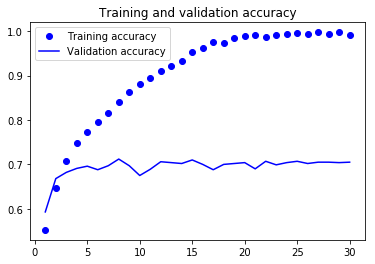

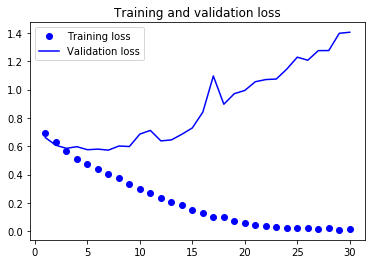

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
